# Descriptive And Predictive Analysis Of Forex Market

In [3]:
# load csv file 

import pandas as pd
import numpy as np
import warnings
#used to supress warning of deprication
warnings.filterwarnings("ignore")

df=pd.read_csv('/home/sunbeam/Desktop/Project_1/forex-analysis/curr_data.csv',parse_dates=[1])
#drop unneccessary columns 
df=df.drop('USD',axis=1)
#rename the columns
df=df.rename(columns={'AUD':'currency_code', '1995-11-16':'date', '1.35339922':'$rate'})

#show the record
df.head()

,currency_code,date,$rate
0,BBD,1995-11-16,1.989872
1,BMD,1995-11-16,1.000000
2,BSD,1995-11-16,1.000000
3,CAD,1995-11-16,1.355700
4,CHF,1995-11-16,1.141931


In [66]:
#sorted on the basis of currency code and date
df.sort_values(by=['currency_code','date'], inplace=True, ascending=True)
#extracted series currency code from dataframe
col=df['currency_code']
#find out unique currency in dataset
col_unq=col.unique()

#show the unique currency

col_unq


array(['AED', 'AFN', 'ALL', 'AMD', 'ANG', 'AOA', 'ARS', 'AUD', 'AWG',
       'AZN', 'BAM', 'BBD', 'BDT', 'BGN', 'BHD', 'BIF', 'BMD', 'BND',
       'BOB', 'BRL', 'BSD', 'BTN', 'BWP', 'BYN', 'BZD', 'CAD', 'CDF',
       'CHF', 'CLP', 'CNY', 'COP', 'CRC', 'CUC', 'CUP', 'CVE', 'CZK',
       'DJF', 'DKK', 'DOP', 'DZD', 'EGP', 'ERN', 'ETB', 'EUR', 'FJD',
       'FKP', 'GBP', 'GEL', 'GGP', 'GHS', 'GIP', 'GMD', 'GNF', 'GTQ',
       'GYD', 'HKD', 'HNL', 'HRK', 'HTG', 'HUF', 'IDR', 'ILS', 'IMP',
       'INR', 'IQD', 'IRR', 'ISK', 'JEP', 'JMD', 'JOD', 'JPY', 'KES',
       'KGS', 'KHR', 'KMF', 'KPW', 'KRW', 'KWD', 'KYD', 'KZT', 'LAK',
       'LBP', 'LKR', 'LRD', 'LSL', 'LYD', 'MAD', 'MDL', 'MGA', 'MKD',
       'MMK', 'MNT', 'MOP', 'MRU', 'MUR', 'MVR', 'MWK', 'MXN', 'MYR',
       'MZN', 'NAD', 'NGN', 'NIO', 'NOK', 'NPR', 'NZD', 'OMR', 'PAB',
       'PEN', 'PGK', 'PHP', 'PKR', 'PLN', 'PYG', 'QAR', 'RON', 'RSD',
       'RUB', 'RWF', 'SAR', 'SBD', 'SCR', 'SDG', 'SEK', 'SGD', 'SHP',
       'SLL', 'SOS',

In [67]:
#find out top 15 FOREX_EXCHANGE with respect to USD

#drop date column to get top 10 currency into the distribution
df1=df.drop('date',axis=1)
#groupby currency by currency code and take mean out of it 
#on the basis of mean of the all currency over the dataset we find the top 15 currency into datset
currency_mean=df1.groupby(['currency_code']).mean()
df_sorted=currency_mean.sort_values('$rate')
df_sorted=df_sorted
#shows top 20 foreign exchange
df_sorted.head(20)

#if we observed that most of the exchange can be done in term of element like plateium,gold,silver and after worth they exchange can done in term of currency.

#we need to add currency code description which in another csv file

,$rate
currency_code,
XPT,0.001269
XAU,0.001731
XPD,0.002344
XAG,0.108819
SPL,0.166667
KWD,0.293958
BHD,0.376517
OMR,0.384710
GBP,0.642060


In [68]:
#show last 20 forex exchange
lowest_currency=df_sorted.tail(20)
lowest_currency

,$rate
currency_code,
KRW,1.122779e+03
BIF,1.265311e+03
TZS,1.485194e+03
LBP,1.508828e+03
MNT,1.555222e+03
SOS,1.590300e+03
COP,2.398972e+03
UGX,2.407002e+03
MGA,2.447540e+03


In [69]:
#stable currency 
#variance
currency_var=df1.groupby(['currency_code']).var()
currency_var=currency_var.sort_values('$rate')
currency_var['$rate']=df1.groupby(['currency_code']).mean()

#top 10 highly stable currency 
high_stable=currency_var.head(10)

high_stable

,$rate
currency_code,
SPL,0.166667
PAB,1.000000
USD,1.000000
AWG,1.790000
XPT,0.001269
OMR,0.384710
XAU,0.001731
XPD,0.002344
AED,3.672744


In [70]:
#top 10 unstable currency
unstable_curr=currency_var.tail(10)

unstable_curr

,$rate
currency_code,
LAK,8.513734e+03
KES,1.358495e+02
SLL,4.100712e+03
GNF,5.407049e+03
UZS,2.791851e+03
IDR,1.001774e+04
VND,1.861482e+04
IRR,1.637903e+04
VES,9.742782e+04


In [71]:
#are in testing phase to split the data into multiple file on the basis of currency
#we want to analysis on the EURO currency so i need to collect time series data of Euro
counter=0
col_unq=sorted(col_unq)
#collect the date and rates of euro currency
euro_dict={}
#extracted the date and rates of top 3 exchange
top_1_plt_coin={}
top_2_gold={}
top_3_paladium={}

#top currency 3
top1_curr={}
top2_curr={}
top3_curr={}


print("loop started")


for rows in df.iterrows():
    if rows[1][0]==col_unq[counter]:
        if rows[1][0]=='EUR':
            euro_dict[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='XPT':
            top_1_plt_coin[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='XAU':
            top_2_gold[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='XPD':
            top_3_paladium[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='SPL':
            top1_curr[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='KWD':
            top2_curr[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='BHD':
            top3_curr[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        else:
            pass
        
    else:
        print("changed")
#         print(rows[1][0], rows[1][1], rows[1][2])
        counter+=1
       
        if rows[1][0]=='EUR':
            euro_dict[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='XPT':
            top_1_plt_coin[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='XAU':
            top_2_gold[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='XPD':
            top_3_paladium[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='SPL':
            top1_curr[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='KWD':
            top2_curr[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        elif rows[1][0]=='BHD':
            top3_curr[rows[1][1]]=rows[1][2]
            print(rows[1][0],rows[1][1],rows[1][2])
        else:
            pass
print('loop ended')
        
        # print(rows[1][0], col_unq[counter])
        # print(counter)
        

        


loop started
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
BHD 1998-11-30 00:00:00 0.3769
BHD 1998-12-01 00:00:00 0.37699962
BHD 1998-12-02 00:00:00 0.37690029999999997
BHD 1998-12-03 00:00:00 0.3769
BHD 1998-12-04 00:00:00 0.3769
BHD 1998-12-05 00:00:00 0.3769
BHD 1998-12-06 00:00:00 0.3769
BHD 1998-12-07 00:00:00 0.3769
BHD 1998-12-08 00:00:00 0.37707853
BHD 1998-12-09 00:00:00 0.3771
BHD 1998-12-10 00:00:00 0.3769
BHD 1998-12-11 00:00:00 0.3769
BHD 1998-12-12 00:00:00 0.3769
BHD 1998-12-13 00:00:00 0.3769
BHD 1998-12-14 00:00:00 0.3769
BHD 1998-12-15 00:00:00 0.3769
BHD 1998-12-16 00:00:00 0.377
BHD 1998-12-17 00:00:00 0.377
BHD 1998-12-18 00:00:00 0.3769
BHD 1998-12-19 00:00:00 0.3769
BHD 1998-12-20 00:00:00 0.3769
BHD 1998-12-21 00:00:00 0.3769
BHD 1998-12-22 00:00:00 0.377
BHD 1998-12-23 00:00:00 0.377
BHD 1998-12-24 00:00:00 0.377
BHD 1998-12-25 00:00:00 0.377
BHD 1998-12-26 00:00:00 0.377
BHD 1998-12-27 00:00:00 

BHD 2000-06-09 00:00:00 0.37695
BHD 2000-06-10 00:00:00 0.37695
BHD 2000-06-11 00:00:00 0.37695
BHD 2000-06-12 00:00:00 0.37695
BHD 2000-06-13 00:00:00 0.37691388
BHD 2000-06-14 00:00:00 0.37695
BHD 2000-06-15 00:00:00 0.37695
BHD 2000-06-16 00:00:00 0.37695
BHD 2000-06-17 00:00:00 0.37695
BHD 2000-06-18 00:00:00 0.37695
BHD 2000-06-19 00:00:00 0.37695
BHD 2000-06-20 00:00:00 0.37695
BHD 2000-06-21 00:00:00 0.37695
BHD 2000-06-22 00:00:00 0.37695
BHD 2000-06-23 00:00:00 0.37695
BHD 2000-06-24 00:00:00 0.37695
BHD 2000-06-25 00:00:00 0.37695
BHD 2000-06-26 00:00:00 0.37695
BHD 2000-06-27 00:00:00 0.37695
BHD 2000-06-28 00:00:00 0.37695001
BHD 2000-06-29 00:00:00 0.37695
BHD 2000-06-30 00:00:00 0.37695
BHD 2000-07-01 00:00:00 0.37695
BHD 2000-07-02 00:00:00 0.37695
BHD 2000-07-03 00:00:00 0.37699999
BHD 2000-07-04 00:00:00 0.37695
BHD 2000-07-05 00:00:00 0.37695
BHD 2000-07-06 00:00:00 0.37695
BHD 2000-07-07 00:00:00 0.37695
BHD 2000-07-08 00:00:00 0.37695
BHD 2000-07-09 00:00:00 0.37695

BHD 2001-08-19 00:00:00 0.37696
BHD 2001-08-20 00:00:00 0.37696
BHD 2001-08-21 00:00:00 0.36200005
BHD 2001-08-22 00:00:00 0.36200002
BHD 2001-08-24 00:00:00 0.37695875
BHD 2001-08-25 00:00:00 0.37696
BHD 2001-08-26 00:00:00 0.37696
BHD 2001-08-27 00:00:00 0.37695987
BHD 2001-08-28 00:00:00 0.37083241
BHD 2001-08-29 00:00:00 0.37695168
BHD 2001-08-30 00:00:00 0.36200002
BHD 2001-08-31 00:00:00 0.37689398
BHD 2001-09-01 00:00:00 0.37695
BHD 2001-09-02 00:00:00 0.37695
BHD 2001-09-03 00:00:00 0.36200000000000004
BHD 2001-09-04 00:00:00 0.37695935
BHD 2001-09-05 00:00:00 0.37691388
BHD 2001-09-07 00:00:00 0.36200000000000004
BHD 2001-09-08 00:00:00 0.37695
BHD 2001-09-09 00:00:00 0.37695
BHD 2001-09-10 00:00:00 0.37694938
BHD 2001-09-11 00:00:00 0.37696
BHD 2001-09-12 00:00:00 0.36200000000000004
BHD 2001-09-13 00:00:00 0.37701083
BHD 2001-09-15 00:00:00 0.36200000000000004
BHD 2001-09-16 00:00:00 0.36200000000000004
BHD 2001-09-18 00:00:00 0.37693816
BHD 2001-09-19 00:00:00 0.36200000000

BHD 2003-02-02 00:00:00 0.3760007
BHD 2003-02-03 00:00:00 0.377
BHD 2003-02-05 00:00:00 0.37696163
BHD 2003-02-06 00:00:00 0.377
BHD 2003-02-07 00:00:00 0.37699894
BHD 2003-02-08 00:00:00 0.37599889
BHD 2003-02-09 00:00:00 0.37599889
BHD 2003-02-10 00:00:00 0.37696079
BHD 2003-02-12 00:00:00 0.37699991
BHD 2003-02-13 00:00:00 0.37699993
BHD 2003-02-14 00:00:00 0.37700409999999995
BHD 2003-02-15 00:00:00 0.37696
BHD 2003-02-16 00:00:00 0.37696
BHD 2003-02-17 00:00:00 0.37700965
BHD 2003-02-18 00:00:00 0.37650225
BHD 2003-02-19 00:00:00 0.3765
BHD 2003-02-20 00:00:00 0.37651126
BHD 2003-02-21 00:00:00 0.37695328
BHD 2003-02-22 00:00:00 0.37600073
BHD 2003-02-23 00:00:00 0.37600073
BHD 2003-02-24 00:00:00 0.37699954
BHD 2003-02-25 00:00:00 0.37699996
BHD 2003-02-26 00:00:00 0.37700023
BHD 2003-02-27 00:00:00 0.37700512
BHD 2003-02-28 00:00:00 0.37696999999999997
BHD 2003-03-01 00:00:00 0.3759981
BHD 2003-03-02 00:00:00 0.3759981
BHD 2003-03-03 00:00:00 0.377
BHD 2003-03-04 00:00:00 0.377


BHD 2004-07-18 00:00:00 0.377
BHD 2004-07-19 00:00:00 0.377
BHD 2004-07-20 00:00:00 0.37701
BHD 2004-07-21 00:00:00 0.377
BHD 2004-07-22 00:00:00 0.377
BHD 2004-07-23 00:00:00 0.377
BHD 2004-07-24 00:00:00 0.37599970000000005
BHD 2004-07-25 00:00:00 0.37599970000000005
BHD 2004-07-26 00:00:00 0.37704499
BHD 2004-07-27 00:00:00 0.37696999
BHD 2004-07-28 00:00:00 0.37701
BHD 2004-07-29 00:00:00 0.37695
BHD 2004-07-30 00:00:00 0.37686
BHD 2004-07-31 00:00:00 0.37705
BHD 2004-08-01 00:00:00 0.37705
BHD 2004-08-03 00:00:00 0.37689004
BHD 2004-08-04 00:00:00 0.37701
BHD 2004-08-05 00:00:00 0.37699
BHD 2004-08-06 00:00:00 0.37710079999999996
BHD 2004-08-07 00:00:00 0.37705
BHD 2004-08-08 00:00:00 0.37705
BHD 2004-08-09 00:00:00 0.37701
BHD 2004-08-10 00:00:00 0.377
BHD 2004-08-11 00:00:00 0.37698639
BHD 2004-08-12 00:00:00 0.37699
BHD 2004-08-13 00:00:00 0.377
BHD 2004-08-14 00:00:00 0.377
BHD 2004-08-15 00:00:00 0.377
BHD 2004-08-17 00:00:00 0.37701
BHD 2004-08-19 00:00:00 0.37701
BHD 2004-0

BHD 2005-12-20 00:00:00 0.376945
BHD 2005-12-21 00:00:00 0.37693499999999996
BHD 2005-12-22 00:00:00 0.37693499999999996
BHD 2005-12-23 00:00:00 0.376865
BHD 2005-12-24 00:00:00 0.37695
BHD 2005-12-25 00:00:00 0.37695
BHD 2005-12-27 00:00:00 0.37693499999999996
BHD 2005-12-28 00:00:00 0.37705499
BHD 2005-12-29 00:00:00 0.376927
BHD 2005-12-30 00:00:00 0.37690500000000005
BHD 2005-12-31 00:00:00 0.376925
BHD 2006-01-01 00:00:00 0.376925
BHD 2006-01-02 00:00:00 0.376925
BHD 2006-01-03 00:00:00 0.37693499999999996
BHD 2006-01-04 00:00:00 0.37693499999999996
BHD 2006-01-05 00:00:00 0.37701
BHD 2006-01-06 00:00:00 0.37693499999999996
BHD 2006-01-07 00:00:00 0.37600122
BHD 2006-01-08 00:00:00 0.37600122
BHD 2006-01-09 00:00:00 0.376925
BHD 2006-01-10 00:00:00 0.376925
BHD 2006-01-11 00:00:00 0.37705272
BHD 2006-01-12 00:00:00 0.37693499999999996
BHD 2006-01-13 00:00:00 0.376925
BHD 2006-01-14 00:00:00 0.375555
BHD 2006-01-15 00:00:00 0.37700500000000003
BHD 2006-01-16 00:00:00 0.37699
BHD 20

BHD 2007-05-16 00:00:00 0.37697938
BHD 2007-05-17 00:00:00 0.37698002
BHD 2007-05-18 00:00:00 0.37684
BHD 2007-05-19 00:00:00 0.37599968
BHD 2007-05-20 00:00:00 0.376035
BHD 2007-05-21 00:00:00 0.377
BHD 2007-05-22 00:00:00 0.37703003
BHD 2007-05-23 00:00:00 0.37698000000000004
BHD 2007-05-24 00:00:00 0.37698000000000004
BHD 2007-05-25 00:00:00 0.377006
BHD 2007-05-26 00:00:00 0.376725
BHD 2007-05-29 00:00:00 0.37702976
BHD 2007-05-30 00:00:00 0.37670240000000005
BHD 2007-05-31 00:00:00 0.37685288
BHD 2007-06-01 00:00:00 0.377
BHD 2007-06-02 00:00:00 0.37689
BHD 2007-06-03 00:00:00 0.37689
BHD 2007-06-04 00:00:00 0.37696840000000004
BHD 2007-06-05 00:00:00 0.37700998
BHD 2007-06-06 00:00:00 0.37701002
BHD 2007-06-07 00:00:00 0.37701999999999997
BHD 2007-06-08 00:00:00 0.37701999999999997
BHD 2007-06-09 00:00:00 0.37658
BHD 2007-06-10 00:00:00 0.37658
BHD 2007-06-11 00:00:00 0.37694279999999997
BHD 2007-06-12 00:00:00 0.37697004
BHD 2007-06-13 00:00:00 0.37683
BHD 2007-06-14 00:00:00 0.

BHD 2008-10-27 00:00:00 0.377015
BHD 2008-10-30 00:00:00 0.37685719
BHD 2008-10-31 00:00:00 0.377015
BHD 2008-11-01 00:00:00 0.37704998
BHD 2008-11-02 00:00:00 0.37695
BHD 2008-11-03 00:00:00 0.37703996
BHD 2008-11-04 00:00:00 0.376692
BHD 2008-11-05 00:00:00 0.3770314
BHD 2008-11-07 00:00:00 0.37705003
BHD 2008-11-08 00:00:00 0.37709999
BHD 2008-11-09 00:00:00 0.37639
BHD 2008-11-10 00:00:00 0.37704008
BHD 2008-11-11 00:00:00 0.3768612
BHD 2008-11-13 00:00:00 0.37693000000000004
BHD 2008-11-14 00:00:00 0.376965
BHD 2008-11-15 00:00:00 0.376355
BHD 2008-11-16 00:00:00 0.37698001
BHD 2008-11-17 00:00:00 0.377015
BHD 2008-11-18 00:00:00 0.376918
BHD 2008-11-19 00:00:00 0.376676
BHD 2008-11-20 00:00:00 0.3771296
BHD 2008-11-21 00:00:00 0.37688893
BHD 2008-11-22 00:00:00 0.37699002
BHD 2008-11-23 00:00:00 0.37699002
BHD 2008-11-24 00:00:00 0.37694
BHD 2008-11-25 00:00:00 0.37706799999999996
BHD 2008-11-26 00:00:00 0.37689
BHD 2008-11-27 00:00:00 0.3769156
BHD 2008-11-28 00:00:00 0.37693000

BHD 2010-04-06 00:00:00 0.37709999
BHD 2010-04-07 00:00:00 0.37703499
BHD 2010-04-08 00:00:00 0.37660003
BHD 2010-04-09 00:00:00 0.37703499
BHD 2010-04-10 00:00:00 0.37704
BHD 2010-04-11 00:00:00 0.37704
BHD 2010-04-12 00:00:00 0.37702354
BHD 2010-04-13 00:00:00 0.37703499
BHD 2010-04-14 00:00:00 0.37699997
BHD 2010-04-15 00:00:00 0.37704998
BHD 2010-04-16 00:00:00 0.37703499
BHD 2010-04-17 00:00:00 0.37701099
BHD 2010-04-18 00:00:00 0.37700999
BHD 2010-04-19 00:00:00 0.37650082
BHD 2010-04-21 00:00:00 0.37703499
BHD 2010-04-22 00:00:00 0.37700999
BHD 2010-04-23 00:00:00 0.37705499
BHD 2010-04-24 00:00:00 0.37709999
BHD 2010-04-25 00:00:00 0.37705499
BHD 2010-04-26 00:00:00 0.37705499
BHD 2010-04-27 00:00:00 0.37705499
BHD 2010-04-28 00:00:00 0.37709749
BHD 2010-04-29 00:00:00 0.37709999
BHD 2010-04-30 00:00:00 0.37703499
BHD 2010-05-01 00:00:00 0.377
BHD 2010-05-02 00:00:00 0.37701999999999997
BHD 2010-05-03 00:00:00 0.37704998
BHD 2010-05-04 00:00:00 0.37703499
BHD 2010-05-05 00:00:0

BHD 2011-09-21 00:00:00 0.37706
BHD 2011-09-22 00:00:00 0.37706
BHD 2011-09-23 00:00:00 0.37706
BHD 2011-09-24 00:00:00 0.37702999
BHD 2011-09-25 00:00:00 0.37702999
BHD 2011-09-26 00:00:00 0.37706
BHD 2011-09-27 00:00:00 0.37700016
BHD 2011-09-28 00:00:00 0.37709965
BHD 2011-09-29 00:00:00 0.37694001
BHD 2011-09-30 00:00:00 0.37690142
BHD 2011-10-01 00:00:00 0.37694001
BHD 2011-10-02 00:00:00 0.37694001
BHD 2011-10-04 00:00:00 0.377065
BHD 2011-10-05 00:00:00 0.37706
BHD 2011-10-06 00:00:00 0.37701999999999997
BHD 2011-10-08 00:00:00 0.37693000000000004
BHD 2011-10-09 00:00:00 0.37693000000000004
BHD 2011-10-10 00:00:00 0.37709993
BHD 2011-10-11 00:00:00 0.37693201
BHD 2011-10-12 00:00:00 0.37704998
BHD 2011-10-13 00:00:00 0.37690002
BHD 2011-10-14 00:00:00 0.37706
BHD 2011-10-15 00:00:00 0.37694001
BHD 2011-10-16 00:00:00 0.37694001
BHD 2011-10-17 00:00:00 0.37705499
BHD 2011-10-18 00:00:00 0.37706
BHD 2011-10-19 00:00:00 0.37690027
BHD 2011-10-20 00:00:00 0.377025
BHD 2011-10-21 00:

BHD 2013-02-20 00:00:00 0.3770794
BHD 2013-02-21 00:00:00 0.37709915
BHD 2013-02-22 00:00:00 0.37704934
BHD 2013-02-23 00:00:00 0.377
BHD 2013-02-24 00:00:00 0.377
BHD 2013-02-25 00:00:00 0.37709934
BHD 2013-02-26 00:00:00 0.37709934
BHD 2013-02-27 00:00:00 0.37705933
BHD 2013-03-01 00:00:00 0.37705929
BHD 2013-03-03 00:00:00 0.377
BHD 2013-03-05 00:00:00 0.37694934
BHD 2013-03-06 00:00:00 0.37686058
BHD 2013-03-07 00:00:00 0.377025
BHD 2013-03-08 00:00:00 0.37690047
BHD 2013-03-09 00:00:00 0.377
BHD 2013-03-10 00:00:00 0.377
BHD 2013-03-11 00:00:00 0.37703218
BHD 2013-03-12 00:00:00 0.37690004
BHD 2013-03-13 00:00:00 0.37699934
BHD 2013-03-14 00:00:00 0.37694937
BHD 2013-03-15 00:00:00 0.37709985
BHD 2013-03-16 00:00:00 0.377
BHD 2013-03-17 00:00:00 0.377
BHD 2013-03-18 00:00:00 0.37698400000000004
BHD 2013-03-19 00:00:00 0.37702934
BHD 2013-03-20 00:00:00 0.37705120000000003
BHD 2013-03-21 00:00:00 0.37694925
BHD 2013-03-22 00:00:00 0.37709934
BHD 2013-03-23 00:00:00 0.377
BHD 2013-0

BHD 2014-07-29 00:00:00 0.37709936
BHD 2014-07-30 00:00:00 0.37709999
BHD 2014-07-31 00:00:00 0.37709934
BHD 2014-08-02 00:00:00 0.377
BHD 2014-08-03 00:00:00 0.377
BHD 2014-08-04 00:00:00 0.37709985
BHD 2014-08-05 00:00:00 0.37709935
BHD 2014-08-06 00:00:00 0.37705939
BHD 2014-08-07 00:00:00 0.37708499
BHD 2014-08-08 00:00:00 0.3770594
BHD 2014-08-09 00:00:00 0.377
BHD 2014-08-10 00:00:00 0.377
BHD 2014-08-11 00:00:00 0.37702561
BHD 2014-08-12 00:00:00 0.37709191
BHD 2014-08-13 00:00:00 0.37709998
BHD 2014-08-14 00:00:00 0.377
BHD 2014-08-15 00:00:00 0.37700001
BHD 2014-08-16 00:00:00 0.377
BHD 2014-08-17 00:00:00 0.377
BHD 2014-08-18 00:00:00 0.37704
BHD 2014-08-19 00:00:00 0.37709836
BHD 2014-08-20 00:00:00 0.37702501
BHD 2014-08-21 00:00:00 0.37705929
BHD 2014-08-22 00:00:00 0.37709934
BHD 2014-08-23 00:00:00 0.37709934
BHD 2014-08-25 00:00:00 0.37709999
BHD 2014-08-26 00:00:00 0.37709934
BHD 2014-08-27 00:00:00 0.37705934
BHD 2014-08-28 00:00:00 0.37705934
BHD 2014-08-29 00:00:00 

BHD 2016-01-07 00:00:00 0.37720399
BHD 2016-01-08 00:00:00 0.37679999
BHD 2016-01-09 00:00:00 0.37652938
BHD 2016-01-10 00:00:00 0.37652938
BHD 2016-01-11 00:00:00 0.37690002
BHD 2016-01-12 00:00:00 0.37650002
BHD 2016-01-13 00:00:00 0.37650001
BHD 2016-01-14 00:00:00 0.377
BHD 2016-01-15 00:00:00 0.37659923
BHD 2016-01-16 00:00:00 0.37653938
BHD 2016-01-17 00:00:00 0.37653938
BHD 2016-01-18 00:00:00 0.37711
BHD 2016-01-19 00:00:00 0.37695973
BHD 2016-01-20 00:00:00 0.37710007
BHD 2016-01-21 00:00:00 0.37714578
BHD 2016-01-22 00:00:00 0.37710496
BHD 2016-01-23 00:00:00 0.37648938
BHD 2016-01-24 00:00:00 0.377
BHD 2016-01-25 00:00:00 0.3771
BHD 2016-01-26 00:00:00 0.3768265
BHD 2016-01-27 00:00:00 0.37705
BHD 2016-01-28 00:00:00 0.3771
BHD 2016-01-30 00:00:00 0.37654938
BHD 2016-01-31 00:00:00 0.37654938
BHD 2016-02-01 00:00:00 0.37709706
BHD 2016-02-02 00:00:00 0.3769494
BHD 2016-02-03 00:00:00 0.377105
BHD 2016-02-04 00:00:00 0.37701798
BHD 2016-02-05 00:00:00 0.37681279999999995
BHD 

BHD 2017-06-22 00:00:00 0.37709297
BHD 2017-06-23 00:00:00 0.37709855
BHD 2017-06-24 00:00:00 0.37650624
BHD 2017-06-25 00:00:00 0.37650144
BHD 2017-06-26 00:00:00 0.37720193
BHD 2017-06-27 00:00:00 0.37728215
BHD 2017-06-28 00:00:00 0.37721559
BHD 2017-06-29 00:00:00 0.37726765
BHD 2017-06-30 00:00:00 0.37727421
BHD 2017-07-01 00:00:00 0.37738361
BHD 2017-07-03 00:00:00 0.37727704
BHD 2017-07-04 00:00:00 0.37717216
BHD 2017-07-05 00:00:00 0.37721632
BHD 2017-07-06 00:00:00 0.37721989
BHD 2017-07-07 00:00:00 0.37725692
BHD 2017-07-08 00:00:00 0.37692684
BHD 2017-07-09 00:00:00 0.37714376
BHD 2017-07-11 00:00:00 0.37700194
BHD 2017-07-12 00:00:00 0.37712678
BHD 2017-07-13 00:00:00 0.37724063
BHD 2017-07-14 00:00:00 0.37711009
BHD 2017-07-15 00:00:00 0.37695242
BHD 2017-07-16 00:00:00 0.3769355
BHD 2017-07-17 00:00:00 0.3766525
BHD 2017-07-18 00:00:00 0.37729691
BHD 2017-07-19 00:00:00 0.37717893
BHD 2017-07-20 00:00:00 0.37718123
BHD 2017-07-21 00:00:00 0.37721697
BHD 2017-07-22 00:00:0

BHD 2018-11-30 00:00:00 0.376
BHD 2018-12-01 00:00:00 0.376
BHD 2018-12-02 00:00:00 0.376
BHD 2018-12-03 00:00:00 0.376
BHD 2018-12-04 00:00:00 0.376
BHD 2018-12-05 00:00:00 0.376
BHD 2018-12-06 00:00:00 0.376
BHD 2018-12-07 00:00:00 0.376
BHD 2018-12-08 00:00:00 0.376
BHD 2018-12-09 00:00:00 0.376
BHD 2018-12-10 00:00:00 0.376
BHD 2018-12-11 00:00:00 0.376
BHD 2018-12-12 00:00:00 0.376
BHD 2018-12-13 00:00:00 0.376
BHD 2018-12-14 00:00:00 0.376
BHD 2018-12-15 00:00:00 0.376
BHD 2018-12-16 00:00:00 0.376
BHD 2018-12-17 00:00:00 0.376
BHD 2018-12-18 00:00:00 0.376
BHD 2018-12-19 00:00:00 0.376
BHD 2018-12-20 00:00:00 0.376
BHD 2018-12-21 00:00:00 0.376
BHD 2018-12-22 00:00:00 0.376
BHD 2018-12-23 00:00:00 0.376
BHD 2018-12-24 00:00:00 0.376
BHD 2018-12-25 00:00:00 0.376
BHD 2018-12-26 00:00:00 0.376
BHD 2018-12-27 00:00:00 0.376
BHD 2018-12-28 00:00:00 0.376
BHD 2018-12-29 00:00:00 0.376
BHD 2018-12-30 00:00:00 0.376
BHD 2018-12-31 00:00:00 0.376
BHD 2019-01-01 00:00:00 0.376
BHD 2019-0

BHD 2020-05-20 00:00:00 0.376
BHD 2020-05-22 00:00:00 0.376
BHD 2020-05-23 00:00:00 0.376
BHD 2020-05-24 00:00:00 0.376
BHD 2020-05-25 00:00:00 0.376
BHD 2020-05-26 00:00:00 0.376
BHD 2020-05-27 00:00:00 0.376
BHD 2020-05-28 00:00:00 0.376
BHD 2020-05-29 00:00:00 0.376
BHD 2020-05-30 00:00:00 0.376
BHD 2020-05-31 00:00:00 0.376
BHD 2020-06-02 00:00:00 0.376
BHD 2020-06-03 00:00:00 0.376
BHD 2020-06-04 00:00:00 0.376
BHD 2020-06-05 00:00:00 0.376
BHD 2020-06-06 00:00:00 0.376
BHD 2020-06-07 00:00:00 0.376
BHD 2020-06-08 00:00:00 0.376
BHD 2020-06-09 00:00:00 0.376
BHD 2020-06-10 00:00:00 0.376
BHD 2020-06-11 00:00:00 0.376
BHD 2020-06-12 00:00:00 0.376
BHD 2020-06-13 00:00:00 0.376
BHD 2020-06-14 00:00:00 0.376
BHD 2020-06-15 00:00:00 0.376
BHD 2020-06-16 00:00:00 0.376
BHD 2020-06-17 00:00:00 0.376
BHD 2020-06-18 00:00:00 0.376
BHD 2020-06-20 00:00:00 0.376
BHD 2020-06-21 00:00:00 0.376
BHD 2020-06-22 00:00:00 0.376
BHD 2020-06-23 00:00:00 0.376
BHD 2020-06-25 00:00:00 0.376
BHD 2020-0

EUR 1997-07-22 00:00:00 0.9188668
EUR 1997-07-23 00:00:00 0.92073333
EUR 1997-07-24 00:00:00 0.92379617
EUR 1997-07-25 00:00:00 0.92722282
EUR 1997-07-26 00:00:00 0.92722282
EUR 1997-07-28 00:00:00 0.93518144
EUR 1997-07-29 00:00:00 0.92929496
EUR 1997-07-30 00:00:00 0.9294751
EUR 1997-07-31 00:00:00 0.93268517
EUR 1997-08-01 00:00:00 0.94427711
EUR 1997-08-02 00:00:00 0.94427711
EUR 1997-08-05 00:00:00 0.95228902
EUR 1997-08-06 00:00:00 0.95463307
EUR 1997-08-07 00:00:00 0.94877582
EUR 1997-08-08 00:00:00 0.93904659
EUR 1997-08-09 00:00:00 0.93904659
EUR 1997-08-11 00:00:00 0.94287261
EUR 1997-08-12 00:00:00 0.94807404
EUR 1997-08-13 00:00:00 0.93326193
EUR 1997-08-14 00:00:00 0.93895604
EUR 1997-08-15 00:00:00 0.9260023999999999
EUR 1997-08-16 00:00:00 0.9260023999999999
EUR 1997-08-18 00:00:00 0.9291834000000001
EUR 1997-08-19 00:00:00 0.93458445
EUR 1997-08-20 00:00:00 0.94118441
EUR 1997-08-21 00:00:00 0.9368831
EUR 1997-08-22 00:00:00 0.91450302
EUR 1997-08-23 00:00:00 0.91450302

EUR 1999-02-03 00:00:00 0.88181067
EUR 1999-02-04 00:00:00 0.88466185
EUR 1999-02-05 00:00:00 0.8864725
EUR 1999-02-06 00:00:00 0.88786291
EUR 1999-02-07 00:00:00 0.88792777
EUR 1999-02-08 00:00:00 0.88537125
EUR 1999-02-09 00:00:00 0.88487528
EUR 1999-02-10 00:00:00 0.88257399
EUR 1999-02-11 00:00:00 0.88473884
EUR 1999-02-12 00:00:00 0.88638559
EUR 1999-02-13 00:00:00 0.88519076
EUR 1999-02-14 00:00:00 0.88519076
EUR 1999-02-15 00:00:00 0.89071333
EUR 1999-02-18 00:00:00 0.89127549
EUR 1999-02-19 00:00:00 0.90305075
EUR 1999-02-20 00:00:00 0.90563304
EUR 1999-02-21 00:00:00 0.9057970999999999
EUR 1999-02-22 00:00:00 0.90642637
EUR 1999-02-23 00:00:00 0.90952022
EUR 1999-02-24 00:00:00 0.91198857
EUR 1999-02-25 00:00:00 0.90379633
EUR 1999-02-27 00:00:00 0.9078529000000001
EUR 1999-02-28 00:00:00 0.90785293
EUR 1999-03-01 00:00:00 0.90785293
EUR 1999-03-02 00:00:00 0.90785293
EUR 1999-03-03 00:00:00 0.91875752
EUR 1999-03-04 00:00:00 0.92392876
EUR 1999-03-05 00:00:00 0.92233808
EUR 1

EUR 2000-07-20 00:00:00 1.0726
EUR 2000-07-22 00:00:00 1.0764
EUR 2000-07-23 00:00:00 1.07
EUR 2000-07-24 00:00:00 1.07
EUR 2000-07-25 00:00:00 1.0736
EUR 2000-07-26 00:00:00 1.0647
EUR 2000-07-27 00:00:00 1.0622
EUR 2000-07-29 00:00:00 1.0722
EUR 2000-07-30 00:00:00 1.0722
EUR 2000-07-31 00:00:00 1.0814
EUR 2000-08-01 00:00:00 1.0791
EUR 2000-08-02 00:00:00 1.0836
EUR 2000-08-03 00:00:00 1.0944
EUR 2000-08-04 00:00:00 1.0944
EUR 2000-08-05 00:00:00 1.1058
EUR 2000-08-06 00:00:00 1.1021143999999998
EUR 2000-08-07 00:00:00 1.1019
EUR 2000-08-08 00:00:00 1.1019
EUR 2000-08-09 00:00:00 1.109
EUR 2000-08-10 00:00:00 1.11219604
EUR 2000-08-11 00:00:00 1.1018
EUR 2000-08-12 00:00:00 1.1018
EUR 2000-08-13 00:00:00 1.1018
EUR 2000-08-14 00:00:00 1.1018
EUR 2000-08-15 00:00:00 1.1018
EUR 2000-08-16 00:00:00 1.1018
EUR 2000-08-17 00:00:00 1.1018
EUR 2000-08-18 00:00:00 1.1018
EUR 2000-08-19 00:00:00 1.1018
EUR 2000-08-20 00:00:00 1.1018
EUR 2000-08-21 00:00:00 1.1018
EUR 2000-08-22 00:00:00 1.10

EUR 2002-01-05 00:00:00 1.11781802
EUR 2002-01-06 00:00:00 1.11706881
EUR 2002-01-07 00:00:00 1.12028385
EUR 2002-01-08 00:00:00 1.12059503
EUR 2002-01-09 00:00:00 1.12595233
EUR 2002-01-10 00:00:00 1.12027067
EUR 2002-01-11 00:00:00 1.12310969
EUR 2002-01-12 00:00:00 1.12132662
EUR 2002-01-13 00:00:00 1.12120189
EUR 2002-01-14 00:00:00 1.11941798
EUR 2002-01-15 00:00:00 1.12195217
EUR 2002-01-16 00:00:00 1.13206404
EUR 2002-01-17 00:00:00 1.13495603
EUR 2002-01-18 00:00:00 1.13158398
EUR 2002-01-19 00:00:00 1.13122173
EUR 2002-01-20 00:00:00 1.13109449
EUR 2002-01-21 00:00:00 1.13217861
EUR 2002-01-22 00:00:00 1.13171699
EUR 2002-01-23 00:00:00 1.13121476
EUR 2002-01-24 00:00:00 1.13921237
EUR 2002-01-25 00:00:00 1.15543196
EUR 2002-01-26 00:00:00 1.15848001
EUR 2002-01-27 00:00:00 1.15874831
EUR 2002-01-28 00:00:00 1.16332435
EUR 2002-01-29 00:00:00 1.15751604
EUR 2002-01-30 00:00:00 1.15773007
EUR 2002-01-31 00:00:00 1.161129
EUR 2002-02-01 00:00:00 1.16116855
EUR 2002-02-02 00:00:0

EUR 2003-12-13 00:00:00 0.81606333
EUR 2003-12-14 00:00:00 0.81473032
EUR 2003-12-15 00:00:00 0.81378985
EUR 2003-12-16 00:00:00 0.81127413
EUR 2003-12-17 00:00:00 0.8074073
EUR 2003-12-18 00:00:00 0.80799087
EUR 2003-12-19 00:00:00 0.80771688
EUR 2003-12-20 00:00:00 0.80528236
EUR 2003-12-21 00:00:00 0.80781969
EUR 2003-12-22 00:00:00 0.80563333
EUR 2003-12-23 00:00:00 0.80614635
EUR 2003-12-24 00:00:00 0.8022712
EUR 2003-12-25 00:00:00 0.80328043
EUR 2003-12-26 00:00:00 0.80392384
EUR 2003-12-27 00:00:00 0.80515298
EUR 2003-12-28 00:00:00 0.80515298
EUR 2003-12-29 00:00:00 0.80100033
EUR 2003-12-30 00:00:00 0.79862167
EUR 2003-12-31 00:00:00 0.7935924
EUR 2004-01-01 00:00:00 0.79390301
EUR 2004-01-02 00:00:00 0.79425476
EUR 2004-01-03 00:00:00 0.79377679
EUR 2004-01-04 00:00:00 0.79377679
EUR 2004-01-05 00:00:00 0.7890938
EUR 2004-01-07 00:00:00 0.78914492
EUR 2004-01-08 00:00:00 0.78320677
EUR 2004-01-09 00:00:00 0.77802236
EUR 2004-01-10 00:00:00 0.78511481
EUR 2004-01-11 00:00:00 

EUR 2005-08-04 00:00:00 0.80773256
EUR 2005-08-05 00:00:00 0.81131973
EUR 2005-08-06 00:00:00 0.81126001
EUR 2005-08-07 00:00:00 0.811295
EUR 2005-08-08 00:00:00 0.80919099
EUR 2005-08-09 00:00:00 0.81009533
EUR 2005-08-10 00:00:00 0.80994509
EUR 2005-08-11 00:00:00 0.80447379
EUR 2005-08-12 00:00:00 0.80490933
EUR 2005-08-13 00:00:00 0.80375999
EUR 2005-08-14 00:00:00 0.80489501
EUR 2005-08-15 00:00:00 0.80913682
EUR 2005-08-16 00:00:00 0.81050806
EUR 2005-08-17 00:00:00 0.8136836
EUR 2005-08-18 00:00:00 0.82141955
EUR 2005-08-19 00:00:00 0.82325985
EUR 2005-08-20 00:00:00 0.82321501
EUR 2005-08-21 00:00:00 0.82287239
EUR 2005-08-22 00:00:00 0.81736267
EUR 2005-08-23 00:00:00 0.81863283
EUR 2005-08-24 00:00:00 0.81686809
EUR 2005-08-25 00:00:00 0.81268046
EUR 2005-08-26 00:00:00 0.8116763000000001
EUR 2005-08-28 00:00:00 0.81356999
EUR 2005-08-29 00:00:00 0.81702947
EUR 2005-08-30 00:00:00 0.81953285
EUR 2005-08-31 00:00:00 0.81095039
EUR 2005-09-01 00:00:00 0.80207802
EUR 2005-09-02 

EUR 2007-02-10 00:00:00 0.76867
EUR 2007-02-11 00:00:00 0.76752
EUR 2007-02-12 00:00:00 0.77169231
EUR 2007-02-13 00:00:00 0.76792825
EUR 2007-02-14 00:00:00 0.76202115
EUR 2007-02-15 00:00:00 0.76116164
EUR 2007-02-16 00:00:00 0.76138246
EUR 2007-02-17 00:00:00 0.7612949999999999
EUR 2007-02-18 00:00:00 0.7612949999999999
EUR 2007-02-19 00:00:00 0.76073951
EUR 2007-02-20 00:00:00 0.76149536
EUR 2007-02-21 00:00:00 0.76199799
EUR 2007-02-22 00:00:00 0.7616369000000001
EUR 2007-02-23 00:00:00 0.75969205
EUR 2007-02-24 00:00:00 0.75959
EUR 2007-02-25 00:00:00 0.759505
EUR 2007-02-26 00:00:00 0.7599963000000001
EUR 2007-02-27 00:00:00 0.75498212
EUR 2007-02-28 00:00:00 0.75599683
EUR 2007-03-01 00:00:00 0.75916673
EUR 2007-03-02 00:00:00 0.75871045
EUR 2007-03-03 00:00:00 0.75795
EUR 2007-03-04 00:00:00 0.758495
EUR 2007-03-05 00:00:00 0.76375305
EUR 2007-03-06 00:00:00 0.76300718
EUR 2007-03-07 00:00:00 0.76069282
EUR 2007-03-08 00:00:00 0.7617093
EUR 2007-03-09 00:00:00 0.76237263
EUR 2

EUR 2008-03-24 00:00:00 0.64966401
EUR 2008-03-25 00:00:00 0.64150131
EUR 2008-03-26 00:00:00 0.63448562
EUR 2008-03-27 00:00:00 0.63293574
EUR 2008-03-28 00:00:00 0.63444891
EUR 2008-03-29 00:00:00 0.6330100000000001
EUR 2008-03-30 00:00:00 0.6330100000000001
EUR 2008-03-31 00:00:00 0.6327586
EUR 2008-04-01 00:00:00 0.6405299
EUR 2008-04-02 00:00:00 0.6402939000000001
EUR 2008-04-03 00:00:00 0.63831317
EUR 2008-04-04 00:00:00 0.63548004
EUR 2008-04-05 00:00:00 0.635505
EUR 2008-04-06 00:00:00 0.63585
EUR 2008-04-07 00:00:00 0.63639547
EUR 2008-04-08 00:00:00 0.63687555
EUR 2008-04-09 00:00:00 0.63278591
EUR 2008-04-11 00:00:00 0.63279127
EUR 2008-04-13 00:00:00 0.63207
EUR 2008-04-14 00:00:00 0.63107407
EUR 2008-04-15 00:00:00 0.63297528
EUR 2008-04-16 00:00:00 0.62609707
EUR 2008-04-18 00:00:00 0.63523282
EUR 2008-04-19 00:00:00 0.63561
EUR 2008-04-20 00:00:00 0.63561
EUR 2008-04-21 00:00:00 0.62947543
EUR 2008-04-22 00:00:00 0.62470023
EUR 2008-04-23 00:00:00 0.62921269
EUR 2008-04-

EUR 2009-09-05 00:00:00 0.70116774
EUR 2009-09-06 00:00:00 0.6987876000000001
EUR 2009-09-07 00:00:00 0.69757562
EUR 2009-09-08 00:00:00 0.690051
EUR 2009-09-09 00:00:00 0.68627895
EUR 2009-09-10 00:00:00 0.68649041
EUR 2009-09-12 00:00:00 0.68521068
EUR 2009-09-13 00:00:00 0.68605
EUR 2009-09-14 00:00:00 0.68428154
EUR 2009-09-15 00:00:00 0.68416758
EUR 2009-09-16 00:00:00 0.68037332
EUR 2009-09-17 00:00:00 0.67876269
EUR 2009-09-18 00:00:00 0.67996125
EUR 2009-09-19 00:00:00 0.67975
EUR 2009-09-20 00:00:00 0.67975
EUR 2009-09-21 00:00:00 0.6807699
EUR 2009-09-22 00:00:00 0.67595042
EUR 2009-09-23 00:00:00 0.67795782
EUR 2009-09-24 00:00:00 0.68045836
EUR 2009-09-25 00:00:00 0.68080229
EUR 2009-09-26 00:00:00 0.68165941
EUR 2009-09-27 00:00:00 0.68165941
EUR 2009-09-28 00:00:00 0.68270102
EUR 2009-09-29 00:00:00 0.68722344
EUR 2009-09-30 00:00:00 0.6834539000000001
EUR 2009-10-01 00:00:00 0.68841454
EUR 2009-10-02 00:00:00 0.68550683
EUR 2009-10-03 00:00:00 0.68615
EUR 2009-10-04 00:0

EUR 2011-02-15 00:00:00 0.74103347
EUR 2011-02-16 00:00:00 0.73827647
EUR 2011-02-17 00:00:00 0.73439711
EUR 2011-02-18 00:00:00 0.73188035
EUR 2011-02-19 00:00:00 0.73030015
EUR 2011-02-20 00:00:00 0.73051358
EUR 2011-02-21 00:00:00 0.73136004
EUR 2011-02-22 00:00:00 0.7319604999999999
EUR 2011-02-23 00:00:00 0.72668114
EUR 2011-02-24 00:00:00 0.7249746
EUR 2011-02-25 00:00:00 0.72697157
EUR 2011-02-26 00:00:00 0.72748433
EUR 2011-02-27 00:00:00 0.72748433
EUR 2011-02-28 00:00:00 0.72498863
EUR 2011-03-01 00:00:00 0.72394816
EUR 2011-03-02 00:00:00 0.72100545
EUR 2011-03-03 00:00:00 0.71763811
EUR 2011-03-04 00:00:00 0.71543196
EUR 2011-03-05 00:00:00 0.71535876
EUR 2011-03-06 00:00:00 0.71535876
EUR 2011-03-07 00:00:00 0.71547628
EUR 2011-03-08 00:00:00 0.71887434
EUR 2011-03-09 00:00:00 0.71898389
EUR 2011-03-10 00:00:00 0.72355818
EUR 2011-03-11 00:00:00 0.72161126
EUR 2011-03-12 00:00:00 0.71947624
EUR 2011-03-13 00:00:00 0.71947624
EUR 2011-03-15 00:00:00 0.71614614
EUR 2011-03-1

EUR 2012-07-22 00:00:00 0.8226
EUR 2012-07-24 00:00:00 0.82912263
EUR 2012-07-25 00:00:00 0.82431085
EUR 2012-07-26 00:00:00 0.8141975
EUR 2012-07-27 00:00:00 0.80871742
EUR 2012-07-28 00:00:00 0.8116
EUR 2012-07-29 00:00:00 0.81175
EUR 2012-07-30 00:00:00 0.81635458
EUR 2012-07-31 00:00:00 0.81200094
EUR 2012-08-01 00:00:00 0.81299416
EUR 2012-08-02 00:00:00 0.82324163
EUR 2012-08-03 00:00:00 0.80703857
EUR 2012-08-04 00:00:00 0.8073
EUR 2012-08-05 00:00:00 0.8072
EUR 2012-08-06 00:00:00 0.80527976
EUR 2012-08-07 00:00:00 0.80507003
EUR 2012-08-08 00:00:00 0.80886258
EUR 2012-08-09 00:00:00 0.81448574
EUR 2012-08-10 00:00:00 0.81305582
EUR 2012-08-11 00:00:00 0.81365
EUR 2012-08-12 00:00:00 0.8136
EUR 2012-08-13 00:00:00 0.81035634
EUR 2012-08-14 00:00:00 0.8111876
EUR 2012-08-15 00:00:00 0.8138816999999999
EUR 2012-08-16 00:00:00 0.80927284
EUR 2012-08-17 00:00:00 0.81203895
EUR 2012-08-18 00:00:00 0.81075
EUR 2012-08-19 00:00:00 0.81065
EUR 2012-08-20 00:00:00 0.81013202
EUR 2012-08

EUR 2013-12-27 00:00:00 0.72633263
EUR 2013-12-28 00:00:00 0.72754
EUR 2013-12-29 00:00:00 0.72752856
EUR 2013-12-30 00:00:00 0.72378274
EUR 2013-12-31 00:00:00 0.72589267
EUR 2014-01-01 00:00:00 0.72764846
EUR 2014-01-02 00:00:00 0.73135212
EUR 2014-01-03 00:00:00 0.73503311
EUR 2014-01-04 00:00:00 0.735885
EUR 2014-01-05 00:00:00 0.73592903
EUR 2014-01-06 00:00:00 0.73255618
EUR 2014-01-07 00:00:00 0.73435526
EUR 2014-01-08 00:00:00 0.7360224
EUR 2014-01-09 00:00:00 0.73582724
EUR 2014-01-10 00:00:00 0.73187204
EUR 2014-01-11 00:00:00 0.731615
EUR 2014-01-12 00:00:00 0.731615
EUR 2014-01-13 00:00:00 0.73285822
EUR 2014-01-14 00:00:00 0.73104073
EUR 2014-01-15 00:00:00 0.73515349
EUR 2014-01-17 00:00:00 0.73778258
EUR 2014-01-18 00:00:00 0.738535
EUR 2014-01-19 00:00:00 0.73855961
EUR 2014-01-20 00:00:00 0.73731751
EUR 2014-01-21 00:00:00 0.73742831
EUR 2014-01-22 00:00:00 0.73808571
EUR 2014-01-23 00:00:00 0.73101316
EUR 2014-01-24 00:00:00 0.73111629
EUR 2014-01-25 00:00:00 0.731135

EUR 2015-06-05 00:00:00 0.90035845
EUR 2015-06-06 00:00:00 0.8996850000000001
EUR 2015-06-07 00:00:00 0.8996850000000001
EUR 2015-06-08 00:00:00 0.89043638
EUR 2015-06-11 00:00:00 0.88990586
EUR 2015-06-12 00:00:00 0.88656439
EUR 2015-06-13 00:00:00 0.887785
EUR 2015-06-14 00:00:00 0.88775964
EUR 2015-06-15 00:00:00 0.88835713
EUR 2015-06-17 00:00:00 0.88938978
EUR 2015-06-18 00:00:00 0.87715701
EUR 2015-06-20 00:00:00 0.8805149999999999
EUR 2015-06-21 00:00:00 0.8805521000000001
EUR 2015-06-22 00:00:00 0.87870648
EUR 2015-06-23 00:00:00 0.89392149
EUR 2015-06-24 00:00:00 0.89455616
EUR 2015-06-25 00:00:00 0.89316611
EUR 2015-06-26 00:00:00 0.8968818999999999
EUR 2015-06-27 00:00:00 0.89566
EUR 2015-06-28 00:00:00 0.89564654
EUR 2015-06-29 00:00:00 0.89410916
EUR 2015-06-30 00:00:00 0.89664476
EUR 2015-07-01 00:00:00 0.90212505
EUR 2015-07-02 00:00:00 0.90159419
EUR 2015-07-03 00:00:00 0.90121222
EUR 2015-07-04 00:00:00 0.900075
EUR 2015-07-06 00:00:00 0.9029883
EUR 2015-07-07 00:00:00

EUR 2016-05-30 00:00:00 0.89784623
EUR 2016-05-31 00:00:00 0.89817423
EUR 2016-06-01 00:00:00 0.89564156
EUR 2016-06-02 00:00:00 0.89637716
EUR 2016-06-03 00:00:00 0.88282929
EUR 2016-06-04 00:00:00 0.879815
EUR 2016-06-05 00:00:00 0.879815
EUR 2016-06-06 00:00:00 0.88061936
EUR 2016-06-07 00:00:00 0.88087643
EUR 2016-06-08 00:00:00 0.87703172
EUR 2016-06-09 00:00:00 0.8827368
EUR 2016-06-10 00:00:00 0.88655525
EUR 2016-06-11 00:00:00 0.8887299999999999
EUR 2016-06-12 00:00:00 0.88873014
EUR 2016-06-13 00:00:00 0.88643927
EUR 2016-06-14 00:00:00 0.8919905
EUR 2016-06-15 00:00:00 0.88966143
EUR 2016-06-16 00:00:00 0.89612885
EUR 2016-06-17 00:00:00 0.88868827
EUR 2016-06-18 00:00:00 0.8867799999999999
EUR 2016-06-19 00:00:00 0.8867265999999999
EUR 2016-06-20 00:00:00 0.88360975
EUR 2016-06-21 00:00:00 0.88813384
EUR 2016-06-22 00:00:00 0.88608947
EUR 2016-06-23 00:00:00 0.87953722
EUR 2016-06-24 00:00:00 0.89895372
EUR 2016-06-25 00:00:00 0.899445
EUR 2016-06-26 00:00:00 0.89945105
EUR 

EUR 2017-06-18 00:00:00 0.89367453
EUR 2017-06-19 00:00:00 0.8960744
EUR 2017-06-20 00:00:00 0.89887433
EUR 2017-06-21 00:00:00 0.89747982
EUR 2017-06-22 00:00:00 0.89686272
EUR 2017-06-23 00:00:00 0.89306723
EUR 2017-06-24 00:00:00 0.89372732
EUR 2017-06-25 00:00:00 0.89353901
EUR 2017-06-26 00:00:00 0.89313903
EUR 2017-06-27 00:00:00 0.88308769
EUR 2017-06-28 00:00:00 0.88000051
EUR 2017-06-29 00:00:00 0.87540539
EUR 2017-06-30 00:00:00 0.87627774
EUR 2017-07-01 00:00:00 0.87514959
EUR 2017-07-03 00:00:00 0.87986956
EUR 2017-07-04 00:00:00 0.88130674
EUR 2017-07-05 00:00:00 0.88224126
EUR 2017-07-06 00:00:00 0.87679427
EUR 2017-07-07 00:00:00 0.87753249
EUR 2017-07-08 00:00:00 0.87712457
EUR 2017-07-09 00:00:00 0.87715179
EUR 2017-07-11 00:00:00 0.87499738
EUR 2017-07-12 00:00:00 0.87621948
EUR 2017-07-13 00:00:00 0.8783085999999999
EUR 2017-07-14 00:00:00 0.87322328
EUR 2017-07-15 00:00:00 0.87217038
EUR 2017-07-16 00:00:00 0.87219202
EUR 2017-07-17 00:00:00 0.87193729
EUR 2017-07-1

EUR 2018-10-14 00:00:00 0.86470119
EUR 2018-10-15 00:00:00 0.8625658000000002
EUR 2018-10-16 00:00:00 0.86262146
EUR 2018-10-17 00:00:00 0.86658903
EUR 2018-10-18 00:00:00 0.8701268
EUR 2018-10-19 00:00:00 0.86873061
EUR 2018-10-20 00:00:00 0.8673299999999999
EUR 2018-10-21 00:00:00 0.86761794
EUR 2018-10-22 00:00:00 0.87224294
EUR 2018-10-23 00:00:00 0.87089997
EUR 2018-10-24 00:00:00 0.87764148
EUR 2018-10-25 00:00:00 0.87922179
EUR 2018-10-26 00:00:00 0.87808968
EUR 2018-10-28 00:00:00 0.8765651
EUR 2018-10-29 00:00:00 0.87805827
EUR 2018-10-30 00:00:00 0.88002129
EUR 2018-10-31 00:00:00 0.88233893
EUR 2018-11-01 00:00:00 0.87745819
EUR 2018-11-02 00:00:00 0.87861819
EUR 2018-11-03 00:00:00 0.87816027
EUR 2018-11-04 00:00:00 0.87817664
EUR 2018-11-05 00:00:00 0.87745559
EUR 2018-11-06 00:00:00 0.87640566
EUR 2018-11-07 00:00:00 0.87265619
EUR 2018-11-08 00:00:00 0.87591576
EUR 2018-11-09 00:00:00 0.88261549
EUR 2018-11-10 00:00:00 0.88194465
EUR 2018-11-11 00:00:00 0.88198213
EUR 20

EUR 2020-03-30 00:00:00 0.90760667
EUR 2020-03-31 00:00:00 0.90714572
EUR 2020-04-01 00:00:00 0.91448263
EUR 2020-04-02 00:00:00 0.92041485
EUR 2020-04-03 00:00:00 0.92639447
EUR 2020-04-04 00:00:00 0.92509428
EUR 2020-04-05 00:00:00 0.92564476
EUR 2020-04-06 00:00:00 0.92625941
EUR 2020-04-10 00:00:00 0.91337646
EUR 2020-04-11 00:00:00 0.91435754
EUR 2020-04-12 00:00:00 0.91451973
EUR 2020-04-13 00:00:00 0.91689971
EUR 2020-04-14 00:00:00 0.91168411
EUR 2020-04-18 00:00:00 0.91956636
EUR 2020-04-19 00:00:00 0.91954305
EUR 2020-04-20 00:00:00 0.91960522
EUR 2020-04-21 00:00:00 0.92106938
EUR 2020-04-22 00:00:00 0.92361036
EUR 2020-04-23 00:00:00 0.9247219999999999
EUR 2020-04-24 00:00:00 0.92597209
EUR 2020-04-25 00:00:00 0.92377721
EUR 2020-04-26 00:00:00 0.92310787
EUR 2020-04-27 00:00:00 0.92381066
EUR 2020-04-28 00:00:00 0.92178848
EUR 2020-04-29 00:00:00 0.92054652
EUR 2020-04-30 00:00:00 0.91362061
EUR 2020-05-01 00:00:00 0.90171926
EUR 2020-05-02 00:00:00 0.90152937
EUR 2020-05-

KWD 2000-04-24 00:00:00 0.30615
KWD 2000-04-25 00:00:00 0.30697982
KWD 2000-04-26 00:00:00 0.30707989
KWD 2000-04-27 00:00:00 0.3074
KWD 2000-04-28 00:00:00 0.30785
KWD 2000-04-29 00:00:00 0.30735
KWD 2000-04-30 00:00:00 0.30735
KWD 2000-05-01 00:00:00 0.30776908
KWD 2000-05-02 00:00:00 0.30777001
KWD 2000-05-03 00:00:00 0.3081016
KWD 2000-05-04 00:00:00 0.30789552
KWD 2000-05-05 00:00:00 0.30777998
KWD 2000-05-06 00:00:00 0.30765
KWD 2000-05-07 00:00:00 0.30765
KWD 2000-05-08 00:00:00 0.30775021
KWD 2000-05-09 00:00:00 0.30762002
KWD 2000-05-11 00:00:00 0.30781
KWD 2000-05-12 00:00:00 0.30774985
KWD 2000-05-13 00:00:00 0.30775
KWD 2000-05-14 00:00:00 0.30775
KWD 2000-05-15 00:00:00 0.3073424
KWD 2000-05-16 00:00:00 0.30775
KWD 2000-05-17 00:00:00 0.30795597
KWD 2000-05-18 00:00:00 0.3079
KWD 2000-05-19 00:00:00 0.30805
KWD 2000-05-20 00:00:00 0.30785
KWD 2000-05-21 00:00:00 0.30785
KWD 2000-05-22 00:00:00 0.30761993
KWD 2000-05-23 00:00:00 0.30775579
KWD 2000-05-24 00:00:00 0.30773368

KWD 2001-08-21 00:00:00 0.30363001
KWD 2001-08-22 00:00:00 0.30343987
KWD 2001-08-24 00:00:00 0.30390441
KWD 2001-08-25 00:00:00 0.3051
KWD 2001-08-26 00:00:00 0.3051
KWD 2001-08-27 00:00:00 0.3051
KWD 2001-08-28 00:00:00 0.30437572
KWD 2001-08-29 00:00:00 0.30477686
KWD 2001-08-30 00:00:00 0.3033677
KWD 2001-08-31 00:00:00 0.3050994
KWD 2001-09-01 00:00:00 0.3049
KWD 2001-09-02 00:00:00 0.3049
KWD 2001-09-03 00:00:00 0.30363
KWD 2001-09-04 00:00:00 0.30549816
KWD 2001-09-05 00:00:00 0.30559671
KWD 2001-09-07 00:00:00 0.30369
KWD 2001-09-08 00:00:00 0.305
KWD 2001-09-09 00:00:00 0.305
KWD 2001-09-10 00:00:00 0.30529994
KWD 2001-09-11 00:00:00 0.29861503
KWD 2001-09-12 00:00:00 0.30396999999999996
KWD 2001-09-13 00:00:00 0.30535
KWD 2001-09-15 00:00:00 0.30319
KWD 2001-09-16 00:00:00 0.30319
KWD 2001-09-18 00:00:00 0.30469889
KWD 2001-09-19 00:00:00 0.302805
KWD 2001-09-20 00:00:00 0.30469969
KWD 2001-09-21 00:00:00 0.30356602
KWD 2001-09-22 00:00:00 0.3046
KWD 2001-09-23 00:00:00 0.304

KWD 2003-02-05 00:00:00 0.29883472
KWD 2003-02-06 00:00:00 0.29904926
KWD 2003-02-07 00:00:00 0.29904703
KWD 2003-02-08 00:00:00 0.29973519
KWD 2003-02-09 00:00:00 0.29973519
KWD 2003-02-10 00:00:00 0.29926613
KWD 2003-02-12 00:00:00 0.29924395
KWD 2003-02-13 00:00:00 0.29916034
KWD 2003-02-14 00:00:00 0.2992465
KWD 2003-02-15 00:00:00 0.2991
KWD 2003-02-16 00:00:00 0.2991
KWD 2003-02-17 00:00:00 0.29981112
KWD 2003-02-18 00:00:00 0.29996059
KWD 2003-02-19 00:00:00 0.29977291
KWD 2003-02-20 00:00:00 0.29958861
KWD 2003-02-21 00:00:00 0.29981808
KWD 2003-02-22 00:00:00 0.29905827
KWD 2003-02-23 00:00:00 0.29905827
KWD 2003-02-24 00:00:00 0.29969979
KWD 2003-02-25 00:00:00 0.29979992
KWD 2003-02-26 00:00:00 0.29955338
KWD 2003-02-27 00:00:00 0.29961024
KWD 2003-02-28 00:00:00 0.29965
KWD 2003-03-01 00:00:00 0.29920998
KWD 2003-03-02 00:00:00 0.29920998
KWD 2003-03-03 00:00:00 0.2997
KWD 2003-03-04 00:00:00 0.29925
KWD 2003-03-05 00:00:00 0.29902014
KWD 2003-03-06 00:00:00 0.29892294
KWD 

KWD 2004-05-26 00:00:00 0.29454005
KWD 2004-05-27 00:00:00 0.29479941
KWD 2004-05-29 00:00:00 0.29348320000000006
KWD 2004-05-30 00:00:00 0.29348320000000006
KWD 2004-05-31 00:00:00 0.29473
KWD 2004-06-01 00:00:00 0.29475001
KWD 2004-06-02 00:00:00 0.29475976
KWD 2004-06-03 00:00:00 0.294712
KWD 2004-06-04 00:00:00 0.29476937
KWD 2004-06-05 00:00:00 0.29469073
KWD 2004-06-06 00:00:00 0.29469073
KWD 2004-06-07 00:00:00 0.29474966
KWD 2004-06-08 00:00:00 0.29473
KWD 2004-06-09 00:00:00 0.29474983
KWD 2004-06-10 00:00:00 0.29474329
KWD 2004-06-11 00:00:00 0.29475
KWD 2004-06-12 00:00:00 0.29473
KWD 2004-06-13 00:00:00 0.29473
KWD 2004-06-14 00:00:00 0.29470006
KWD 2004-06-15 00:00:00 0.2947254
KWD 2004-06-16 00:00:00 0.29474512
KWD 2004-06-17 00:00:00 0.29473874
KWD 2004-06-18 00:00:00 0.29470111
KWD 2004-06-19 00:00:00 0.29504722
KWD 2004-06-20 00:00:00 0.29504722
KWD 2004-06-21 00:00:00 0.2947491
KWD 2004-06-22 00:00:00 0.29474488
KWD 2004-06-23 00:00:00 0.29475
KWD 2004-06-24 00:00:00 

KWD 2005-07-22 00:00:00 0.29200008
KWD 2005-07-23 00:00:00 0.29206
KWD 2005-07-24 00:00:00 0.29206
KWD 2005-07-25 00:00:00 0.29205839
KWD 2005-07-26 00:00:00 0.29205999
KWD 2005-07-28 00:00:00 0.2920103
KWD 2005-07-29 00:00:00 0.29201047
KWD 2005-07-30 00:00:00 0.29206
KWD 2005-07-31 00:00:00 0.29206
KWD 2005-08-01 00:00:00 0.29200041
KWD 2005-08-02 00:00:00 0.29201
KWD 2005-08-03 00:00:00 0.29200679
KWD 2005-08-04 00:00:00 0.2920103
KWD 2005-08-05 00:00:00 0.29201193
KWD 2005-08-06 00:00:00 0.29200001
KWD 2005-08-07 00:00:00 0.292
KWD 2005-08-08 00:00:00 0.29206015
KWD 2005-08-09 00:00:00 0.2920023
KWD 2005-08-10 00:00:00 0.29206
KWD 2005-08-11 00:00:00 0.29205512
KWD 2005-08-12 00:00:00 0.29202645
KWD 2005-08-13 00:00:00 0.29200001
KWD 2005-08-14 00:00:00 0.29200999
KWD 2005-08-15 00:00:00 0.29200006
KWD 2005-08-16 00:00:00 0.29201869
KWD 2005-08-17 00:00:00 0.292074
KWD 2005-08-18 00:00:00 0.2920022
KWD 2005-08-19 00:00:00 0.29200143
KWD 2005-08-20 00:00:00 0.29252868
KWD 2005-08-21

KWD 2006-12-01 00:00:00 0.28910064
KWD 2006-12-02 00:00:00 0.2891
KWD 2006-12-03 00:00:00 0.2891
KWD 2006-12-04 00:00:00 0.28914167
KWD 2006-12-05 00:00:00 0.28881559
KWD 2006-12-06 00:00:00 0.2890876
KWD 2006-12-07 00:00:00 0.28907498
KWD 2006-12-08 00:00:00 0.289
KWD 2006-12-09 00:00:00 0.28906
KWD 2006-12-10 00:00:00 0.28906
KWD 2006-12-11 00:00:00 0.28905008
KWD 2006-12-12 00:00:00 0.28905962
KWD 2006-12-13 00:00:00 0.28912
KWD 2006-12-14 00:00:00 0.28910168
KWD 2006-12-15 00:00:00 0.28910007
KWD 2006-12-16 00:00:00 0.2891
KWD 2006-12-17 00:00:00 0.2891
KWD 2006-12-18 00:00:00 0.28910194
KWD 2006-12-19 00:00:00 0.28914
KWD 2006-12-20 00:00:00 0.28914199
KWD 2006-12-21 00:00:00 0.28914192
KWD 2006-12-22 00:00:00 0.2891492
KWD 2006-12-23 00:00:00 0.28914
KWD 2006-12-24 00:00:00 0.28914
KWD 2006-12-25 00:00:00 0.2891
KWD 2006-12-26 00:00:00 0.2891
KWD 2006-12-27 00:00:00 0.28914968
KWD 2006-12-28 00:00:00 0.289142
KWD 2006-12-29 00:00:00 0.28910959999999997
KWD 2006-12-30 00:00:00 0.2

KWD 2008-04-23 00:00:00 0.26556912
KWD 2008-04-24 00:00:00 0.26577047
KWD 2008-04-25 00:00:00 0.26585406
KWD 2008-04-26 00:00:00 0.26582
KWD 2008-04-27 00:00:00 0.26582
KWD 2008-04-28 00:00:00 0.26620113
KWD 2008-04-29 00:00:00 0.26611001
KWD 2008-04-30 00:00:00 0.26649319
KWD 2008-05-01 00:00:00 0.26634
KWD 2008-05-02 00:00:00 0.26673999
KWD 2008-05-03 00:00:00 0.26695001
KWD 2008-05-06 00:00:00 0.26701994
KWD 2008-05-07 00:00:00 0.26756001
KWD 2008-05-08 00:00:00 0.26746784
KWD 2008-05-09 00:00:00 0.26708216
KWD 2008-05-10 00:00:00 0.26705
KWD 2008-05-11 00:00:00 0.26705
KWD 2008-05-12 00:00:00 0.26703000000000005
KWD 2008-05-13 00:00:00 0.26673388
KWD 2008-05-14 00:00:00 0.26651189
KWD 2008-05-15 00:00:00 0.26651836
KWD 2008-05-16 00:00:00 0.2662
KWD 2008-05-17 00:00:00 0.26647
KWD 2008-05-18 00:00:00 0.26647
KWD 2008-05-19 00:00:00 0.26656744
KWD 2008-05-20 00:00:00 0.26633773
KWD 2008-05-21 00:00:00 0.265934
KWD 2008-05-22 00:00:00 0.26521886
KWD 2008-05-23 00:00:00 0.26504536
KWD

KWD 2009-08-02 00:00:00 0.28705001
KWD 2009-08-03 00:00:00 0.28549999
KWD 2009-08-05 00:00:00 0.28628001
KWD 2009-08-06 00:00:00 0.28654999
KWD 2009-08-07 00:00:00 0.28745997
KWD 2009-08-08 00:00:00 0.28740001
KWD 2009-08-09 00:00:00 0.28740001
KWD 2009-08-10 00:00:00 0.28762001
KWD 2009-08-11 00:00:00 0.28744000000000003
KWD 2009-08-12 00:00:00 0.28744472
KWD 2009-08-13 00:00:00 0.287
KWD 2009-08-14 00:00:00 0.28703001
KWD 2009-08-15 00:00:00 0.28705999
KWD 2009-08-16 00:00:00 0.28705999
KWD 2009-08-17 00:00:00 0.2868
KWD 2009-08-18 00:00:00 0.28700001
KWD 2009-08-19 00:00:00 0.28678000000000003
KWD 2009-08-20 00:00:00 0.28716001
KWD 2009-08-21 00:00:00 0.28615801
KWD 2009-08-22 00:00:00 0.28684002
KWD 2009-08-23 00:00:00 0.28684002
KWD 2009-08-24 00:00:00 0.28696001
KWD 2009-08-25 00:00:00 0.28686999999999996
KWD 2009-08-26 00:00:00 0.28720999
KWD 2009-08-27 00:00:00 0.28731
KWD 2009-08-28 00:00:00 0.28692999
KWD 2009-08-29 00:00:00 0.2861
KWD 2009-08-30 00:00:00 0.28604999
KWD 2009-

KWD 2010-10-13 00:00:00 0.28242501
KWD 2010-10-14 00:00:00 0.28155999
KWD 2010-10-15 00:00:00 0.28145005
KWD 2010-10-16 00:00:00 0.28130001
KWD 2010-10-17 00:00:00 0.28049999
KWD 2010-10-18 00:00:00 0.28200001
KWD 2010-10-19 00:00:00 0.2823
KWD 2010-10-20 00:00:00 0.28235
KWD 2010-10-21 00:00:00 0.28170002
KWD 2010-10-22 00:00:00 0.28084999
KWD 2010-10-23 00:00:00 0.28154999
KWD 2010-10-24 00:00:00 0.28154999
KWD 2010-10-25 00:00:00 0.28140998
KWD 2010-10-26 00:00:00 0.28157002
KWD 2010-10-27 00:00:00 0.28180999
KWD 2010-10-28 00:00:00 0.28106999
KWD 2010-10-29 00:00:00 0.28119999
KWD 2010-10-30 00:00:00 0.2811
KWD 2010-10-31 00:00:00 0.2811
KWD 2010-11-01 00:00:00 0.28079998
KWD 2010-11-02 00:00:00 0.28049999
KWD 2010-11-03 00:00:00 0.28049993
KWD 2010-11-04 00:00:00 0.2802
KWD 2010-11-05 00:00:00 0.27950001
KWD 2010-11-06 00:00:00 0.27950001
KWD 2010-11-07 00:00:00 0.27950001
KWD 2010-11-08 00:00:00 0.2804664
KWD 2010-11-09 00:00:00 0.28050073
KWD 2010-11-10 00:00:00 0.28
KWD 2010-11

KWD 2012-03-15 00:00:00 0.27914986
KWD 2012-03-16 00:00:00 0.279258
KWD 2012-03-17 00:00:00 0.27924996
KWD 2012-03-18 00:00:00 0.27904999
KWD 2012-03-19 00:00:00 0.27867404
KWD 2012-03-20 00:00:00 0.278534
KWD 2012-03-21 00:00:00 0.27835032
KWD 2012-03-22 00:00:00 0.27864999
KWD 2012-03-23 00:00:00 0.27805116
KWD 2012-03-24 00:00:00 0.27849911
KWD 2012-03-25 00:00:00 0.27849999
KWD 2012-03-26 00:00:00 0.27819996
KWD 2012-03-27 00:00:00 0.27800013
KWD 2012-03-28 00:00:00 0.27775001
KWD 2012-03-29 00:00:00 0.27785001
KWD 2012-03-30 00:00:00 0.27775002
KWD 2012-03-31 00:00:00 0.27675
KWD 2012-04-01 00:00:00 0.27775002
KWD 2012-04-02 00:00:00 0.27784999
KWD 2012-04-03 00:00:00 0.278
KWD 2012-04-04 00:00:00 0.27815256
KWD 2012-04-05 00:00:00 0.27853479
KWD 2012-04-06 00:00:00 0.27863124
KWD 2012-04-08 00:00:00 0.27814999
KWD 2012-04-09 00:00:00 0.27856598
KWD 2012-04-10 00:00:00 0.2784
KWD 2012-04-11 00:00:00 0.27811357
KWD 2012-04-12 00:00:00 0.27815
KWD 2012-04-13 00:00:00 0.27831005
KWD 

KWD 2013-08-18 00:00:00 0.2841
KWD 2013-08-19 00:00:00 0.28454956
KWD 2013-08-20 00:00:00 0.28434892
KWD 2013-08-21 00:00:00 0.28409978
KWD 2013-08-22 00:00:00 0.28447802
KWD 2013-08-23 00:00:00 0.28479982
KWD 2013-08-24 00:00:00 0.2845
KWD 2013-08-25 00:00:00 0.28420001
KWD 2013-08-26 00:00:00 0.28499791
KWD 2013-08-27 00:00:00 0.28462968
KWD 2013-08-28 00:00:00 0.28514985
KWD 2013-08-29 00:00:00 0.28599822
KWD 2013-08-31 00:00:00 0.28439999
KWD 2013-09-01 00:00:00 0.28471999
KWD 2013-09-02 00:00:00 0.28549978
KWD 2013-09-03 00:00:00 0.28599975
KWD 2013-09-04 00:00:00 0.28599938
KWD 2013-09-05 00:00:00 0.28602973
KWD 2013-09-06 00:00:00 0.28619855
KWD 2013-09-07 00:00:00 0.28490001
KWD 2013-09-08 00:00:00 0.28490001
KWD 2013-09-09 00:00:00 0.28519855
KWD 2013-09-10 00:00:00 0.28509826
KWD 2013-09-11 00:00:00 0.28476978
KWD 2013-09-12 00:00:00 0.28440051
KWD 2013-09-13 00:00:00 0.28489857
KWD 2013-09-14 00:00:00 0.2841
KWD 2013-09-15 00:00:00 0.2836
KWD 2013-09-16 00:00:00 0.28449978
K

KWD 2014-11-28 00:00:00 0.2915
KWD 2014-11-29 00:00:00 0.2915
KWD 2014-11-30 00:00:00 0.2915
KWD 2014-12-02 00:00:00 0.29171677
KWD 2014-12-03 00:00:00 0.2914
KWD 2014-12-04 00:00:00 0.29163599
KWD 2014-12-05 00:00:00 0.287
KWD 2014-12-06 00:00:00 0.29100001
KWD 2014-12-07 00:00:00 0.29100001
KWD 2014-12-08 00:00:00 0.29249874
KWD 2014-12-09 00:00:00 0.29164357
KWD 2014-12-10 00:00:00 0.29152953
KWD 2014-12-11 00:00:00 0.29194000000000003
KWD 2014-12-12 00:00:00 0.29141128
KWD 2014-12-13 00:00:00 0.29165
KWD 2014-12-14 00:00:00 0.29165
KWD 2014-12-15 00:00:00 0.29175
KWD 2014-12-16 00:00:00 0.2918
KWD 2014-12-17 00:00:00 0.29220979
KWD 2014-12-18 00:00:00 0.2925
KWD 2014-12-19 00:00:00 0.29267897
KWD 2014-12-20 00:00:00 0.29264897
KWD 2014-12-21 00:00:00 0.29264897
KWD 2014-12-22 00:00:00 0.292555
KWD 2014-12-23 00:00:00 0.29308818
KWD 2014-12-24 00:00:00 0.29268897
KWD 2014-12-25 00:00:00 0.29264994
KWD 2014-12-26 00:00:00 0.29279987
KWD 2014-12-27 00:00:00 0.29290003
KWD 2014-12-29 0

KWD 2016-04-05 00:00:00 0.30164997
KWD 2016-04-07 00:00:00 0.30150523
KWD 2016-04-08 00:00:00 0.301699
KWD 2016-04-09 00:00:00 0.301649
KWD 2016-04-10 00:00:00 0.301649
KWD 2016-04-11 00:00:00 0.3013
KWD 2016-04-12 00:00:00 0.30172944
KWD 2016-04-13 00:00:00 0.301659
KWD 2016-04-14 00:00:00 0.30195
KWD 2016-04-15 00:00:00 0.30173
KWD 2016-04-16 00:00:00 0.301695
KWD 2016-04-17 00:00:00 0.301695
KWD 2016-04-18 00:00:00 0.30176
KWD 2016-04-19 00:00:00 0.30146
KWD 2016-04-20 00:00:00 0.30198853
KWD 2016-04-21 00:00:00 0.30159799
KWD 2016-04-22 00:00:00 0.30156
KWD 2016-04-23 00:00:00 0.301809
KWD 2016-04-25 00:00:00 0.30260002
KWD 2016-04-26 00:00:00 0.301849
KWD 2016-04-27 00:00:00 0.30205862
KWD 2016-04-28 00:00:00 0.30187901
KWD 2016-04-29 00:00:00 0.30139932
KWD 2016-04-30 00:00:00 0.301679
KWD 2016-05-01 00:00:00 0.301679
KWD 2016-05-02 00:00:00 0.30069899
KWD 2016-05-04 00:00:00 0.30100809999999995
KWD 2016-05-05 00:00:00 0.30034971
KWD 2016-05-07 00:00:00 0.30026899
KWD 2016-05-08 

KWD 2017-06-24 00:00:00 0.30414266
KWD 2017-06-25 00:00:00 0.30399397
KWD 2017-06-26 00:00:00 0.30381277
KWD 2017-06-27 00:00:00 0.30386811
KWD 2017-06-28 00:00:00 0.30349593
KWD 2017-06-29 00:00:00 0.30313838
KWD 2017-06-30 00:00:00 0.30321749
KWD 2017-07-01 00:00:00 0.30339356
KWD 2017-07-03 00:00:00 0.30336558
KWD 2017-07-04 00:00:00 0.30335009999999996
KWD 2017-07-05 00:00:00 0.30361256
KWD 2017-07-06 00:00:00 0.30328623
KWD 2017-07-07 00:00:00 0.30344341
KWD 2017-07-08 00:00:00 0.30349871
KWD 2017-07-09 00:00:00 0.3034992
KWD 2017-07-11 00:00:00 0.30326231
KWD 2017-07-12 00:00:00 0.30286594
KWD 2017-07-13 00:00:00 0.3031169
KWD 2017-07-14 00:00:00 0.30316655
KWD 2017-07-15 00:00:00 0.30302074
KWD 2017-07-16 00:00:00 0.30300984
KWD 2017-07-17 00:00:00 0.30288764
KWD 2017-07-18 00:00:00 0.30259689
KWD 2017-07-19 00:00:00 0.30255649
KWD 2017-07-20 00:00:00 0.30253996
KWD 2017-07-21 00:00:00 0.30275011
KWD 2017-07-22 00:00:00 0.30266827
KWD 2017-07-23 00:00:00 0.30218789
KWD 2017-07-2

KWD 2018-12-02 00:00:00 0.30500001
KWD 2018-12-03 00:00:00 0.30429685
KWD 2018-12-04 00:00:00 0.30404299
KWD 2018-12-05 00:00:00 0.30425809
KWD 2018-12-06 00:00:00 0.30413816
KWD 2018-12-07 00:00:00 0.30400351
KWD 2018-12-08 00:00:00 0.304075
KWD 2018-12-09 00:00:00 0.30407499
KWD 2018-12-10 00:00:00 0.30408268
KWD 2018-12-11 00:00:00 0.30431446
KWD 2018-12-12 00:00:00 0.3042087
KWD 2018-12-13 00:00:00 0.30430557
KWD 2018-12-14 00:00:00 0.30450672
KWD 2018-12-15 00:00:00 0.30444031
KWD 2018-12-16 00:00:00 0.3049967
KWD 2018-12-17 00:00:00 0.30426766
KWD 2018-12-18 00:00:00 0.30416329999999997
KWD 2018-12-19 00:00:00 0.30407459
KWD 2018-12-20 00:00:00 0.30405278
KWD 2018-12-21 00:00:00 0.30397153
KWD 2018-12-22 00:00:00 0.30422501
KWD 2018-12-23 00:00:00 0.304225
KWD 2018-12-24 00:00:00 0.30389002
KWD 2018-12-25 00:00:00 0.30379097
KWD 2018-12-26 00:00:00 0.30405754
KWD 2018-12-27 00:00:00 0.30385073
KWD 2018-12-28 00:00:00 0.30358503
KWD 2018-12-29 00:00:00 0.30430002
KWD 2018-12-30 00

KWD 2020-05-23 00:00:00 0.30959855
KWD 2020-05-24 00:00:00 0.30959864
KWD 2020-05-25 00:00:00 0.30897374
KWD 2020-05-26 00:00:00 0.30883375
KWD 2020-05-27 00:00:00 0.30877388
KWD 2020-05-28 00:00:00 0.30857306
KWD 2020-05-29 00:00:00 0.30853371
KWD 2020-05-30 00:00:00 0.30849962
KWD 2020-05-31 00:00:00 0.30899921
KWD 2020-06-02 00:00:00 0.30814949999999997
KWD 2020-06-03 00:00:00 0.3081291
KWD 2020-06-04 00:00:00 0.30791929999999995
KWD 2020-06-05 00:00:00 0.30796146
KWD 2020-06-06 00:00:00 0.30825081
KWD 2020-06-07 00:00:00 0.30825129
KWD 2020-06-08 00:00:00 0.30785462
KWD 2020-06-09 00:00:00 0.30769321
KWD 2020-06-10 00:00:00 0.30746843
KWD 2020-06-11 00:00:00 0.30750261
KWD 2020-06-12 00:00:00 0.30770617
KWD 2020-06-13 00:00:00 0.30843747
KWD 2020-06-14 00:00:00 0.30844423
KWD 2020-06-15 00:00:00 0.30775840000000004
KWD 2020-06-16 00:00:00 0.30762958
KWD 2020-06-17 00:00:00 0.30766951
KWD 2020-06-18 00:00:00 0.30761755
KWD 2020-06-20 00:00:00 0.30860152
KWD 2020-06-21 00:00:00 0.308

SPL 2003-03-25 00:00:00 0.16666667
SPL 2003-03-26 00:00:00 0.16666667
SPL 2003-03-27 00:00:00 0.16666667
SPL 2003-03-28 00:00:00 0.16666667
SPL 2003-03-29 00:00:00 0.16666667
SPL 2003-03-30 00:00:00 0.16666667
SPL 2003-03-31 00:00:00 0.16666667
SPL 2003-04-01 00:00:00 0.16666667
SPL 2003-04-02 00:00:00 0.16666667
SPL 2003-04-03 00:00:00 0.16666667
SPL 2003-04-04 00:00:00 0.16666667
SPL 2003-04-05 00:00:00 0.16666667
SPL 2003-04-06 00:00:00 0.16666667
SPL 2003-04-07 00:00:00 0.16666667
SPL 2003-04-08 00:00:00 0.16666667
SPL 2003-04-09 00:00:00 0.16666667
SPL 2003-04-10 00:00:00 0.16666667
SPL 2003-04-12 00:00:00 0.16666667
SPL 2003-04-14 00:00:00 0.16666667
SPL 2003-04-15 00:00:00 0.16666667
SPL 2003-04-16 00:00:00 0.16666667
SPL 2003-04-17 00:00:00 0.16666667
SPL 2003-04-18 00:00:00 0.16666667
SPL 2003-04-19 00:00:00 0.16666667
SPL 2003-04-20 00:00:00 0.16666667
SPL 2003-04-21 00:00:00 0.16666667
SPL 2003-04-22 00:00:00 0.16666667
SPL 2003-04-23 00:00:00 0.16666667
SPL 2003-04-24 00:00

SPL 2004-09-07 00:00:00 0.16666667
SPL 2004-09-08 00:00:00 0.16666667
SPL 2004-09-09 00:00:00 0.16666667
SPL 2004-09-10 00:00:00 0.16666667
SPL 2004-09-11 00:00:00 0.16666667
SPL 2004-09-12 00:00:00 0.16666667
SPL 2004-09-13 00:00:00 0.16666667
SPL 2004-09-14 00:00:00 0.16666667
SPL 2004-09-15 00:00:00 0.16666667
SPL 2004-09-16 00:00:00 0.16666667
SPL 2004-09-17 00:00:00 0.16666667
SPL 2004-09-18 00:00:00 0.16666667
SPL 2004-09-19 00:00:00 0.16666667
SPL 2004-09-20 00:00:00 0.16666667
SPL 2004-09-21 00:00:00 0.16666667
SPL 2004-09-22 00:00:00 0.16666667
SPL 2004-09-23 00:00:00 0.16666667
SPL 2004-09-24 00:00:00 0.16666667
SPL 2004-09-25 00:00:00 0.16666667
SPL 2004-09-26 00:00:00 0.16666667
SPL 2004-09-27 00:00:00 0.16666667
SPL 2004-09-28 00:00:00 0.16666667
SPL 2004-09-29 00:00:00 0.16666667
SPL 2004-09-30 00:00:00 0.16666667
SPL 2004-10-01 00:00:00 0.16666667
SPL 2004-10-02 00:00:00 0.16666667
SPL 2004-10-03 00:00:00 0.16666667
SPL 2004-10-04 00:00:00 0.16666667
SPL 2004-10-05 00:00

SPL 2005-09-20 00:00:00 0.16666667
SPL 2005-09-21 00:00:00 0.16666667
SPL 2005-09-22 00:00:00 0.16666667
SPL 2005-09-23 00:00:00 0.16666667
SPL 2005-09-24 00:00:00 0.16666667
SPL 2005-09-25 00:00:00 0.16666667
SPL 2005-09-26 00:00:00 0.16666667
SPL 2005-09-27 00:00:00 0.16666667
SPL 2005-09-28 00:00:00 0.16666667
SPL 2005-09-29 00:00:00 0.16666667
SPL 2005-09-30 00:00:00 0.16666667
SPL 2005-10-01 00:00:00 0.16666667
SPL 2005-10-02 00:00:00 0.16666667
SPL 2005-10-03 00:00:00 0.16666667
SPL 2005-10-04 00:00:00 0.16666667
SPL 2005-10-06 00:00:00 0.16666667
SPL 2005-10-07 00:00:00 0.16666667
SPL 2005-10-08 00:00:00 0.16666667
SPL 2005-10-09 00:00:00 0.16666667
SPL 2005-10-10 00:00:00 0.16666667
SPL 2005-10-11 00:00:00 0.16666667
SPL 2005-10-12 00:00:00 0.16666667
SPL 2005-10-13 00:00:00 0.16666667
SPL 2005-10-14 00:00:00 0.16666667
SPL 2005-10-15 00:00:00 0.16666667
SPL 2005-10-16 00:00:00 0.16666667
SPL 2005-10-17 00:00:00 0.16666667
SPL 2005-10-18 00:00:00 0.16666667
SPL 2005-10-19 00:00

SPL 2006-09-10 00:00:00 0.16666667
SPL 2006-09-11 00:00:00 0.16666667
SPL 2006-09-12 00:00:00 0.16666667
SPL 2006-09-13 00:00:00 0.16666667
SPL 2006-09-14 00:00:00 0.16666667
SPL 2006-09-15 00:00:00 0.16666667
SPL 2006-09-16 00:00:00 0.16666667
SPL 2006-09-17 00:00:00 0.16666667
SPL 2006-09-19 00:00:00 0.16666667
SPL 2006-09-20 00:00:00 0.16666667
SPL 2006-09-21 00:00:00 0.16666667
SPL 2006-09-22 00:00:00 0.16666667
SPL 2006-09-23 00:00:00 0.16666667
SPL 2006-09-25 00:00:00 0.16666667
SPL 2006-09-26 00:00:00 0.16666667
SPL 2006-09-27 00:00:00 0.16666667
SPL 2006-09-28 00:00:00 0.16666667
SPL 2006-09-29 00:00:00 0.16666667
SPL 2006-09-30 00:00:00 0.16666667
SPL 2006-10-01 00:00:00 0.16666667
SPL 2006-10-02 00:00:00 0.16666667
SPL 2006-10-03 00:00:00 0.16666667
SPL 2006-10-04 00:00:00 0.16666667
SPL 2006-10-05 00:00:00 0.16666667
SPL 2006-10-06 00:00:00 0.16666667
SPL 2006-10-07 00:00:00 0.16666667
SPL 2006-10-08 00:00:00 0.16666667
SPL 2006-10-09 00:00:00 0.16666667
SPL 2006-10-10 00:00

SPL 2007-09-24 00:00:00 0.16666667
SPL 2007-09-25 00:00:00 0.16666667
SPL 2007-09-26 00:00:00 0.16666667
SPL 2007-09-28 00:00:00 0.16666667
SPL 2007-09-29 00:00:00 0.16666667
SPL 2007-09-30 00:00:00 0.16666667
SPL 2007-10-01 00:00:00 0.16666667
SPL 2007-10-02 00:00:00 0.16666667
SPL 2007-10-03 00:00:00 0.16666667
SPL 2007-10-04 00:00:00 0.16666667
SPL 2007-10-05 00:00:00 0.16666667
SPL 2007-10-06 00:00:00 0.16666667
SPL 2007-10-07 00:00:00 0.16666667
SPL 2007-10-08 00:00:00 0.16666667
SPL 2007-10-09 00:00:00 0.16666667
SPL 2007-10-10 00:00:00 0.16666667
SPL 2007-10-11 00:00:00 0.16666667
SPL 2007-10-12 00:00:00 0.16666667
SPL 2007-10-13 00:00:00 0.16666667
SPL 2007-10-14 00:00:00 0.16666667
SPL 2007-10-15 00:00:00 0.16666667
SPL 2007-10-17 00:00:00 0.16666667
SPL 2007-10-18 00:00:00 0.16666667
SPL 2007-10-20 00:00:00 0.16666667
SPL 2007-10-21 00:00:00 0.16666667
SPL 2007-10-22 00:00:00 0.16666667
SPL 2007-10-23 00:00:00 0.16666667
SPL 2007-10-24 00:00:00 0.16666667
SPL 2007-10-25 00:00

SPL 2008-12-19 00:00:00 0.16666667
SPL 2008-12-20 00:00:00 0.16666667
SPL 2008-12-21 00:00:00 0.16666667
SPL 2008-12-22 00:00:00 0.16666667
SPL 2008-12-23 00:00:00 0.16666667
SPL 2008-12-24 00:00:00 0.16666667
SPL 2008-12-25 00:00:00 0.16666667
SPL 2008-12-26 00:00:00 0.16666667
SPL 2008-12-27 00:00:00 0.16666667
SPL 2008-12-28 00:00:00 0.16666667
SPL 2008-12-29 00:00:00 0.16666667
SPL 2008-12-30 00:00:00 0.16666667
SPL 2008-12-31 00:00:00 0.16666667
SPL 2009-01-01 00:00:00 0.16666667
SPL 2009-01-02 00:00:00 0.16666667
SPL 2009-01-03 00:00:00 0.16666667
SPL 2009-01-04 00:00:00 0.16666667
SPL 2009-01-05 00:00:00 0.16666667
SPL 2009-01-07 00:00:00 0.16666667
SPL 2009-01-08 00:00:00 0.16666667
SPL 2009-01-09 00:00:00 0.16666667
SPL 2009-01-10 00:00:00 0.16666667
SPL 2009-01-11 00:00:00 0.16666667
SPL 2009-01-12 00:00:00 0.16666667
SPL 2009-01-14 00:00:00 0.16666667
SPL 2009-01-16 00:00:00 0.16666667
SPL 2009-01-17 00:00:00 0.16666667
SPL 2009-01-18 00:00:00 0.16666667
SPL 2009-01-19 00:00

SPL 2010-05-26 00:00:00 0.16666667
SPL 2010-05-27 00:00:00 0.16666667
SPL 2010-05-28 00:00:00 0.16666667
SPL 2010-05-30 00:00:00 0.16666667
SPL 2010-06-01 00:00:00 0.16666667
SPL 2010-06-02 00:00:00 0.16666667
SPL 2010-06-03 00:00:00 0.16666667
SPL 2010-06-04 00:00:00 0.16666667
SPL 2010-06-05 00:00:00 0.16666667
SPL 2010-06-06 00:00:00 0.16666667
SPL 2010-06-08 00:00:00 0.16666667
SPL 2010-06-09 00:00:00 0.16666667
SPL 2010-06-10 00:00:00 0.16666667
SPL 2010-06-11 00:00:00 0.16666667
SPL 2010-06-12 00:00:00 0.16666667
SPL 2010-06-13 00:00:00 0.16666667
SPL 2010-06-14 00:00:00 0.16666667
SPL 2010-06-16 00:00:00 0.16666667
SPL 2010-06-17 00:00:00 0.16666667
SPL 2010-06-18 00:00:00 0.16666667
SPL 2010-06-19 00:00:00 0.16666667
SPL 2010-06-20 00:00:00 0.16666667
SPL 2010-06-21 00:00:00 0.16666667
SPL 2010-06-23 00:00:00 0.16666667
SPL 2010-06-24 00:00:00 0.16666667
SPL 2010-06-25 00:00:00 0.16666667
SPL 2010-06-26 00:00:00 0.16666667
SPL 2010-06-28 00:00:00 0.16666667
SPL 2010-06-29 00:00

SPL 2011-11-11 00:00:00 0.16666667
SPL 2011-11-12 00:00:00 0.16666667
SPL 2011-11-13 00:00:00 0.16666667
SPL 2011-11-14 00:00:00 0.16666667
SPL 2011-11-15 00:00:00 0.16666667
SPL 2011-11-16 00:00:00 0.16666667
SPL 2011-11-17 00:00:00 0.16666667
SPL 2011-11-18 00:00:00 0.16666667
SPL 2011-11-19 00:00:00 0.16666667
SPL 2011-11-20 00:00:00 0.16666667
SPL 2011-11-21 00:00:00 0.16666667
SPL 2011-11-22 00:00:00 0.16666667
SPL 2011-11-23 00:00:00 0.16666667
SPL 2011-11-24 00:00:00 0.16666667
SPL 2011-11-25 00:00:00 0.16666667
SPL 2011-11-26 00:00:00 0.16666667
SPL 2011-11-27 00:00:00 0.16666667
SPL 2011-11-28 00:00:00 0.16666667
SPL 2011-11-29 00:00:00 0.16666667
SPL 2011-11-30 00:00:00 0.16666667
SPL 2011-12-01 00:00:00 0.16666667
SPL 2011-12-02 00:00:00 0.16666667
SPL 2011-12-03 00:00:00 0.16666667
SPL 2011-12-04 00:00:00 0.16666667
SPL 2011-12-05 00:00:00 0.16666667
SPL 2011-12-06 00:00:00 0.16666667
SPL 2011-12-07 00:00:00 0.16666667
SPL 2011-12-08 00:00:00 0.16666667
SPL 2011-12-09 00:00

SPL 2013-04-13 00:00:00 0.16666667
SPL 2013-04-15 00:00:00 0.16666667
SPL 2013-04-16 00:00:00 0.16666667
SPL 2013-04-17 00:00:00 0.16666667
SPL 2013-04-18 00:00:00 0.16666667
SPL 2013-04-19 00:00:00 0.16666667
SPL 2013-04-20 00:00:00 0.16666667
SPL 2013-04-21 00:00:00 0.16666667
SPL 2013-04-22 00:00:00 0.16666667
SPL 2013-04-23 00:00:00 0.16666667
SPL 2013-04-24 00:00:00 0.16666667
SPL 2013-04-25 00:00:00 0.16666667
SPL 2013-04-26 00:00:00 0.16666667
SPL 2013-04-27 00:00:00 0.16666667
SPL 2013-04-28 00:00:00 0.16666667
SPL 2013-04-29 00:00:00 0.16666667
SPL 2013-04-30 00:00:00 0.16666667
SPL 2013-05-01 00:00:00 0.16666667
SPL 2013-05-02 00:00:00 0.16666667
SPL 2013-05-03 00:00:00 0.16666667
SPL 2013-05-04 00:00:00 0.16666667
SPL 2013-05-05 00:00:00 0.16666667
SPL 2013-05-06 00:00:00 0.16666667
SPL 2013-05-07 00:00:00 0.16666667
SPL 2013-05-10 00:00:00 0.16666667
SPL 2013-05-11 00:00:00 0.16666667
SPL 2013-05-12 00:00:00 0.16666667
SPL 2013-05-13 00:00:00 0.16666667
SPL 2013-05-14 00:00

SPL 2014-09-18 00:00:00 0.16666667
SPL 2014-09-19 00:00:00 0.16666667
SPL 2014-09-20 00:00:00 0.16666667
SPL 2014-09-21 00:00:00 0.16666667
SPL 2014-09-22 00:00:00 0.16666667
SPL 2014-09-23 00:00:00 0.16666667
SPL 2014-09-24 00:00:00 0.16666667
SPL 2014-09-25 00:00:00 0.16666667
SPL 2014-09-26 00:00:00 0.16666667
SPL 2014-09-27 00:00:00 0.16666667
SPL 2014-09-28 00:00:00 0.16666667
SPL 2014-09-29 00:00:00 0.16666667
SPL 2014-09-30 00:00:00 0.16666667
SPL 2014-10-01 00:00:00 0.16666667
SPL 2014-10-02 00:00:00 0.16666667
SPL 2014-10-03 00:00:00 0.16666667
SPL 2014-10-04 00:00:00 0.16666667
SPL 2014-10-05 00:00:00 0.16666667
SPL 2014-10-06 00:00:00 0.16666667
SPL 2014-10-07 00:00:00 0.16666667
SPL 2014-10-08 00:00:00 0.16666667
SPL 2014-10-09 00:00:00 0.16666667
SPL 2014-10-10 00:00:00 0.16666667
SPL 2014-10-11 00:00:00 0.16666667
SPL 2014-10-12 00:00:00 0.16666667
SPL 2014-10-13 00:00:00 0.16666667
SPL 2014-10-14 00:00:00 0.16666667
SPL 2014-10-15 00:00:00 0.16666667
SPL 2014-10-16 00:00

SPL 2016-02-29 00:00:00 0.16666667
SPL 2016-03-01 00:00:00 0.16666667
SPL 2016-03-02 00:00:00 0.16666667
SPL 2016-03-04 00:00:00 0.16666667
SPL 2016-03-05 00:00:00 0.16666667
SPL 2016-03-06 00:00:00 0.16666667
SPL 2016-03-08 00:00:00 0.16666667
SPL 2016-03-09 00:00:00 0.16666667
SPL 2016-03-10 00:00:00 0.16666667
SPL 2016-03-11 00:00:00 0.16666667
SPL 2016-03-12 00:00:00 0.16666667
SPL 2016-03-13 00:00:00 0.16666667
SPL 2016-03-14 00:00:00 0.16666667
SPL 2016-03-15 00:00:00 0.16666667
SPL 2016-03-16 00:00:00 0.16666667
SPL 2016-03-17 00:00:00 0.16666667
SPL 2016-03-18 00:00:00 0.16666667
SPL 2016-03-19 00:00:00 0.16666667
SPL 2016-03-21 00:00:00 0.16666667
SPL 2016-03-22 00:00:00 0.16666667
SPL 2016-03-23 00:00:00 0.16666667
SPL 2016-03-24 00:00:00 0.16666667
SPL 2016-03-25 00:00:00 0.16666667
SPL 2016-03-26 00:00:00 0.16666667
SPL 2016-03-27 00:00:00 0.16666667
SPL 2016-03-28 00:00:00 0.16666667
SPL 2016-03-29 00:00:00 0.16666667
SPL 2016-03-30 00:00:00 0.16666667
SPL 2016-03-31 00:00

SPL 2017-08-12 00:00:00 0.16666667
SPL 2017-08-13 00:00:00 0.16666667
SPL 2017-08-14 00:00:00 0.16666667
SPL 2017-08-15 00:00:00 0.16666667
SPL 2017-08-16 00:00:00 0.16666667
SPL 2017-08-17 00:00:00 0.16666667
SPL 2017-08-18 00:00:00 0.16666667
SPL 2017-08-19 00:00:00 0.16666667
SPL 2017-08-20 00:00:00 0.16666667
SPL 2017-08-21 00:00:00 0.16666667
SPL 2017-08-22 00:00:00 0.16666667
SPL 2017-08-23 00:00:00 0.16666667
SPL 2017-08-24 00:00:00 0.16666667
SPL 2017-08-25 00:00:00 0.16666667
SPL 2017-08-26 00:00:00 0.16666667
SPL 2017-08-27 00:00:00 0.16666667
SPL 2017-08-28 00:00:00 0.16666667
SPL 2017-08-29 00:00:00 0.16666667
SPL 2017-08-30 00:00:00 0.16666667
SPL 2017-08-31 00:00:00 0.16666667
SPL 2017-09-01 00:00:00 0.16666667
SPL 2017-09-02 00:00:00 0.16666667
SPL 2017-09-03 00:00:00 0.16666667
SPL 2017-09-04 00:00:00 0.16666667
SPL 2017-09-05 00:00:00 0.16666667
SPL 2017-09-06 00:00:00 0.16666667
SPL 2017-09-07 00:00:00 0.16666667
SPL 2017-09-08 00:00:00 0.16666667
SPL 2017-09-09 00:00

SPL 2019-01-24 00:00:00 0.16666667
SPL 2019-01-25 00:00:00 0.16666667
SPL 2019-01-26 00:00:00 0.16666667
SPL 2019-01-27 00:00:00 0.16666667
SPL 2019-01-28 00:00:00 0.16666667
SPL 2019-01-30 00:00:00 0.16666667
SPL 2019-01-31 00:00:00 0.16666667
SPL 2019-02-02 00:00:00 0.16666667
SPL 2019-02-03 00:00:00 0.16666667
SPL 2019-02-04 00:00:00 0.16666667
SPL 2019-02-05 00:00:00 0.16666667
SPL 2019-02-06 00:00:00 0.16666667
SPL 2019-02-07 00:00:00 0.16666667
SPL 2019-02-08 00:00:00 0.16666667
SPL 2019-02-09 00:00:00 0.16666667
SPL 2019-02-10 00:00:00 0.16666667
SPL 2019-02-11 00:00:00 0.16666667
SPL 2019-02-12 00:00:00 0.16666667
SPL 2019-02-13 00:00:00 0.16666667
SPL 2019-02-15 00:00:00 0.16666667
SPL 2019-02-16 00:00:00 0.16666667
SPL 2019-02-17 00:00:00 0.16666667
SPL 2019-02-18 00:00:00 0.16666667
SPL 2019-02-19 00:00:00 0.16666667
SPL 2019-02-20 00:00:00 0.16666667
SPL 2019-02-21 00:00:00 0.16666667
SPL 2019-02-23 00:00:00 0.16666667
SPL 2019-02-24 00:00:00 0.16666667
SPL 2019-02-25 00:00

SPL 2020-07-11 00:00:00 0.16666667
SPL 2020-07-12 00:00:00 0.16666667
SPL 2020-07-14 00:00:00 0.16666667
SPL 2020-07-15 00:00:00 0.16666667
SPL 2020-07-16 00:00:00 0.16666667
SPL 2020-07-17 00:00:00 0.16666667
SPL 2020-07-18 00:00:00 0.16666667
SPL 2020-07-19 00:00:00 0.16666667
SPL 2020-07-20 00:00:00 0.16666667
SPL 2020-07-21 00:00:00 0.16666667
SPL 2020-07-22 00:00:00 0.16666667
SPL 2020-07-23 00:00:00 0.16666667
SPL 2020-07-24 00:00:00 0.16666667
SPL 2020-07-25 00:00:00 0.16666667
SPL 2020-07-26 00:00:00 0.16666667
SPL 2020-07-28 00:00:00 0.16666667
SPL 2020-07-29 00:00:00 0.16666667
SPL 2020-07-30 00:00:00 0.16666667
SPL 2020-07-31 00:00:00 0.16666667
SPL 2020-08-01 00:00:00 0.16666667
SPL 2020-08-02 00:00:00 0.16666667
SPL 2020-08-03 00:00:00 0.16666667
SPL 2020-08-04 00:00:00 0.16666667
SPL 2020-08-05 00:00:00 0.16666667
SPL 2020-08-06 00:00:00 0.16666667
SPL 2020-08-07 00:00:00 0.16666667
SPL 2020-08-08 00:00:00 0.16666667
SPL 2020-08-09 00:00:00 0.16666667
SPL 2020-08-10 00:00

XAU 1998-05-16 00:00:00 0.00332997
XAU 1998-05-17 00:00:00 0.00332997
XAU 1998-05-18 00:00:00 0.00332997
XAU 1998-05-19 00:00:00 0.00333671
XAU 1998-05-20 00:00:00 0.00333778
XAU 1998-05-21 00:00:00 0.00332667
XAU 1998-05-22 00:00:00 0.00333556
XAU 1998-05-23 00:00:00 0.00333556
XAU 1998-05-24 00:00:00 0.00333556
XAU 1998-05-25 00:00:00 0.00333556
XAU 1998-05-26 00:00:00 0.00335626
XAU 1998-05-27 00:00:00 0.00341589
XAU 1998-05-28 00:00:00 0.00340135
XAU 1998-05-29 00:00:00 0.00340603
XAU 1998-05-30 00:00:00 0.00340603
XAU 1998-05-31 00:00:00 0.00340603
XAU 1998-06-01 00:00:00 0.00346324
XAU 1998-06-02 00:00:00 0.00343111
XAU 1998-06-03 00:00:00 0.00341995
XAU 1998-06-04 00:00:00 0.0034153
XAU 1998-06-05 00:00:00 0.0034376
XAU 1998-06-06 00:00:00 0.0034376
XAU 1998-06-07 00:00:00 0.0034376
XAU 1998-06-08 00:00:00 0.0034281999999999997
XAU 1998-06-09 00:00:00 0.00342939
XAU 1998-06-10 00:00:00 0.0034130000000000002
XAU 1998-06-11 00:00:00 0.00344473
XAU 1998-06-12 00:00:00 0.00347041
XA

XAU 1999-11-04 00:00:00 0.00343381
XAU 1999-11-05 00:00:00 0.00344909
XAU 1999-11-06 00:00:00 0.00345423
XAU 1999-11-07 00:00:00 0.00345423
XAU 1999-11-08 00:00:00 0.00347827
XAU 1999-11-09 00:00:00 0.00343017
XAU 1999-11-10 00:00:00 0.00336852
XAU 1999-11-11 00:00:00 0.00338978
XAU 1999-11-12 00:00:00 0.00341437
XAU 1999-11-13 00:00:00 0.00343879
XAU 1999-11-14 00:00:00 0.00343879
XAU 1999-11-15 00:00:00 0.00343879
XAU 1999-11-16 00:00:00 0.00341125
XAU 1999-11-17 00:00:00 0.00339601
XAU 1999-11-18 00:00:00 0.00340426
XAU 1999-11-19 00:00:00 0.00339847
XAU 1999-11-20 00:00:00 0.00340136
XAU 1999-11-21 00:00:00 0.00340136
XAU 1999-11-22 00:00:00 0.00339456
XAU 1999-11-23 00:00:00 0.00336098
XAU 1999-11-24 00:00:00 0.00335658
XAU 1999-11-25 00:00:00 0.00335637
XAU 1999-11-26 00:00:00 0.00337132
XAU 1999-11-27 00:00:00 0.00335852
XAU 1999-11-28 00:00:00 0.00335852
XAU 1999-11-29 00:00:00 0.00341405
XAU 1999-11-30 00:00:00 0.00343509
XAU 1999-12-01 00:00:00 0.00346737
XAU 1999-12-02 00:00

XAU 2001-04-11 00:00:00 0.00386309
XAU 2001-04-12 00:00:00 0.00385071
XAU 2001-04-13 00:00:00 0.003861
XAU 2001-04-14 00:00:00 0.003861
XAU 2001-04-15 00:00:00 0.003861
XAU 2001-04-16 00:00:00 0.00380612
XAU 2001-04-18 00:00:00 0.00383024
XAU 2001-04-19 00:00:00 0.00380163
XAU 2001-04-20 00:00:00 0.0037895000000000003
XAU 2001-04-21 00:00:00 0.00378931
XAU 2001-04-22 00:00:00 0.00378931
XAU 2001-04-23 00:00:00 0.00380256
XAU 2001-04-24 00:00:00 0.00380067
XAU 2001-04-25 00:00:00 0.00380496
XAU 2001-04-26 00:00:00 0.00380004
XAU 2001-04-27 00:00:00 0.00378781
XAU 2001-04-28 00:00:00 0.00379651
XAU 2001-04-29 00:00:00 0.00379651
XAU 2001-04-30 00:00:00 0.00379651
XAU 2001-05-02 00:00:00 0.00379651
XAU 2001-05-03 00:00:00 0.00377572
XAU 2001-05-04 00:00:00 0.00375094
XAU 2001-05-05 00:00:00 0.00375094
XAU 2001-05-07 00:00:00 0.00375094
XAU 2001-05-08 00:00:00 0.00375094
XAU 2001-05-09 00:00:00 0.00372717
XAU 2001-05-10 00:00:00 0.00372717
XAU 2001-05-11 00:00:00 0.00372717
XAU 2001-05-12 

XAU 2002-09-26 00:00:00 0.00313174
XAU 2002-09-27 00:00:00 0.0031314
XAU 2002-09-28 00:00:00 0.00312793
XAU 2002-09-29 00:00:00 0.00312793
XAU 2002-09-30 00:00:00 0.0030946999999999997
XAU 2002-10-01 00:00:00 0.00310888
XAU 2002-10-02 00:00:00 0.00311002
XAU 2002-10-03 00:00:00 0.00309951
XAU 2002-10-04 00:00:00 0.0031113000000000004
XAU 2002-10-05 00:00:00 0.00310559
XAU 2002-10-06 00:00:00 0.00310559
XAU 2002-10-07 00:00:00 0.00311153
XAU 2002-10-08 00:00:00 0.00312978
XAU 2002-10-09 00:00:00 0.00313746
XAU 2002-10-10 00:00:00 0.00315386
XAU 2002-10-11 00:00:00 0.00315473
XAU 2002-10-12 00:00:00 0.00315956
XAU 2002-10-13 00:00:00 0.00315956
XAU 2002-10-14 00:00:00 0.00314596
XAU 2002-10-16 00:00:00 0.0031788
XAU 2002-10-17 00:00:00 0.00321262
XAU 2002-10-18 00:00:00 0.00320292
XAU 2002-10-19 00:00:00 0.00319898
XAU 2002-10-20 00:00:00 0.00319898
XAU 2002-10-21 00:00:00 0.00321718
XAU 2002-10-22 00:00:00 0.00320084
XAU 2002-10-23 00:00:00 0.00319642
XAU 2002-10-24 00:00:00 0.00322288


XAU 2004-03-10 00:00:00 0.0025055999999999998
XAU 2004-03-11 00:00:00 0.00251362
XAU 2004-03-12 00:00:00 0.00252326
XAU 2004-03-13 00:00:00 0.00253165
XAU 2004-03-14 00:00:00 0.00253165
XAU 2004-03-15 00:00:00 0.00250998
XAU 2004-03-16 00:00:00 0.0024892
XAU 2004-03-17 00:00:00 0.00248983
XAU 2004-03-18 00:00:00 0.00242643
XAU 2004-03-19 00:00:00 0.00244031
XAU 2004-03-20 00:00:00 0.0024265999999999997
XAU 2004-03-21 00:00:00 0.00242742
XAU 2004-03-22 00:00:00 0.00239436
XAU 2004-03-24 00:00:00 0.00239461
XAU 2004-03-25 00:00:00 0.0023974
XAU 2004-03-26 00:00:00 0.00237966
XAU 2004-03-27 00:00:00 0.00236967
XAU 2004-03-28 00:00:00 0.00236967
XAU 2004-03-29 00:00:00 0.00238362
XAU 2004-03-30 00:00:00 0.00237359
XAU 2004-03-31 00:00:00 0.0023506
XAU 2004-04-01 00:00:00 0.00233979
XAU 2004-04-03 00:00:00 0.00237756
XAU 2004-04-04 00:00:00 0.00237756
XAU 2004-04-05 00:00:00 0.00240036
XAU 2004-04-06 00:00:00 0.00238907
XAU 2004-04-07 00:00:00 0.00236858
XAU 2004-04-08 00:00:00 0.00238375
X

XAU 2005-08-15 00:00:00 0.00226273
XAU 2005-08-16 00:00:00 0.00224896
XAU 2005-08-17 00:00:00 0.00227425
XAU 2005-08-18 00:00:00 0.00226272
XAU 2005-08-19 00:00:00 0.00228988
XAU 2005-08-20 00:00:00 0.002292
XAU 2005-08-21 00:00:00 0.00228466
XAU 2005-08-22 00:00:00 0.00227558
XAU 2005-08-23 00:00:00 0.00227506
XAU 2005-08-24 00:00:00 0.00229368
XAU 2005-08-25 00:00:00 0.00228419
XAU 2005-08-26 00:00:00 0.0022781
XAU 2005-08-28 00:00:00 0.00228621
XAU 2005-08-29 00:00:00 0.00228445
XAU 2005-08-30 00:00:00 0.00232316
XAU 2005-08-31 00:00:00 0.00230346
XAU 2005-09-01 00:00:00 0.00225426
XAU 2005-09-02 00:00:00 0.00225298
XAU 2005-09-03 00:00:00 0.00224916
XAU 2005-09-04 00:00:00 0.00224843
XAU 2005-09-05 00:00:00 0.00224543
XAU 2005-09-06 00:00:00 0.00225146
XAU 2005-09-07 00:00:00 0.00224553
XAU 2005-09-08 00:00:00 0.00223966
XAU 2005-09-09 00:00:00 0.00222663
XAU 2005-09-10 00:00:00 0.00222247
XAU 2005-09-11 00:00:00 0.0022269000000000004
XAU 2005-09-12 00:00:00 0.00222326
XAU 2005-09-

XAU 2007-03-24 00:00:00 0.001523
XAU 2007-03-25 00:00:00 0.00152195
XAU 2007-03-26 00:00:00 0.00150969
XAU 2007-03-27 00:00:00 0.00150882
XAU 2007-03-28 00:00:00 0.00150451
XAU 2007-03-29 00:00:00 0.00151867
XAU 2007-03-30 00:00:00 0.00150125
XAU 2007-03-31 00:00:00 0.00150807
XAU 2007-04-01 00:00:00 0.00150324
XAU 2007-04-02 00:00:00 0.00151412
XAU 2007-04-03 00:00:00 0.00149999
XAU 2007-04-04 00:00:00 0.00148614
XAU 2007-04-05 00:00:00 0.00148442
XAU 2007-04-06 00:00:00 0.0014828
XAU 2007-04-07 00:00:00 0.00148423
XAU 2007-04-08 00:00:00 0.00148258
XAU 2007-04-09 00:00:00 0.00147916
XAU 2007-04-10 00:00:00 0.00147462
XAU 2007-04-11 00:00:00 0.00147745
XAU 2007-04-12 00:00:00 0.00148362
XAU 2007-04-13 00:00:00 0.00146202
XAU 2007-04-14 00:00:00 0.00145953
XAU 2007-04-15 00:00:00 0.00145953
XAU 2007-04-16 00:00:00 0.00146104
XAU 2007-04-17 00:00:00 0.00145188
XAU 2007-04-18 00:00:00 0.00145048
XAU 2007-04-19 00:00:00 0.00146391
XAU 2007-04-20 00:00:00 0.00144455
XAU 2007-04-21 00:00:00

XAU 2008-09-05 00:00:00 0.00123998
XAU 2008-09-06 00:00:00 0.00124409
XAU 2008-09-07 00:00:00 0.00124409
XAU 2008-09-08 00:00:00 0.00124696
XAU 2008-09-09 00:00:00 0.00128088
XAU 2008-09-10 00:00:00 0.00131417
XAU 2008-09-11 00:00:00 0.00133865
XAU 2008-09-12 00:00:00 0.00132262
XAU 2008-09-13 00:00:00 0.0013083
XAU 2008-09-14 00:00:00 0.0013083
XAU 2008-09-15 00:00:00 0.0012828
XAU 2008-09-16 00:00:00 0.00128467
XAU 2008-09-17 00:00:00 0.00119727
XAU 2008-09-18 00:00:00 0.00114031
XAU 2008-09-19 00:00:00 0.00116651
XAU 2008-09-20 00:00:00 0.00114515
XAU 2008-09-21 00:00:00 0.00114515
XAU 2008-09-22 00:00:00 0.00111473
XAU 2008-09-23 00:00:00 0.00112393
XAU 2008-09-24 00:00:00 0.00112492
XAU 2008-09-25 00:00:00 0.00115193
XAU 2008-09-26 00:00:00 0.00112839
XAU 2008-09-27 00:00:00 0.00113779
XAU 2008-09-28 00:00:00 0.00113798
XAU 2008-09-29 00:00:00 0.00112249
XAU 2008-10-01 00:00:00 0.00112776
XAU 2008-10-02 00:00:00 0.00118783
XAU 2008-10-03 00:00:00 0.00119212
XAU 2008-10-04 00:00:00

XAU 2010-01-19 00:00:00 0.00088208
XAU 2010-01-20 00:00:00 0.00090054
XAU 2010-01-21 00:00:00 0.00091233
XAU 2010-01-22 00:00:00 0.00091366
XAU 2010-01-23 00:00:00 0.00091533
XAU 2010-01-24 00:00:00 0.00091533
XAU 2010-01-25 00:00:00 0.00091229
XAU 2010-01-27 00:00:00 0.0009138
XAU 2010-01-28 00:00:00 0.00092159
XAU 2010-01-29 00:00:00 0.00092805
XAU 2010-01-30 00:00:00 0.00092473
XAU 2010-01-31 00:00:00 0.00092515
XAU 2010-02-01 00:00:00 0.00091259
XAU 2010-02-02 00:00:00 0.00089686
XAU 2010-02-03 00:00:00 0.00090029
XAU 2010-02-04 00:00:00 0.00093761
XAU 2010-02-05 00:00:00 0.00095122
XAU 2010-02-06 00:00:00 0.00093919
XAU 2010-02-07 00:00:00 0.00093853
XAU 2010-02-08 00:00:00 0.00093646
XAU 2010-02-10 00:00:00 0.00093472
XAU 2010-02-11 00:00:00 0.00091435
XAU 2010-02-13 00:00:00 0.00091542
XAU 2010-02-14 00:00:00 0.00091542
XAU 2010-02-15 00:00:00 0.00090906
XAU 2010-02-16 00:00:00 0.00089456
XAU 2010-02-17 00:00:00 0.00089698
XAU 2010-02-18 00:00:00 0.00089543
XAU 2010-02-19 00:00:

XAU 2011-11-05 00:00:00 0.00056996
XAU 2011-11-06 00:00:00 0.00057008
XAU 2011-11-07 00:00:00 0.00056096
XAU 2011-11-08 00:00:00 0.00055724
XAU 2011-11-10 00:00:00 0.00057002
XAU 2011-11-11 00:00:00 0.00056138
XAU 2011-11-12 00:00:00 0.00055919
XAU 2011-11-13 00:00:00 0.00055919
XAU 2011-11-14 00:00:00 0.00056208
XAU 2011-11-15 00:00:00 0.00056431
XAU 2011-11-16 00:00:00 0.00056441
XAU 2011-11-17 00:00:00 0.00057548
XAU 2011-11-18 00:00:00 0.00057995
XAU 2011-11-19 00:00:00 0.00058018
XAU 2011-11-20 00:00:00 0.00058008
XAU 2011-11-21 00:00:00 0.00059322
XAU 2011-11-22 00:00:00 0.00058942
XAU 2011-11-23 00:00:00 0.00059261
XAU 2011-11-24 00:00:00 0.00058962
XAU 2011-11-25 00:00:00 0.00059227
XAU 2011-11-26 00:00:00 0.0005952
XAU 2011-11-27 00:00:00 0.0005952
XAU 2011-11-28 00:00:00 0.00058324
XAU 2011-11-29 00:00:00 0.00058464
XAU 2011-11-30 00:00:00 0.00057318
XAU 2011-12-01 00:00:00 0.00057432
XAU 2011-12-02 00:00:00 0.00057358
XAU 2011-12-03 00:00:00 0.00057285
XAU 2011-12-04 00:00:0

XAU 2013-04-08 00:00:00 0.00063683
XAU 2013-04-09 00:00:00 0.00062894
XAU 2013-04-10 00:00:00 0.00063658
XAU 2013-04-11 00:00:00 0.00063863
XAU 2013-04-12 00:00:00 0.00066391
XAU 2013-04-13 00:00:00 0.00067527
XAU 2013-04-15 00:00:00 0.00072656
XAU 2013-04-16 00:00:00 0.00071998
XAU 2013-04-17 00:00:00 0.000721
XAU 2013-04-18 00:00:00 0.00071987
XAU 2013-04-19 00:00:00 0.00071371
XAU 2013-04-20 00:00:00 0.00071112
XAU 2013-04-21 00:00:00 0.00071112
XAU 2013-04-22 00:00:00 0.00070276
XAU 2013-04-23 00:00:00 0.00070663
XAU 2013-04-24 00:00:00 0.00070155
XAU 2013-04-25 00:00:00 0.00068772
XAU 2013-04-26 00:00:00 0.00068662
XAU 2013-04-27 00:00:00 0.00068472
XAU 2013-04-28 00:00:00 0.00068472
XAU 2013-04-29 00:00:00 0.00068006
XAU 2013-04-30 00:00:00 0.00068116
XAU 2013-05-01 00:00:00 0.00069391
XAU 2013-05-02 00:00:00 0.0006801
XAU 2013-05-03 00:00:00 0.00068315
XAU 2013-05-04 00:00:00 0.00067995
XAU 2013-05-05 00:00:00 0.00067995
XAU 2013-05-06 00:00:00 0.00068098
XAU 2013-05-07 00:00:00

XAU 2014-09-24 00:00:00 0.00082113
XAU 2014-09-25 00:00:00 0.00081868
XAU 2014-09-26 00:00:00 0.00082328
XAU 2014-09-27 00:00:00 0.00082021
XAU 2014-09-28 00:00:00 0.00082021
XAU 2014-09-29 00:00:00 0.00082181
XAU 2014-09-30 00:00:00 0.00082823
XAU 2014-10-01 00:00:00 0.00082103
XAU 2014-10-02 00:00:00 0.0008214
XAU 2014-10-03 00:00:00 0.00083708
XAU 2014-10-04 00:00:00 0.00083958
XAU 2014-10-05 00:00:00 0.00083958
XAU 2014-10-06 00:00:00 0.00083198
XAU 2014-10-07 00:00:00 0.00082697
XAU 2014-10-08 00:00:00 0.00082826
XAU 2014-10-09 00:00:00 0.00081754
XAU 2014-10-10 00:00:00 0.00081753
XAU 2014-10-11 00:00:00 0.00081725
XAU 2014-10-12 00:00:00 0.00081725
XAU 2014-10-13 00:00:00 0.00081328
XAU 2014-10-14 00:00:00 0.00081132
XAU 2014-10-15 00:00:00 0.00080382
XAU 2014-10-16 00:00:00 0.00080496
XAU 2014-10-17 00:00:00 0.0008104
XAU 2014-10-18 00:00:00 0.00080743
XAU 2014-10-19 00:00:00 0.00080743
XAU 2014-10-20 00:00:00 0.00080341
XAU 2014-10-21 00:00:00 0.00079893
XAU 2014-10-22 00:00:0

XAU 2016-05-02 00:00:00 0.00077261
XAU 2016-05-04 00:00:00 0.00078203
XAU 2016-05-05 00:00:00 0.00078349
XAU 2016-05-07 00:00:00 0.00077639
XAU 2016-05-08 00:00:00 0.00077639
XAU 2016-05-09 00:00:00 0.00079112
XAU 2016-05-11 00:00:00 0.00078453
XAU 2016-05-12 00:00:00 0.00078793
XAU 2016-05-13 00:00:00 0.00078707
XAU 2016-05-14 00:00:00 0.00078559
XAU 2016-05-15 00:00:00 0.00078559
XAU 2016-05-16 00:00:00 0.0007841
XAU 2016-05-17 00:00:00 0.00078169
XAU 2016-05-18 00:00:00 0.00078594
XAU 2016-05-19 00:00:00 0.00079856
XAU 2016-05-20 00:00:00 0.00079981
XAU 2016-05-21 00:00:00 0.00079851
XAU 2016-05-22 00:00:00 0.00079851
XAU 2016-05-23 00:00:00 0.00080212
XAU 2016-05-24 00:00:00 0.00081203
XAU 2016-05-25 00:00:00 0.00081819
XAU 2016-05-26 00:00:00 0.00081816
XAU 2016-05-27 00:00:00 0.00082352
XAU 2016-05-28 00:00:00 0.00082442
XAU 2016-05-29 00:00:00 0.00082442
XAU 2016-05-30 00:00:00 0.00082799
XAU 2016-05-31 00:00:00 0.00082346
XAU 2016-06-01 00:00:00 0.00082746
XAU 2016-06-02 00:00:

XAU 2017-12-15 00:00:00 0.00079669
XAU 2017-12-16 00:00:00 0.00079662
XAU 2017-12-17 00:00:00 0.00079663
XAU 2017-12-18 00:00:00 0.00079175
XAU 2017-12-19 00:00:00 0.00079324
XAU 2017-12-20 00:00:00 0.00079045
XAU 2017-12-21 00:00:00 0.00078916
XAU 2017-12-22 00:00:00 0.00078491
XAU 2017-12-24 00:00:00 0.00078424
XAU 2017-12-25 00:00:00 0.00078433
XAU 2017-12-27 00:00:00 0.00077707
XAU 2017-12-28 00:00:00 0.0007724
XAU 2017-12-29 00:00:00 0.00076716
XAU 2017-12-30 00:00:00 0.0007676
XAU 2017-12-31 00:00:00 0.00076756
XAU 2018-01-01 00:00:00 0.00076759
XAU 2018-01-02 00:00:00 0.0007624
XAU 2018-01-03 00:00:00 0.00075918
XAU 2018-01-04 00:00:00 0.00075805
XAU 2018-01-05 00:00:00 0.00075664
XAU 2018-01-06 00:00:00 0.00075779
XAU 2018-01-07 00:00:00 0.00075789
XAU 2018-01-08 00:00:00 0.00075935
XAU 2018-01-09 00:00:00 0.00076276
XAU 2018-01-10 00:00:00 0.00075943
XAU 2018-01-11 00:00:00 0.00075653
XAU 2018-01-12 00:00:00 0.00075125
XAU 2018-01-13 00:00:00 0.00074756
XAU 2018-01-14 00:00:00

XAU 2019-05-18 00:00:00 0.00078262
XAU 2019-05-20 00:00:00 0.00078291
XAU 2019-05-21 00:00:00 0.00078499
XAU 2019-05-22 00:00:00 0.00078378
XAU 2019-05-23 00:00:00 0.00077741
XAU 2019-05-24 00:00:00 0.00077893
XAU 2019-05-26 00:00:00 0.00077823
XAU 2019-05-27 00:00:00 0.00077815
XAU 2019-05-28 00:00:00 0.00078162
XAU 2019-05-29 00:00:00 0.00077915
XAU 2019-05-30 00:00:00 0.00077679
XAU 2019-05-31 00:00:00 0.00076822
XAU 2019-06-01 00:00:00 0.00076612
XAU 2019-06-02 00:00:00 0.00076604
XAU 2019-06-03 00:00:00 0.000758
XAU 2019-06-04 00:00:00 0.00075617
XAU 2019-06-05 00:00:00 0.00075266
XAU 2019-06-06 00:00:00 0.00074711
XAU 2019-06-07 00:00:00 0.00074652
XAU 2019-06-08 00:00:00 0.00074583
XAU 2019-06-09 00:00:00 0.00074589
XAU 2019-06-10 00:00:00 0.00075286
XAU 2019-06-11 00:00:00 0.00075425
XAU 2019-06-12 00:00:00 0.00074881
XAU 2019-06-13 00:00:00 0.00074676
XAU 2019-06-14 00:00:00 0.00074088
XAU 2019-06-15 00:00:00 0.00074555
XAU 2019-06-16 00:00:00 0.00074547
XAU 2019-06-17 00:00:0

XAU 2020-11-05 00:00:00 0.00051301
XAU 2020-11-06 00:00:00 0.00051246
XAU 2020-11-07 00:00:00 0.00051246
XAU 2020-11-08 00:00:00 0.00051067
XAU 2020-11-09 00:00:00 0.0005371
XAU 2020-11-10 00:00:00 0.00053255
XAU 2020-11-11 00:00:00 0.00053597
XAU 2020-11-12 00:00:00 0.00053257
XAU 2020-11-13 00:00:00 0.00052911
XAU 2020-11-14 00:00:00 0.00052912
XAU 2020-11-16 00:00:00 0.00052952
XAU 2020-11-17 00:00:00 0.00053217
XAU 2020-11-18 00:00:00 0.00053392
XAU 2020-11-19 00:00:00 0.00053568
XAU 2020-11-20 00:00:00 0.0005346
XAU 2020-11-21 00:00:00 0.00053461
XAU 2020-11-22 00:00:00 0.00053472
changed
changed
changed
changed
XPD 1998-11-30 00:00:00 0.0037037
XPD 1998-12-01 00:00:00 0.0036766
XPD 1998-12-02 00:00:00 0.0036967
XPD 1998-12-03 00:00:00 0.00369004
XPD 1998-12-04 00:00:00 0.00369626
XPD 1998-12-05 00:00:00 0.00368664
XPD 1998-12-06 00:00:00 0.00368664
XPD 1998-12-07 00:00:00 0.00373134
XPD 1998-12-08 00:00:00 0.00370024
XPD 1998-12-09 00:00:00 0.00352113
XPD 1998-12-10 00:00:00 0.00

XPD 2000-06-18 00:00:00 0.00151515
XPD 2000-06-19 00:00:00 0.00146413
XPD 2000-06-20 00:00:00 0.00145985
XPD 2000-06-21 00:00:00 0.00147493
XPD 2000-06-22 00:00:00 0.00147493
XPD 2000-06-23 00:00:00 0.0015456
XPD 2000-06-24 00:00:00 0.0015456
XPD 2000-06-25 00:00:00 0.0015456
XPD 2000-06-26 00:00:00 0.00151515
XPD 2000-06-27 00:00:00 0.00155032
XPD 2000-06-28 00:00:00 0.00155763
XPD 2000-06-29 00:00:00 0.00154388
XPD 2000-06-30 00:00:00 0.0015748
XPD 2000-07-01 00:00:00 0.00158983
XPD 2000-07-02 00:00:00 0.00158983
XPD 2000-07-03 00:00:00 0.00161963
XPD 2000-07-04 00:00:00 0.00161031
XPD 2000-07-05 00:00:00 0.00161551
XPD 2000-07-06 00:00:00 0.00158259
XPD 2000-07-07 00:00:00 0.00153844
XPD 2000-07-08 00:00:00 0.00153846
XPD 2000-07-09 00:00:00 0.00153846
XPD 2000-07-10 00:00:00 0.00151515
XPD 2000-07-12 00:00:00 0.00151515
XPD 2000-07-13 00:00:00 0.00152405
XPD 2000-07-14 00:00:00 0.00148368
XPD 2000-07-16 00:00:00 0.00147059
XPD 2000-07-17 00:00:00 0.00143885
XPD 2000-07-18 00:00:00 

XPD 2001-12-06 00:00:00 0.00264551
XPD 2001-12-07 00:00:00 0.00248756
XPD 2001-12-08 00:00:00 0.00248756
XPD 2001-12-09 00:00:00 0.00246914
XPD 2001-12-10 00:00:00 0.00240964
XPD 2001-12-11 00:00:00 0.00251889
XPD 2001-12-12 00:00:00 0.0027026999999999997
XPD 2001-12-13 00:00:00 0.0025974
XPD 2001-12-14 00:00:00 0.00253165
XPD 2001-12-15 00:00:00 0.00253165
XPD 2001-12-16 00:00:00 0.00253165
XPD 2001-12-17 00:00:00 0.00257732
XPD 2001-12-18 00:00:00 0.0025640999999999997
XPD 2001-12-19 00:00:00 0.0025974
XPD 2001-12-20 00:00:00 0.00263158
XPD 2001-12-21 00:00:00 0.00253807
XPD 2001-12-22 00:00:00 0.0025
XPD 2001-12-23 00:00:00 0.0025
XPD 2001-12-24 00:00:00 0.00251256
XPD 2001-12-25 00:00:00 0.00251256
XPD 2001-12-26 00:00:00 0.00251256
XPD 2001-12-27 00:00:00 0.00248447
XPD 2001-12-28 00:00:00 0.00229885
XPD 2001-12-29 00:00:00 0.00229885
XPD 2001-12-30 00:00:00 0.00235294
XPD 2001-12-31 00:00:00 0.00235294
XPD 2002-01-01 00:00:00 0.00229885
XPD 2002-01-02 00:00:00 0.00229885
XPD 2002

XPD 2003-07-10 00:00:00 0.00595238
XPD 2003-07-11 00:00:00 0.00595238
XPD 2003-07-12 00:00:00 0.0058309
XPD 2003-07-13 00:00:00 0.0058309
XPD 2003-07-14 00:00:00 0.00591716
XPD 2003-07-15 00:00:00 0.00591716
XPD 2003-07-16 00:00:00 0.00609756
XPD 2003-07-17 00:00:00 0.00609756
XPD 2003-07-18 00:00:00 0.00617284
XPD 2003-07-19 00:00:00 0.00625
XPD 2003-07-20 00:00:00 0.00625
XPD 2003-07-21 00:00:00 0.00625
XPD 2003-07-22 00:00:00 0.00621118
XPD 2003-07-23 00:00:00 0.00621117
XPD 2003-07-24 00:00:00 0.00613497
XPD 2003-07-25 00:00:00 0.00613497
XPD 2003-07-26 00:00:00 0.00607903
XPD 2003-07-27 00:00:00 0.00607903
XPD 2003-07-28 00:00:00 0.00598802
XPD 2003-07-29 00:00:00 0.00581396
XPD 2003-07-30 00:00:00 0.00584795
XPD 2003-07-31 00:00:00 0.00574713
XPD 2003-08-01 00:00:00 0.00568182
XPD 2003-08-02 00:00:00 0.00561798
XPD 2003-08-03 00:00:00 0.00561798
XPD 2003-08-04 00:00:00 0.00568182
XPD 2003-08-05 00:00:00 0.00568304
XPD 2003-08-06 00:00:00 0.0057971
XPD 2003-08-07 00:00:00 0.005813

XPD 2004-11-29 00:00:00 0.00470588
XPD 2004-11-30 00:00:00 0.0047619
XPD 2004-12-01 00:00:00 0.00473934
XPD 2004-12-02 00:00:00 0.00477327
XPD 2004-12-03 00:00:00 0.00488998
XPD 2004-12-04 00:00:00 0.00486618
XPD 2004-12-05 00:00:00 0.00486618
XPD 2004-12-06 00:00:00 0.00479626
XPD 2004-12-08 00:00:00 0.00493827
XPD 2004-12-09 00:00:00 0.00519709
XPD 2004-12-10 00:00:00 0.00514139
XPD 2004-12-12 00:00:00 0.00516796
XPD 2004-12-13 00:00:00 0.00514139
XPD 2004-12-14 00:00:00 0.00527704
XPD 2004-12-15 00:00:00 0.00540541
XPD 2004-12-16 00:00:00 0.00554017
XPD 2004-12-17 00:00:00 0.00557337
XPD 2004-12-19 00:00:00 0.00557103
XPD 2004-12-20 00:00:00 0.0054494
XPD 2004-12-21 00:00:00 0.00550964
XPD 2004-12-22 00:00:00 0.00543478
XPD 2004-12-23 00:00:00 0.00543478
XPD 2004-12-24 00:00:00 0.00547945
XPD 2004-12-25 00:00:00 0.0056338000000000004
XPD 2004-12-26 00:00:00 0.0056338000000000004
XPD 2004-12-27 00:00:00 0.00536193
XPD 2004-12-28 00:00:00 0.00536252
XPD 2004-12-29 00:00:00 0.00547949


XPD 2006-03-11 00:00:00 0.00344828
XPD 2006-03-13 00:00:00 0.00339791
XPD 2006-03-14 00:00:00 0.00327697
XPD 2006-03-15 00:00:00 0.00315156
XPD 2006-03-16 00:00:00 0.00321031
XPD 2006-03-18 00:00:00 0.00314961
XPD 2006-03-19 00:00:00 0.00314961
XPD 2006-03-20 00:00:00 0.0031596
XPD 2006-03-21 00:00:00 0.00315457
XPD 2006-03-22 00:00:00 0.00313877
XPD 2006-03-23 00:00:00 0.0031498
XPD 2006-03-24 00:00:00 0.0030221999999999996
XPD 2006-03-25 00:00:00 0.00302115
XPD 2006-03-26 00:00:00 0.00302115
XPD 2006-03-27 00:00:00 0.00294121
XPD 2006-03-28 00:00:00 0.00295427
XPD 2006-03-29 00:00:00 0.00298576
XPD 2006-03-30 00:00:00 0.0028944
XPD 2006-03-31 00:00:00 0.0030303
XPD 2006-04-01 00:00:00 0.003003
XPD 2006-04-02 00:00:00 0.003003
XPD 2006-04-03 00:00:00 0.00293043
XPD 2006-04-04 00:00:00 0.00295563
XPD 2006-04-05 00:00:00 0.00297177
XPD 2006-04-06 00:00:00 0.00283688
XPD 2006-04-07 00:00:00 0.00286216
XPD 2006-04-08 00:00:00 0.00289017
XPD 2006-04-09 00:00:00 0.00286123
XPD 2006-04-10 00

XPD 2007-08-27 00:00:00 0.00303877
XPD 2007-08-28 00:00:00 0.0030721999999999998
XPD 2007-08-29 00:00:00 0.00304909
XPD 2007-08-30 00:00:00 0.00305539
XPD 2007-08-31 00:00:00 0.00301677
XPD 2007-09-01 00:00:00 0.00302115
XPD 2007-09-02 00:00:00 0.00301205
XPD 2007-09-03 00:00:00 0.00302846
XPD 2007-09-04 00:00:00 0.00302032
XPD 2007-09-05 00:00:00 0.00302129
XPD 2007-09-06 00:00:00 0.00297602
XPD 2007-09-07 00:00:00 0.00298897
XPD 2007-09-08 00:00:00 0.00298954
XPD 2007-09-09 00:00:00 0.00298954
XPD 2007-09-11 00:00:00 0.00299401
XPD 2007-09-12 00:00:00 0.00300265
XPD 2007-09-13 00:00:00 0.00302115
XPD 2007-09-14 00:00:00 0.00303398
XPD 2007-09-15 00:00:00 0.00301205
XPD 2007-09-16 00:00:00 0.00301205
XPD 2007-09-17 00:00:00 0.00303417
XPD 2007-09-18 00:00:00 0.00304786
XPD 2007-09-19 00:00:00 0.00300751
XPD 2007-09-20 00:00:00 0.00296296
XPD 2007-09-21 00:00:00 0.00296292
XPD 2007-09-22 00:00:00 0.00294118
XPD 2007-09-23 00:00:00 0.00294118
XPD 2007-09-24 00:00:00 0.00292826
XPD 2007-

XPD 2009-02-12 00:00:00 0.00464447
XPD 2009-02-13 00:00:00 0.00468799
XPD 2009-02-14 00:00:00 0.0046619999999999995
XPD 2009-02-15 00:00:00 0.00461894
XPD 2009-02-16 00:00:00 0.00465377
XPD 2009-02-17 00:00:00 0.0046083
XPD 2009-02-18 00:00:00 0.00462711
XPD 2009-02-19 00:00:00 0.00459771
XPD 2009-02-20 00:00:00 0.00462963
XPD 2009-02-21 00:00:00 0.00461894
XPD 2009-02-22 00:00:00 0.00465116
XPD 2009-02-23 00:00:00 0.00498861
XPD 2009-02-24 00:00:00 0.00499755
XPD 2009-02-26 00:00:00 0.00516587
XPD 2009-02-27 00:00:00 0.00514139
XPD 2009-02-28 00:00:00 0.00514139
XPD 2009-03-01 00:00:00 0.00510204
XPD 2009-03-02 00:00:00 0.00512821
XPD 2009-03-03 00:00:00 0.00522193
XPD 2009-03-04 00:00:00 0.00518689
XPD 2009-03-05 00:00:00 0.00510213
XPD 2009-03-07 00:00:00 0.00497512
XPD 2009-03-08 00:00:00 0.00497512
XPD 2009-03-09 00:00:00 0.00505051
XPD 2009-03-10 00:00:00 0.00519213
XPD 2009-03-11 00:00:00 0.00515464
XPD 2009-03-12 00:00:00 0.00503778
XPD 2009-03-13 00:00:00 0.00503778
XPD 2009-0

XPD 2010-10-18 00:00:00 0.00170707
XPD 2010-10-19 00:00:00 0.00171815
XPD 2010-10-20 00:00:00 0.001702
XPD 2010-10-21 00:00:00 0.00168893
XPD 2010-10-22 00:00:00 0.00169767
XPD 2010-10-23 00:00:00 0.00170219
XPD 2010-10-24 00:00:00 0.00170213
XPD 2010-10-25 00:00:00 0.00164184
XPD 2010-10-26 00:00:00 0.00159691
XPD 2010-10-27 00:00:00 0.0016077
XPD 2010-10-28 00:00:00 0.00159547
XPD 2010-10-29 00:00:00 0.00156473
XPD 2010-10-30 00:00:00 0.0015444
XPD 2010-10-31 00:00:00 0.0015444
XPD 2010-11-01 00:00:00 0.00153876
XPD 2010-11-02 00:00:00 0.00154539
XPD 2010-11-03 00:00:00 0.00155872
XPD 2010-11-04 00:00:00 0.00149556
XPD 2010-11-05 00:00:00 0.00144291
XPD 2010-11-06 00:00:00 0.00146406
XPD 2010-11-07 00:00:00 0.00146406
XPD 2010-11-08 00:00:00 0.00140208
XPD 2010-11-09 00:00:00 0.00135946
XPD 2010-11-10 00:00:00 0.00140544
XPD 2010-11-11 00:00:00 0.00141402
XPD 2010-11-12 00:00:00 0.00146958
XPD 2010-11-13 00:00:00 0.00148714
XPD 2010-11-14 00:00:00 0.00148038
XPD 2010-11-15 00:00:00 0

XPD 2012-03-09 00:00:00 0.00142526
XPD 2012-03-10 00:00:00 0.00142211
XPD 2012-03-11 00:00:00 0.00142211
XPD 2012-03-12 00:00:00 0.00141684
XPD 2012-03-13 00:00:00 0.00142459
XPD 2012-03-14 00:00:00 0.00142624
XPD 2012-03-15 00:00:00 0.00142685
XPD 2012-03-16 00:00:00 0.00142644
XPD 2012-03-17 00:00:00 0.00142753
XPD 2012-03-18 00:00:00 0.00142753
XPD 2012-03-19 00:00:00 0.00142487
XPD 2012-03-20 00:00:00 0.00143164
XPD 2012-03-21 00:00:00 0.00144581
XPD 2012-03-22 00:00:00 0.00152009
XPD 2012-03-23 00:00:00 0.00151182
XPD 2012-03-24 00:00:00 0.0015237999999999999
XPD 2012-03-25 00:00:00 0.0015237999999999999
XPD 2012-03-26 00:00:00 0.0014984000000000002
XPD 2012-03-27 00:00:00 0.00150948
XPD 2012-03-28 00:00:00 0.00154655
XPD 2012-03-29 00:00:00 0.00155539
XPD 2012-03-30 00:00:00 0.00155055
XPD 2012-03-31 00:00:00 0.00152788
XPD 2012-04-01 00:00:00 0.00152788
XPD 2012-04-02 00:00:00 0.00150904
XPD 2012-04-03 00:00:00 0.00152047
XPD 2012-04-04 00:00:00 0.00156792
XPD 2012-04-05 00:00:0

XPD 2013-08-12 00:00:00 0.00134949
XPD 2013-08-13 00:00:00 0.00135154
XPD 2013-08-14 00:00:00 0.00134949
XPD 2013-08-15 00:00:00 0.001334
XPD 2013-08-16 00:00:00 0.00131305
XPD 2013-08-17 00:00:00 0.00131062
XPD 2013-08-18 00:00:00 0.00131062
XPD 2013-08-19 00:00:00 0.00132532
XPD 2013-08-20 00:00:00 0.00133269
XPD 2013-08-21 00:00:00 0.0013348
XPD 2013-08-22 00:00:00 0.00132821
XPD 2013-08-23 00:00:00 0.00132781
XPD 2013-08-24 00:00:00 0.0013326
XPD 2013-08-25 00:00:00 0.0013326
XPD 2013-08-26 00:00:00 0.00133785
XPD 2013-08-27 00:00:00 0.00133696
XPD 2013-08-28 00:00:00 0.00134023
XPD 2013-08-29 00:00:00 0.00135517
XPD 2013-08-31 00:00:00 0.00138371
XPD 2013-09-01 00:00:00 0.00138371
XPD 2013-09-02 00:00:00 0.00139668
XPD 2013-09-03 00:00:00 0.00139181
XPD 2013-09-04 00:00:00 0.00142519
XPD 2013-09-05 00:00:00 0.00145492
XPD 2013-09-06 00:00:00 0.00144601
XPD 2013-09-07 00:00:00 0.0014349
XPD 2013-09-08 00:00:00 0.0014349
XPD 2013-09-09 00:00:00 0.00145328
XPD 2013-09-10 00:00:00 0.0

XPD 2015-03-06 00:00:00 0.00121845
XPD 2015-03-07 00:00:00 0.00122044
XPD 2015-03-08 00:00:00 0.00122044
XPD 2015-03-09 00:00:00 0.00121317
XPD 2015-03-10 00:00:00 0.00124429
XPD 2015-03-11 00:00:00 0.00125781
XPD 2015-03-12 00:00:00 0.00127028
XPD 2015-03-13 00:00:00 0.00126791
XPD 2015-03-14 00:00:00 0.00126069
XPD 2015-03-15 00:00:00 0.00126069
XPD 2015-03-16 00:00:00 0.00127891
XPD 2015-03-17 00:00:00 0.00130826
XPD 2015-03-18 00:00:00 0.00131253
XPD 2015-03-19 00:00:00 0.00129859
XPD 2015-03-20 00:00:00 0.00128646
XPD 2015-03-21 00:00:00 0.00128606
XPD 2015-03-22 00:00:00 0.00128606
XPD 2015-03-23 00:00:00 0.00129069
XPD 2015-03-24 00:00:00 0.00130481
XPD 2015-03-25 00:00:00 0.00130672
XPD 2015-03-27 00:00:00 0.00133844
XPD 2015-03-28 00:00:00 0.00134815
XPD 2015-03-29 00:00:00 0.00134815
XPD 2015-03-30 00:00:00 0.00136824
XPD 2015-03-31 00:00:00 0.00136249
XPD 2015-04-01 00:00:00 0.00134101
XPD 2015-04-02 00:00:00 0.00133502
XPD 2015-04-03 00:00:00 0.0013395999999999998
XPD 2015-

XPD 2016-08-27 00:00:00 0.00145078
XPD 2016-08-28 00:00:00 0.00145078
XPD 2016-08-29 00:00:00 0.0014398
XPD 2016-08-30 00:00:00 0.00146395
XPD 2016-08-31 00:00:00 0.00148589
XPD 2016-09-01 00:00:00 0.00150082
XPD 2016-09-02 00:00:00 0.00149276
XPD 2016-09-03 00:00:00 0.0014735999999999998
XPD 2016-09-04 00:00:00 0.00147362
XPD 2016-09-05 00:00:00 0.0014704
XPD 2016-09-07 00:00:00 0.00144867
XPD 2016-09-08 00:00:00 0.00144771
XPD 2016-09-09 00:00:00 0.00147417
XPD 2016-09-10 00:00:00 0.00148093
XPD 2016-09-11 00:00:00 0.00148093
XPD 2016-09-12 00:00:00 0.00152302
XPD 2016-09-13 00:00:00 0.00152516
XPD 2016-09-15 00:00:00 0.00151844
XPD 2016-09-16 00:00:00 0.00149707
XPD 2016-09-17 00:00:00 0.00148117
XPD 2016-09-18 00:00:00 0.00148117
XPD 2016-09-19 00:00:00 0.00144662
XPD 2016-09-20 00:00:00 0.00145336
XPD 2016-09-21 00:00:00 0.00146203
XPD 2016-09-22 00:00:00 0.00143328
XPD 2016-09-23 00:00:00 0.00142247
XPD 2016-09-24 00:00:00 0.00142248
XPD 2016-09-25 00:00:00 0.00142248
XPD 2016-09

XPD 2018-02-21 00:00:00 0.00096849
XPD 2018-02-22 00:00:00 0.00096394
XPD 2018-02-24 00:00:00 0.0009544
XPD 2018-02-25 00:00:00 0.0009544
XPD 2018-02-26 00:00:00 0.00094555
XPD 2018-02-27 00:00:00 0.00096272
XPD 2018-02-28 00:00:00 0.00095798
XPD 2018-03-01 00:00:00 0.00101268
XPD 2018-03-02 00:00:00 0.00100977
XPD 2018-03-03 00:00:00 0.00100646
XPD 2018-03-04 00:00:00 0.00100646
XPD 2018-03-05 00:00:00 0.0010149
XPD 2018-03-06 00:00:00 0.00101143
XPD 2018-03-07 00:00:00 0.00103254
XPD 2018-03-08 00:00:00 0.00102495
XPD 2018-03-09 00:00:00 0.00100786
XPD 2018-03-10 00:00:00 0.001
XPD 2018-03-11 00:00:00 0.001
XPD 2018-03-12 00:00:00 0.00102194
XPD 2018-03-13 00:00:00 0.00100179
XPD 2018-03-14 00:00:00 0.00100208
XPD 2018-03-15 00:00:00 0.00101143
XPD 2018-03-16 00:00:00 0.00100935
XPD 2018-03-17 00:00:00 0.00100324
XPD 2018-03-18 00:00:00 0.00100324
XPD 2018-03-19 00:00:00 0.0010068
XPD 2018-03-20 00:00:00 0.00101948
XPD 2018-03-21 00:00:00 0.00100575
XPD 2018-03-22 00:00:00 0.00102087

XPD 2019-08-12 00:00:00 0.00069321
XPD 2019-08-13 00:00:00 0.00068372
XPD 2019-08-14 00:00:00 0.00070103
XPD 2019-08-15 00:00:00 0.00068998
XPD 2019-08-16 00:00:00 0.00068923
XPD 2019-08-17 00:00:00 0.00068977
XPD 2019-08-18 00:00:00 0.00068808
XPD 2019-08-19 00:00:00 0.00067437
XPD 2019-08-20 00:00:00 0.00067629
XPD 2019-08-21 00:00:00 0.00067629
XPD 2019-08-22 00:00:00 0.00067036
XPD 2019-08-23 00:00:00 0.00068376
XPD 2019-08-24 00:00:00 0.00068382
XPD 2019-08-25 00:00:00 0.00068365
XPD 2019-08-26 00:00:00 0.00068361
XPD 2019-08-27 00:00:00 0.00067353
XPD 2019-08-28 00:00:00 0.00068027
XPD 2019-08-29 00:00:00 0.00067232
XPD 2019-08-30 00:00:00 0.00064891
XPD 2019-08-31 00:00:00 0.00064871
XPD 2019-09-01 00:00:00 0.00064931
XPD 2019-09-02 00:00:00 0.00065067
XPD 2019-09-03 00:00:00 0.00064732
XPD 2019-09-04 00:00:00 0.00064047
XPD 2019-09-05 00:00:00 0.00064073
XPD 2019-09-06 00:00:00 0.0006439
XPD 2019-09-07 00:00:00 0.00064462
XPD 2019-09-08 00:00:00 0.00064888
XPD 2019-09-09 00:00:

changed
XPT 1996-08-07 00:00:00 0.00246306
XPT 1996-08-08 00:00:00 0.00246183
XPT 1996-08-09 00:00:00 0.00247402
XPT 1996-08-10 00:00:00 0.00247402
XPT 1996-08-12 00:00:00 0.00248325
XPT 1996-08-13 00:00:00 0.00246973
XPT 1996-08-14 00:00:00 0.00247524
XPT 1996-08-15 00:00:00 0.00247342
XPT 1996-08-16 00:00:00 0.00249066
XPT 1996-08-17 00:00:00 0.00249066
XPT 1996-08-19 00:00:00 0.00248076
XPT 1996-08-20 00:00:00 0.00247406
XPT 1996-08-21 00:00:00 0.00248818
XPT 1996-08-22 00:00:00 0.00248199
XPT 1996-08-23 00:00:00 0.00247833
XPT 1996-08-24 00:00:00 0.00247833
XPT 1996-08-26 00:00:00 0.00246546
XPT 1996-08-27 00:00:00 0.00246855
XPT 1996-08-28 00:00:00 0.00248138
XPT 1996-08-29 00:00:00 0.00248139
XPT 1996-08-30 00:00:00 0.00248137
XPT 1996-09-03 00:00:00 0.00248139
XPT 1996-09-04 00:00:00 0.00251764
XPT 1996-09-05 00:00:00 0.00252335
XPT 1996-09-06 00:00:00 0.00252588
XPT 1996-09-07 00:00:00 0.00252588
XPT 1996-09-09 00:00:00 0.00252781
XPT 1996-09-10 00:00:00 0.00252654
XPT 1996-09-

XPT 1998-07-19 00:00:00 0.00248755
XPT 1998-07-20 00:00:00 0.00252144
XPT 1998-07-21 00:00:00 0.00257998
XPT 1998-07-22 00:00:00 0.00260754
XPT 1998-07-23 00:00:00 0.00262332
XPT 1998-07-24 00:00:00 0.00263993
XPT 1998-07-25 00:00:00 0.00263993
XPT 1998-07-26 00:00:00 0.00263993
XPT 1998-07-27 00:00:00 0.00266314
XPT 1998-07-28 00:00:00 0.00260756
XPT 1998-07-29 00:00:00 0.00262814
XPT 1998-07-30 00:00:00 0.00262674
XPT 1998-07-31 00:00:00 0.00264831
XPT 1998-08-02 00:00:00 0.00264831
XPT 1998-08-03 00:00:00 0.00264831
XPT 1998-08-04 00:00:00 0.00265253
XPT 1998-08-05 00:00:00 0.0026288
XPT 1998-08-06 00:00:00 0.00258532
XPT 1998-08-07 00:00:00 0.00258531
XPT 1998-08-08 00:00:00 0.00258531
XPT 1998-08-09 00:00:00 0.00258531
XPT 1998-08-10 00:00:00 0.00261439
XPT 1998-08-11 00:00:00 0.0026518
XPT 1998-08-12 00:00:00 0.0026738000000000005
XPT 1998-08-14 00:00:00 0.00270054
XPT 1998-08-16 00:00:00 0.00270054
XPT 1998-08-17 00:00:00 0.00273074
XPT 1998-08-19 00:00:00 0.00268964
XPT 1998-08

XPT 2000-01-07 00:00:00 0.00240346
XPT 2000-01-08 00:00:00 0.00241546
XPT 2000-01-09 00:00:00 0.00241546
XPT 2000-01-10 00:00:00 0.00240383
XPT 2000-01-11 00:00:00 0.00240096
XPT 2000-01-12 00:00:00 0.00238288
XPT 2000-01-13 00:00:00 0.00237149
XPT 2000-01-14 00:00:00 0.00233036
XPT 2000-01-15 00:00:00 0.00233372
XPT 2000-01-17 00:00:00 0.00232019
XPT 2000-01-18 00:00:00 0.00231219
XPT 2000-01-19 00:00:00 0.00226246
XPT 2000-01-20 00:00:00 0.0022732
XPT 2000-01-21 00:00:00 0.00223854
XPT 2000-01-22 00:00:00 0.00229885
XPT 2000-01-23 00:00:00 0.00229885
XPT 2000-01-24 00:00:00 0.00223464
XPT 2000-01-25 00:00:00 0.00218712
XPT 2000-01-26 00:00:00 0.00222227
XPT 2000-01-27 00:00:00 0.00216073
XPT 2000-01-28 00:00:00 0.002073
XPT 2000-01-29 00:00:00 0.00206186
XPT 2000-01-30 00:00:00 0.00206186
XPT 2000-01-31 00:00:00 0.00204075
XPT 2000-02-01 00:00:00 0.00206157
XPT 2000-02-02 00:00:00 0.00202104
XPT 2000-02-03 00:00:00 0.0019861
XPT 2000-02-04 00:00:00 0.0019861
XPT 2000-02-05 00:00:00 0

XPT 2001-12-11 00:00:00 0.0021978
XPT 2001-12-12 00:00:00 0.00217391
XPT 2001-12-13 00:00:00 0.00218103
XPT 2001-12-14 00:00:00 0.00216685
XPT 2001-12-15 00:00:00 0.00216216
XPT 2001-12-16 00:00:00 0.00218103
XPT 2001-12-17 00:00:00 0.00218341
XPT 2001-12-18 00:00:00 0.0021978
XPT 2001-12-19 00:00:00 0.00222222
XPT 2001-12-20 00:00:00 0.00221976
XPT 2001-12-21 00:00:00 0.00218103
XPT 2001-12-22 00:00:00 0.00218341
XPT 2001-12-23 00:00:00 0.00218341
XPT 2001-12-24 00:00:00 0.00217628
XPT 2001-12-25 00:00:00 0.00217155
XPT 2001-12-26 00:00:00 0.00217155
XPT 2001-12-27 00:00:00 0.00213675
XPT 2001-12-28 00:00:00 0.00210305
XPT 2001-12-29 00:00:00 0.00208551
XPT 2001-12-30 00:00:00 0.00218103
XPT 2001-12-31 00:00:00 0.00211193
XPT 2002-01-01 00:00:00 0.00210547
XPT 2002-01-02 00:00:00 0.00208771
XPT 2002-01-03 00:00:00 0.00210748
XPT 2002-01-04 00:00:00 0.00212766
XPT 2002-01-05 00:00:00 0.00212766
XPT 2002-01-06 00:00:00 0.00218103
XPT 2002-01-07 00:00:00 0.0021463000000000003
XPT 2002-01

XPT 2003-04-21 00:00:00 0.00156863
XPT 2003-04-22 00:00:00 0.00155767
XPT 2003-04-23 00:00:00 0.00157011
XPT 2003-04-24 00:00:00 0.00158228
XPT 2003-04-26 00:00:00 0.00158479
XPT 2003-04-27 00:00:00 0.00158479
XPT 2003-04-28 00:00:00 0.00163132
XPT 2003-04-29 00:00:00 0.00165774
XPT 2003-04-30 00:00:00 0.00165806
XPT 2003-05-01 00:00:00 0.00165837
XPT 2003-05-02 00:00:00 0.00165837
XPT 2003-05-03 00:00:00 0.00166113
XPT 2003-05-04 00:00:00 0.00166113
XPT 2003-05-05 00:00:00 0.00166113
XPT 2003-05-06 00:00:00 0.00160514
XPT 2003-05-07 00:00:00 0.00158228
XPT 2003-05-08 00:00:00 0.0015748
XPT 2003-05-09 00:00:00 0.0015625
XPT 2003-05-10 00:00:00 0.0015625
XPT 2003-05-12 00:00:00 0.0015154
XPT 2003-05-13 00:00:00 0.00154263
XPT 2003-05-14 00:00:00 0.00151555
XPT 2003-05-15 00:00:00 0.00151515
XPT 2003-05-16 00:00:00 0.00153371
XPT 2003-05-17 00:00:00 0.00153371
XPT 2003-05-19 00:00:00 0.00153846
XPT 2003-05-20 00:00:00 0.00151534
XPT 2003-05-21 00:00:00 0.001497
XPT 2003-05-22 00:00:00 0.

XPT 2004-10-14 00:00:00 0.00118694
XPT 2004-10-15 00:00:00 0.0011871
XPT 2004-10-16 00:00:00 0.00118906
XPT 2004-10-17 00:00:00 0.00118765
XPT 2004-10-18 00:00:00 0.00118133
XPT 2004-10-19 00:00:00 0.00119332
XPT 2004-10-20 00:00:00 0.00117911
XPT 2004-10-21 00:00:00 0.00117855
XPT 2004-10-23 00:00:00 0.00119261
XPT 2004-10-24 00:00:00 0.00118554
XPT 2004-10-25 00:00:00 0.00117717
XPT 2004-10-26 00:00:00 0.00118554
XPT 2004-10-27 00:00:00 0.00119403
XPT 2004-10-28 00:00:00 0.00121433
XPT 2004-10-29 00:00:00 0.00119832
XPT 2004-10-30 00:00:00 0.00120846
XPT 2004-10-31 00:00:00 0.00120846
XPT 2004-11-01 00:00:00 0.00119976
XPT 2004-11-02 00:00:00 0.00121051
XPT 2004-11-03 00:00:00 0.00120409
XPT 2004-11-04 00:00:00 0.00117994
XPT 2004-11-05 00:00:00 0.00117855
XPT 2004-11-06 00:00:00 0.00117855
XPT 2004-11-07 00:00:00 0.00118133
XPT 2004-11-08 00:00:00 0.00118063
XPT 2004-11-09 00:00:00 0.00117645
XPT 2004-11-10 00:00:00 0.00117994
XPT 2004-11-11 00:00:00 0.00116894
XPT 2004-11-12 00:00:

XPT 2006-01-11 00:00:00 0.00098814
XPT 2006-01-12 00:00:00 0.00098375
XPT 2006-01-13 00:00:00 0.00096766
XPT 2006-01-14 00:00:00 0.00096805
XPT 2006-01-15 00:00:00 0.00096759
XPT 2006-01-16 00:00:00 0.00095283
XPT 2006-01-17 00:00:00 0.00096015
XPT 2006-01-18 00:00:00 0.00097418
XPT 2006-01-19 00:00:00 0.00096293
XPT 2006-01-20 00:00:00 0.00095923
XPT 2006-01-21 00:00:00 0.00096946
XPT 2006-01-22 00:00:00 0.00096946
XPT 2006-01-23 00:00:00 0.00096017
XPT 2006-01-24 00:00:00 0.00095557
XPT 2006-01-25 00:00:00 0.00094787
XPT 2006-01-26 00:00:00 0.00094654
XPT 2006-01-27 00:00:00 0.00094031
XPT 2006-01-28 00:00:00 0.00093941
XPT 2006-01-29 00:00:00 0.00093941
XPT 2006-01-30 00:00:00 0.00093327
XPT 2006-01-31 00:00:00 0.00092894
XPT 2006-02-01 00:00:00 0.00093502
XPT 2006-02-02 00:00:00 0.00092807
XPT 2006-02-03 00:00:00 0.00093313
XPT 2006-02-04 00:00:00 0.0009324
XPT 2006-02-05 00:00:00 0.0009324
XPT 2006-02-06 00:00:00 0.00093572
XPT 2006-02-07 00:00:00 0.00094787
XPT 2006-02-08 00:00:0

XPT 2007-06-16 00:00:00 0.00078034
XPT 2007-06-17 00:00:00 0.00078493
XPT 2007-06-18 00:00:00 0.00077533
XPT 2007-06-19 00:00:00 0.00077489
XPT 2007-06-20 00:00:00 0.0007728
XPT 2007-06-21 00:00:00 0.00077566
XPT 2007-06-22 00:00:00 0.00076952
XPT 2007-06-23 00:00:00 0.0007654
XPT 2007-06-24 00:00:00 0.00076834
XPT 2007-06-25 00:00:00 0.00077791
XPT 2007-06-26 00:00:00 0.00078958
XPT 2007-06-27 00:00:00 0.00078741
XPT 2007-06-28 00:00:00 0.00078487
XPT 2007-06-30 00:00:00 0.0007874
XPT 2007-07-01 00:00:00 0.0007874
XPT 2007-07-02 00:00:00 0.00077942
XPT 2007-07-03 00:00:00 0.00078125
XPT 2007-07-04 00:00:00 0.00077646
XPT 2007-07-05 00:00:00 0.00077586
XPT 2007-07-06 00:00:00 0.0007757999999999999
XPT 2007-07-07 00:00:00 0.00076982
XPT 2007-07-09 00:00:00 0.0007678
XPT 2007-07-10 00:00:00 0.00076835
XPT 2007-07-11 00:00:00 0.00076862
XPT 2007-07-12 00:00:00 0.00076121
XPT 2007-07-13 00:00:00 0.00076253
XPT 2007-07-14 00:00:00 0.00076161
XPT 2007-07-15 00:00:00 0.00076161
XPT 2007-07-16

XPT 2008-11-14 00:00:00 0.00118746
XPT 2008-11-15 00:00:00 0.00118835
XPT 2008-11-16 00:00:00 0.00118835
XPT 2008-11-17 00:00:00 0.00121462
XPT 2008-11-18 00:00:00 0.00120642
XPT 2008-11-19 00:00:00 0.00121634
XPT 2008-11-20 00:00:00 0.00127476
XPT 2008-11-21 00:00:00 0.00122656
XPT 2008-11-22 00:00:00 0.00120992
XPT 2008-11-23 00:00:00 0.00120992
XPT 2008-11-24 00:00:00 0.00116226
XPT 2008-11-25 00:00:00 0.00115888
XPT 2008-11-26 00:00:00 0.00116894
XPT 2008-11-27 00:00:00 0.00116487
XPT 2008-11-28 00:00:00 0.0011324999999999998
XPT 2008-11-30 00:00:00 0.00113443
XPT 2008-12-01 00:00:00 0.00113443
XPT 2008-12-02 00:00:00 0.00123457
XPT 2008-12-03 00:00:00 0.0012519
XPT 2008-12-04 00:00:00 0.00124442
XPT 2008-12-05 00:00:00 0.00127516
XPT 2008-12-06 00:00:00 0.00126823
XPT 2008-12-07 00:00:00 0.00126823
XPT 2008-12-08 00:00:00 0.00119285
XPT 2008-12-09 00:00:00 0.00123294
XPT 2008-12-10 00:00:00 0.00120452
XPT 2008-12-11 00:00:00 0.0012026
XPT 2008-12-12 00:00:00 0.00122877
XPT 2008-12

XPT 2010-03-26 00:00:00 0.00062612
XPT 2010-03-27 00:00:00 0.00062794
XPT 2010-03-28 00:00:00 0.00062735
XPT 2010-03-29 00:00:00 0.00061744
XPT 2010-03-30 00:00:00 0.00061728
XPT 2010-03-31 00:00:00 0.00060785
XPT 2010-04-01 00:00:00 0.00059778
XPT 2010-04-02 00:00:00 0.0005987999999999999
XPT 2010-04-03 00:00:00 0.0005987999999999999
XPT 2010-04-04 00:00:00 0.00059934
XPT 2010-04-05 00:00:00 0.00058861
XPT 2010-04-06 00:00:00 0.00058705
XPT 2010-04-07 00:00:00 0.00058191
XPT 2010-04-08 00:00:00 0.0005832000000000001
XPT 2010-04-09 00:00:00 0.00058001
XPT 2010-04-10 00:00:00 0.00058343
XPT 2010-04-11 00:00:00 0.00059084
XPT 2010-04-12 00:00:00 0.00057624
XPT 2010-04-13 00:00:00 0.00058431
XPT 2010-04-14 00:00:00 0.00057879
XPT 2010-04-15 00:00:00 0.00058034
XPT 2010-04-16 00:00:00 0.00059192
XPT 2010-04-17 00:00:00 0.00059224
XPT 2010-04-18 00:00:00 0.00059224
XPT 2010-04-19 00:00:00 0.00059066
XPT 2010-04-21 00:00:00 0.00057751
XPT 2010-04-22 00:00:00 0.00057751
XPT 2010-04-23 00:00:0

XPT 2011-09-05 00:00:00 0.00053046
XPT 2011-09-06 00:00:00 0.00053858
XPT 2011-09-07 00:00:00 0.00054735
XPT 2011-09-08 00:00:00 0.00054028
XPT 2011-09-09 00:00:00 0.00054372
XPT 2011-09-11 00:00:00 0.00054676
XPT 2011-09-12 00:00:00 0.00055141
XPT 2011-09-13 00:00:00 0.00055303
XPT 2011-09-14 00:00:00 0.00055087
XPT 2011-09-15 00:00:00 0.00055938
XPT 2011-09-16 00:00:00 0.00055552
XPT 2011-09-17 00:00:00 0.00055407
XPT 2011-09-18 00:00:00 0.00055407
XPT 2011-09-19 00:00:00 0.00056248
XPT 2011-09-20 00:00:00 0.00055968
XPT 2011-09-21 00:00:00 0.00056089
XPT 2011-09-22 00:00:00 0.00058606
XPT 2011-09-23 00:00:00 0.00061958
XPT 2011-09-24 00:00:00 0.00062294
XPT 2011-09-25 00:00:00 0.00062294
XPT 2011-09-26 00:00:00 0.00064276
XPT 2011-09-27 00:00:00 0.00063572
XPT 2011-09-28 00:00:00 0.00064374
XPT 2011-09-29 00:00:00 0.00065525
XPT 2011-09-30 00:00:00 0.00065709
XPT 2011-10-01 00:00:00 0.00065878
XPT 2011-10-02 00:00:00 0.00065878
XPT 2011-10-04 00:00:00 0.00068269
XPT 2011-10-05 00:00

XPT 2013-04-05 00:00:00 0.00065491
XPT 2013-04-06 00:00:00 0.00065022
XPT 2013-04-08 00:00:00 0.00065257
XPT 2013-04-09 00:00:00 0.00064357
XPT 2013-04-10 00:00:00 0.00065214
XPT 2013-04-11 00:00:00 0.00065066
XPT 2013-04-12 00:00:00 0.00066836
XPT 2013-04-13 00:00:00 0.00067454
XPT 2013-04-15 00:00:00 0.00070033
XPT 2013-04-16 00:00:00 0.00068799
XPT 2013-04-17 00:00:00 0.00069835
XPT 2013-04-18 00:00:00 0.00070003
XPT 2013-04-19 00:00:00 0.00070289
XPT 2013-04-20 00:00:00 0.00070109
XPT 2013-04-21 00:00:00 0.00070109
XPT 2013-04-22 00:00:00 0.0006961000000000001
XPT 2013-04-23 00:00:00 0.00070246
XPT 2013-04-24 00:00:00 0.00069993
XPT 2013-04-25 00:00:00 0.00068524
XPT 2013-04-26 00:00:00 0.00067803
XPT 2013-04-27 00:00:00 0.00067705
XPT 2013-04-28 00:00:00 0.00067705
XPT 2013-04-29 00:00:00 0.00065904
XPT 2013-04-30 00:00:00 0.00066628
XPT 2013-05-01 00:00:00 0.00068169
XPT 2013-05-02 00:00:00 0.0006723
XPT 2013-05-03 00:00:00 0.0006718999999999999
XPT 2013-05-04 00:00:00 0.00066692

XPT 2014-11-16 00:00:00 0.00082405
XPT 2014-11-17 00:00:00 0.00083287
XPT 2014-11-18 00:00:00 0.00083111
XPT 2014-11-19 00:00:00 0.00084046
XPT 2014-11-20 00:00:00 0.00083022
XPT 2014-11-21 00:00:00 0.00081318
XPT 2014-11-22 00:00:00 0.00081459
XPT 2014-11-23 00:00:00 0.00081459
XPT 2014-11-24 00:00:00 0.00082787
XPT 2014-11-25 00:00:00 0.00081747
XPT 2014-11-26 00:00:00 0.00081348
XPT 2014-11-27 00:00:00 0.00082039
XPT 2014-11-28 00:00:00 0.00082631
XPT 2014-11-29 00:00:00 0.00083195
XPT 2014-11-30 00:00:00 0.00083195
XPT 2014-12-02 00:00:00 0.00081999
XPT 2014-12-03 00:00:00 0.00081406
XPT 2014-12-04 00:00:00 0.0008039999999999999
XPT 2014-12-05 00:00:00 0.00081747
XPT 2014-12-06 00:00:00 0.00081679
XPT 2014-12-07 00:00:00 0.00081679
XPT 2014-12-08 00:00:00 0.00081351
XPT 2014-12-09 00:00:00 0.0008017000000000001
XPT 2014-12-10 00:00:00 0.00080362
XPT 2014-12-11 00:00:00 0.00080506
XPT 2014-12-12 00:00:00 0.00081146
XPT 2014-12-13 00:00:00 0.00081339
XPT 2014-12-14 00:00:00 0.0008133

XPT 2016-05-04 00:00:00 0.0009454000000000001
XPT 2016-05-05 00:00:00 0.00094378
XPT 2016-05-07 00:00:00 0.00092507
XPT 2016-05-08 00:00:00 0.00092507
XPT 2016-05-09 00:00:00 0.00095656
XPT 2016-05-11 00:00:00 0.00093493
XPT 2016-05-12 00:00:00 0.00095215
XPT 2016-05-13 00:00:00 0.00095216
XPT 2016-05-14 00:00:00 0.00095004
XPT 2016-05-15 00:00:00 0.00095004
XPT 2016-05-16 00:00:00 0.00095091
XPT 2016-05-17 00:00:00 0.00094606
XPT 2016-05-18 00:00:00 0.00096215
XPT 2016-05-19 00:00:00 0.0009869
XPT 2016-05-20 00:00:00 0.00098073
XPT 2016-05-21 00:00:00 0.00097852
XPT 2016-05-22 00:00:00 0.00097852
XPT 2016-05-23 00:00:00 0.00099101
XPT 2016-05-24 00:00:00 0.00099507
XPT 2016-05-25 00:00:00 0.0010087
XPT 2016-05-26 00:00:00 0.00100665
XPT 2016-05-27 00:00:00 0.00101604
XPT 2016-05-28 00:00:00 0.00102459
XPT 2016-05-29 00:00:00 0.00102459
XPT 2016-05-30 00:00:00 0.00103122
XPT 2016-05-31 00:00:00 0.00102886
XPT 2016-06-01 00:00:00 0.00102945
XPT 2016-06-02 00:00:00 0.00104162
XPT 2016-06

XPT 2017-10-27 00:00:00 0.00109304
XPT 2017-10-28 00:00:00 0.0010924
XPT 2017-10-29 00:00:00 0.0010924
XPT 2017-10-30 00:00:00 0.00108779
XPT 2017-10-31 00:00:00 0.00108846
XPT 2017-11-01 00:00:00 0.00107029
XPT 2017-11-02 00:00:00 0.00107612
XPT 2017-11-03 00:00:00 0.00108842
XPT 2017-11-04 00:00:00 0.00108545
XPT 2017-11-05 00:00:00 0.00108545
XPT 2017-11-06 00:00:00 0.00107325
XPT 2017-11-08 00:00:00 0.0010693
XPT 2017-11-09 00:00:00 0.00106661
XPT 2017-11-10 00:00:00 0.00107083
XPT 2017-11-11 00:00:00 0.00107613
XPT 2017-11-12 00:00:00 0.00107613
XPT 2017-11-15 00:00:00 0.00107159
XPT 2017-11-16 00:00:00 0.00107211
XPT 2017-11-17 00:00:00 0.00105473
XPT 2017-11-18 00:00:00 0.0010505
XPT 2017-11-19 00:00:00 0.00105054
XPT 2017-11-20 00:00:00 0.00107695
XPT 2017-11-21 00:00:00 0.00106834
XPT 2017-11-22 00:00:00 0.00106437
XPT 2017-11-23 00:00:00 0.00106929
XPT 2017-11-24 00:00:00 0.00106123
XPT 2017-11-25 00:00:00 0.0010609999999999999
XPT 2017-11-26 00:00:00 0.0010609999999999999
XP

XPT 2019-03-28 00:00:00 0.00118687
XPT 2019-03-29 00:00:00 0.00117786
XPT 2019-03-30 00:00:00 0.00117793
XPT 2019-03-31 00:00:00 0.00117819
XPT 2019-04-01 00:00:00 0.00117049
XPT 2019-04-02 00:00:00 0.00117852
XPT 2019-04-04 00:00:00 0.00111324
XPT 2019-04-05 00:00:00 0.00111315
XPT 2019-04-06 00:00:00 0.00111209
XPT 2019-04-07 00:00:00 0.00111074
XPT 2019-04-08 00:00:00 0.00110262
XPT 2019-04-09 00:00:00 0.00111241
XPT 2019-04-10 00:00:00 0.00110553
XPT 2019-04-11 00:00:00 0.00111669
XPT 2019-04-12 00:00:00 0.00111939
XPT 2019-04-13 00:00:00 0.00111989
XPT 2019-04-14 00:00:00 0.00112132
XPT 2019-04-15 00:00:00 0.00112511
XPT 2019-04-16 00:00:00 0.00113716
XPT 2019-04-17 00:00:00 0.00112531
XPT 2019-04-18 00:00:00 0.00111923
XPT 2019-04-19 00:00:00 0.00111397
XPT 2019-04-20 00:00:00 0.00111463
XPT 2019-04-21 00:00:00 0.00110894
XPT 2019-04-22 00:00:00 0.00111525
XPT 2019-04-23 00:00:00 0.0011247
XPT 2019-04-24 00:00:00 0.0011276
XPT 2019-04-25 00:00:00 0.00112844
XPT 2019-04-26 00:00:0

XPT 2020-09-11 00:00:00 0.00106662
XPT 2020-09-12 00:00:00 0.00106887
XPT 2020-09-13 00:00:00 0.00106994
XPT 2020-09-14 00:00:00 0.00104516
XPT 2020-09-15 00:00:00 0.00103423
XPT 2020-09-16 00:00:00 0.00102046
XPT 2020-09-17 00:00:00 0.0010742
XPT 2020-09-18 00:00:00 0.00106993
XPT 2020-09-19 00:00:00 0.00106676
XPT 2020-09-20 00:00:00 0.00107089
XPT 2020-09-21 00:00:00 0.0011480000000000001
XPT 2020-09-22 00:00:00 0.00115286
XPT 2020-09-23 00:00:00 0.00116768
XPT 2020-09-24 00:00:00 0.00118747
XPT 2020-09-25 00:00:00 0.00118049
XPT 2020-09-27 00:00:00 0.00117945
XPT 2020-09-28 00:00:00 0.00113396
XPT 2020-09-29 00:00:00 0.00113037
XPT 2020-09-30 00:00:00 0.00111006
XPT 2020-10-01 00:00:00 0.00110872
XPT 2020-10-02 00:00:00 0.0011329
XPT 2020-10-03 00:00:00 0.00112867
XPT 2020-10-04 00:00:00 0.00112867
XPT 2020-10-05 00:00:00 0.0011129000000000002
XPT 2020-10-07 00:00:00 0.00115749
XPT 2020-10-08 00:00:00 0.00115035
XPT 2020-10-09 00:00:00 0.00112335
XPT 2020-10-10 00:00:00 0.00112376


### forcast accuracy Function

In [163]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

# Dont Run That Cell Its Functionality is only for Test

In [73]:
#to save process data for backup purpose of euro currency
#this is only for backup purpose there are no need to save data into csv file 
#euro_df.to_csv('Euro.csv') 


In [74]:
# top_1_plt_coin={}
# top_2_gold={}
# top_3_paladium={}
#create a data frame for platenium currency which contain the date and the rate columns

col1=pd.Series(top_1_plt_coin.keys())
col2=pd.Series(top_1_plt_coin.values())
plt_df=pd.concat([col1, col2], axis=1)
plt_df=plt_df.rename(columns={0:'date',1:'rate'})
plt_df1=plt_df
plt_df1

,date,rate
0,1996-08-07,0.002463
1,1996-08-08,0.002462
2,1996-08-09,0.002474
3,1996-08-10,0.002474
4,1996-08-12,0.002483
...,...,...
8317,2020-11-18,0.001057
8318,2020-11-19,0.001052
8319,2020-11-20,0.001053
8320,2020-11-21,0.001052


### skip above row and start from that row

In [75]:
# top_1_plt_coin={}
# top_2_gold={}
# top_3_paladium={}
#create a data frame for gold currency which contain the date and the rate columns

col1=pd.Series(top_2_gold.keys())
col2=pd.Series(top_2_gold.values())
gold_df=pd.concat([col1, col2], axis=1)
gold_df=gold_df.rename(columns={0:'date',1:'rate'})
gold_df1=gold_df
gold_df1

,date,rate
0,1996-08-07,0.002577
1,1996-08-08,0.002580
2,1996-08-09,0.002580
3,1996-08-10,0.002580
4,1996-08-12,0.002583
...,...,...
8317,2020-11-18,0.000534
8318,2020-11-19,0.000536
8319,2020-11-20,0.000535
8320,2020-11-21,0.000535


In [76]:
# top_1_plt_coin={}
# top_2_gold={}
# top_3_paladium={}
#create a data frame for gold currency which contain the date and the rate columns

col1=pd.Series(top_3_paladium.keys())
col2=pd.Series(top_3_paladium.values())
pld_df=pd.concat([col1, col2], axis=1)
pld_df=pld_df.rename(columns={0:'date',1:'rate'})
pld_df1=pld_df
pld_df1

,date,rate
0,1998-11-30,0.003704
1,1998-12-01,0.003677
2,1998-12-02,0.003697
3,1998-12-03,0.003690
4,1998-12-04,0.003696
...,...,...
7602,2020-11-18,0.000427
7603,2020-11-19,0.000431
7604,2020-11-20,0.000430
7605,2020-11-21,0.000430


In [77]:
#resampling for the data to yearly data
#we used resampling technique for smoothing 
#yearly platanium currency value
yearly_plt=plt_df.resample('A', on='date').mean()
#change the column rate with platinum_rate
yearly_plt.rename(columns={'rate':'plt_rate'},inplace=True)

#yearly gold value
yearly_gold=gold_df.resample('A', on='date').mean()
#change the column rate with gold_rate
yearly_gold.rename(columns={'rate':'gold_rate'},inplace=True)

#yearly  value paladium
yearly_pld=pld_df.resample('A', on='date').mean()
#change the column rate with pld_rate
yearly_pld.rename(columns={'rate':'pld_rate'},inplace=True)


#we need to merge that all dataframe into one dataframe
result_df=pd.concat([yearly_plt,yearly_gold,yearly_pld ], axis=1, join="inner")





result_df



,plt_rate,gold_rate,pld_rate
date,,,
1998-12-31,0.002694,0.003405,0.003400
1999-12-31,0.002668,0.003590,0.002815
2000-12-31,0.001871,0.003586,0.001550
2001-12-31,0.001940,0.003695,0.001930
2002-12-31,0.001869,0.003228,0.003093
2003-12-31,0.001459,0.002760,0.005237
2004-12-31,0.001188,0.002447,0.004451
2005-12-31,0.001117,0.002253,0.005034
2006-12-31,0.000881,0.001659,0.003138


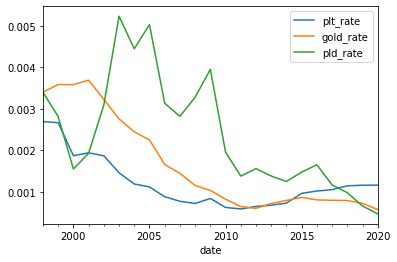

In [78]:
import seaborn as sns


result_df.plot()


In [79]:
#similarly we need to analysis on top 3 currency also
#take input from dict of Seborgan Luigino of date and rate and feed into dataframe
col1=pd.Series(top1_curr.keys())
col2=pd.Series(top1_curr.values())
spl_df=pd.concat([col1, col2], axis=1)
spl_df=spl_df.rename(columns={0:'date',1:'rate'})
spl_df1=spl_df
spl_df1




,date,rate
0,2001-11-16,0.166667
1,2001-11-17,0.166667
2,2001-11-18,0.166667
3,2001-11-19,0.166667
4,2001-11-20,0.166667
...,...,...
6588,2020-11-18,0.166667
6589,2020-11-19,0.166667
6590,2020-11-20,0.166667
6591,2020-11-21,0.166667


In [80]:
#take input from dict of kuwaitian dinar of date and rate and feed into dataframe
col1=pd.Series(top2_curr.keys())
col2=pd.Series(top2_curr.values())
kwd_df=pd.concat([col1, col2], axis=1)
kwd_df=kwd_df.rename(columns={0:'date',1:'rate'})
kwd_df1=kwd_df
kwd_df1


,date,rate
0,1998-11-30,0.303000
1,1998-12-01,0.303150
2,1998-12-02,0.302700
3,1998-12-03,0.302200
4,1998-12-04,0.302400
...,...,...
7602,2020-11-18,0.305794
7603,2020-11-19,0.306238
7604,2020-11-20,0.306053
7605,2020-11-21,0.306502


In [81]:

#take input from dict of Bahraini Dinar of date and rate and feed into dataframe
col1=pd.Series(top3_curr.keys())
col2=pd.Series(top3_curr.values())
bhd_df=pd.concat([col1, col2], axis=1)
bhd_df=bhd_df.rename(columns={0:'date',1:'rate'})
bhd_df1=bhd_df
bhd_df1

,date,rate
0,1998-11-30,0.3769
1,1998-12-01,0.3770
2,1998-12-02,0.3769
3,1998-12-03,0.3769
4,1998-12-04,0.3769
...,...,...
7602,2020-11-18,0.3760
7603,2020-11-19,0.3760
7604,2020-11-20,0.3760
7605,2020-11-21,0.3760


In [82]:
#resampling for the data to yearly data
#we used resampling technique for smoothing 
#yearly platanium currency value
yearly_spl=spl_df.resample('A', on='date').mean()
#change the column rate with platinum_rate
yearly_spl.rename(columns={'rate':'spl_rate'},inplace=True)

#yearly gold value
yearly_kwd=kwd_df.resample('A', on='date').mean()
#change the column rate with gold_rate
yearly_kwd.rename(columns={'rate':'kwd_rate'},inplace=True)

#yearly  value paladium
yearly_bhd=bhd_df.resample('A', on='date').mean()
#change the column rate with pld_rate
yearly_bhd.rename(columns={'rate':'bhd_rate'},inplace=True)


#we need to merge that all dataframe into one dataframe
final_top3_curr=pd.concat([yearly_spl,yearly_kwd,yearly_bhd], axis=1, join="inner")

final_top3_curr






,spl_rate,kwd_rate,bhd_rate
date,,,
2001-12-31,0.166667,0.306158,0.373070
2002-12-31,0.166667,0.303683,0.376390
2003-12-31,0.166667,0.297948,0.376850
2004-12-31,0.166667,0.294793,0.376930
2005-12-31,0.166667,0.292060,0.376992
2006-12-31,0.166667,0.290198,0.376910
2007-12-31,0.166667,0.284316,0.376676
2008-12-31,0.166667,0.268999,0.376781
2009-12-31,0.166667,0.288133,0.376939


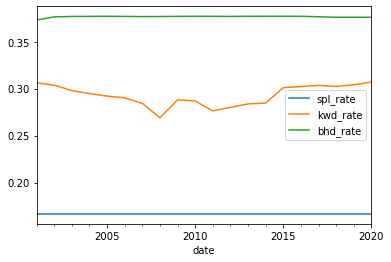

In [83]:
#plot the line graph for top 3 currency

final_top3_curr.plot()


# Euro currency analysis

In [84]:
#analysis on EURO CURRENCY
#create a data frame for euro currency which contain the date and the rate columns
#change the column rate with euro_rate

col1=pd.Series(euro_dict.keys())
col2=pd.Series(euro_dict.values())
euro_df=pd.concat([col1, col2], axis=1)
euro_df.rename(columns={'rate':'euro_rate'},inplace=True)
euro_df=euro_df.rename(columns={0:'date',1:'rate'})
euro_df1=euro_df.copy()
euro_df1

,date,rate
0,1995-11-16,0.767450
1,1995-11-17,0.767880
2,1995-11-20,0.769708
3,1995-11-21,0.769235
4,1995-11-22,0.768388
...,...,...
8516,2020-11-18,0.843744
8517,2020-11-19,0.842382
8518,2020-11-20,0.843367
8519,2020-11-21,0.843269


In [85]:
#start explore data with feature engineering

#by using rolling windowing feature we find the highest and lowest currency with respect to the last 7 days

euro_df1['week_avg']=euro_df1['rate'].rolling(window=7).mean()
euro_df1['Week_high']=euro_df1['rate'].rolling(window=7).max()
euro_df1['week_low']=euro_df1['rate'].rolling(window=7).min()

euro_df1


,date,rate,week_avg,Week_high,week_low
0,1995-11-16,0.767450,NaN,NaN,NaN
1,1995-11-17,0.767880,NaN,NaN,NaN
2,1995-11-20,0.769708,NaN,NaN,NaN
3,1995-11-21,0.769235,NaN,NaN,NaN
4,1995-11-22,0.768388,NaN,NaN,NaN
...,...,...,...,...,...
8516,2020-11-18,0.843744,0.845188,0.849046,0.842924
8517,2020-11-19,0.842382,0.844236,0.846935,0.842382
8518,2020-11-20,0.843367,0.843726,0.845223,0.842382
8519,2020-11-21,0.843269,0.843447,0.845001,0.842382


## candle stick for euro currency

In [1]:
%matplotlib inline

In [2]:
import pandas as pd


In [88]:


df_candle = pd.read_csv('/home/sunbeam/Desktop/Project_1/forex-analysis/EURUSD_D1.csv', sep='\t', parse_dates=[1]) 
print(df_candle)

                     Time     Open     High      Low    Close   Volume
0     2007-01-01 00:00:00  1.31908  1.32176  1.31650  1.32120  1995282
1     2007-01-02 00:00:00  1.32137  1.32951  1.32101  1.32724  2009661
2     2007-01-03 00:00:00  1.32702  1.32903  1.31461  1.31690  2016603
3     2007-01-04 00:00:00  1.31689  1.31783  1.30704  1.30860  2007990
4     2007-01-05 00:00:00  1.30866  1.31029  1.29804  1.29995  1916561
...                   ...      ...      ...      ...      ...      ...
4389  2021-01-11 00:00:00  1.21869  1.21998  1.21321  1.21605   185522
4390  2021-01-12 00:00:00  1.21605  1.22097  1.21371  1.22085   157612
4391  2021-01-13 00:00:00  1.22087  1.22227  1.21399  1.21619   172756
4392  2021-01-14 00:00:00  1.21618  1.21784  1.21110  1.21506   194304
4393  2021-01-15 00:00:00  1.21505  1.21624  1.20747  1.20748   164726

[4394 rows x 6 columns]


In [89]:
df_candle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4394 non-null   object 
 1   Open    4394 non-null   object 
 2   High    4394 non-null   float64
 3   Low     4394 non-null   float64
 4   Close   4394 non-null   float64
 5   Volume  4394 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 206.1+ KB


In [90]:
df_candle.Time=pd.to_datetime(df_candle.Time)
df_candle


,Time,Open,High,Low,Close,Volume
0,2007-01-01,1.31908,1.32176,1.31650,1.32120,1995282
1,2007-01-02,1.32137,1.32951,1.32101,1.32724,2009661
2,2007-01-03,1.32702,1.32903,1.31461,1.31690,2016603
3,2007-01-04,1.31689,1.31783,1.30704,1.30860,2007990
4,2007-01-05,1.30866,1.31029,1.29804,1.29995,1916561
...,...,...,...,...,...,...
4389,2021-01-11,1.21869,1.21998,1.21321,1.21605,185522
4390,2021-01-12,1.21605,1.22097,1.21371,1.22085,157612
4391,2021-01-13,1.22087,1.22227,1.21399,1.21619,172756
4392,2021-01-14,1.21618,1.21784,1.21110,1.21506,194304


In [91]:
df_candle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4394 entries, 0 to 4393
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    4394 non-null   datetime64[ns]
 1   Open    4394 non-null   object        
 2   High    4394 non-null   float64       
 3   Low     4394 non-null   float64       
 4   Close   4394 non-null   float64       
 5   Volume  4394 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 206.1+ KB


In [92]:
import plotly.graph_objects as go

In [93]:
figure = go.Figure(
data=[
    go.Candlestick(
    x = df_candle.Time,
    low= df_candle['Low'],
    high = df_candle['High'],
    close = df_candle['Close'],
    open = df_candle['Open'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red'),
])
#figure.update_layout(xaxis_rangeslider_visible = False)
figure.update_layout(
title = 'Dollar price with respect to EURO',
yaxis_title = 'Price($)',
xaxis_title = 'Time(Year)'
) 

figure.show()

- The line chart contain lots of noise in graph to view Seasonality effect we need to zoom in data with time frame of 3 year

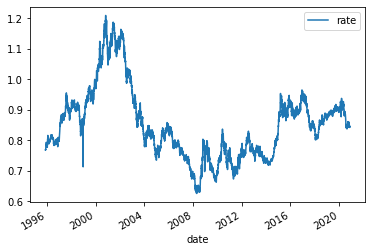

In [94]:
#they plot is only for comparision purpose
euro_df.plot(x='date',y="rate")

###  Zoom In 

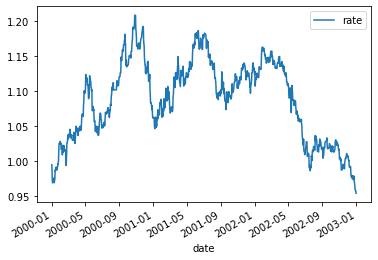

In [95]:
euro_df2 = euro_df[(euro_df['date'] > '2000-01-01') & (euro_df['date'] <= '2002-12-31')].copy()
euro_df2
euro_df2.plot(x='date',y="rate")

- we seen the rate of euro currency got hiked in between of month october and november month we want more detail graph so we zoom in month wise.and take data of october,november.

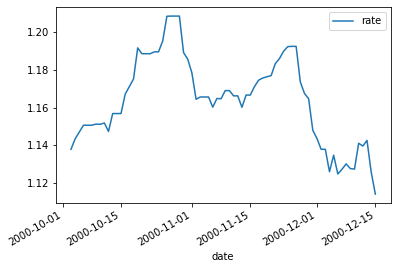

In [96]:
euro_df2 = euro_df[(euro_df['date'] > '2000-10-01') & (euro_df['date'] <= '2000-12-15')].copy()
euro_df2.plot(x='date',y="rate")


#we need to labeled max in the 

### Removing Seasionality

- seasonality removal cause the smoothing of curve and eliminate noise.

- is also called as zoom out version of graph which lost detailing of Sesonality effect.

In [97]:
#yearly euro currency avg
yearly_euro=euro_df.resample('A', on='date').mean()

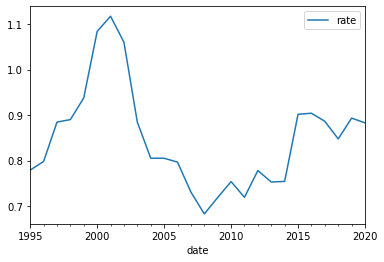

In [98]:
#take as side euro currency analysis
#trend of euro currency


yearly_euro.plot()

### Auto Correlation plot

##### step to find out auto correlation plot

- Add lag column in dataframe
- draw the correlation plot which imported from pandas library.
- autocorrelation descirbe the behavious of todays value with respect to the previous date value.

In [99]:
from pandas.plotting import lag_plot

In [100]:
euro_df3=euro_df.copy()
euro_df3['rate_lag'] = euro_df3['rate'].shift(1)
euro_df3

,date,rate,rate_lag
0,1995-11-16,0.767450,NaN
1,1995-11-17,0.767880,0.767450
2,1995-11-20,0.769708,0.767880
3,1995-11-21,0.769235,0.769708
4,1995-11-22,0.768388,0.769235
...,...,...,...
8516,2020-11-18,0.843744,0.842924
8517,2020-11-19,0.842382,0.843744
8518,2020-11-20,0.843367,0.842382
8519,2020-11-21,0.843269,0.843367


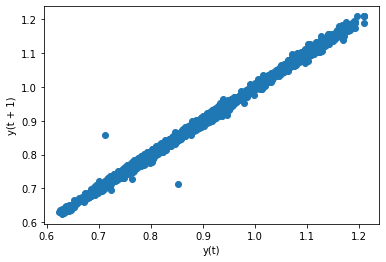

In [101]:
lag_plot(euro_df3['rate'])

# Prediction of euro currency


### Naive Persistence Model

In [102]:
nav_df=euro_df
#create 1 day lag series 
nav_df['lag_rate'] =euro_df['rate'].shift(1)
nav_df.head()

,date,rate,lag_rate
0,1995-11-16,0.767450,NaN
1,1995-11-17,0.767880,0.767450
2,1995-11-20,0.769708,0.767880
3,1995-11-21,0.769235,0.769708
4,1995-11-22,0.768388,0.769235


In [103]:
nav_df.shape

(8521, 3)

### split data into test and train it drop trent also with respect to lag1
### check the dimmension of the dataset

- We splited data into 80% data into training set and 20% for testing set

In [104]:
train_size = int(nav_df.shape[0]*0.80)
train_size


6816

In [105]:
train =  nav_df[1:train_size]
test =  nav_df[train_size:]
train.head()

,date,rate,lag_rate
1,1995-11-17,0.767880,0.767450
2,1995-11-20,0.769708,0.767880
3,1995-11-21,0.769235,0.769708
4,1995-11-22,0.768388,0.769235
5,1995-11-23,0.767939,0.768388


In [106]:
train_X, train_y = train['lag_rate'], train['rate']
test_X, test_y = test['lag_rate'], test['rate']
test_X

6816    0.922536
6817    0.919691
6818    0.910493
6819    0.913534
6820    0.909030
          ...   
8516    0.842924
8517    0.843744
8518    0.842382
8519    0.843367
8520    0.843269
Name: lag_rate, Length: 1705, dtype: float64

### walk forward validation

In [107]:
predictions = test_X.copy()
print(predictions)
print(test_y)

6816    0.922536
6817    0.919691
6818    0.910493
6819    0.913534
6820    0.909030
          ...   
8516    0.842924
8517    0.843744
8518    0.842382
8519    0.843367
8520    0.843269
Name: lag_rate, Length: 1705, dtype: float64
6816    0.919691
6817    0.910493
6818    0.913534
6819    0.909030
6820    0.909565
          ...   
8516    0.843744
8517    0.842382
8518    0.843367
8519    0.843269
8520    0.843322
Name: rate, Length: 1705, dtype: float64


- The MSE is a measure of the quality of an estimator—it is always non-negative, and values closer to zero are better.


In [108]:
#model accuracy with 80-20% split ratio
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
mse = mean_squared_error(test_y, predictions)
mse


1.2431055098117356e-05

In [109]:
nav_accuracy_measure=forecast_accuracy(test_y,predictions)


#### due to continuous value we cant find acuracy score

 - Prediction of last 2 months

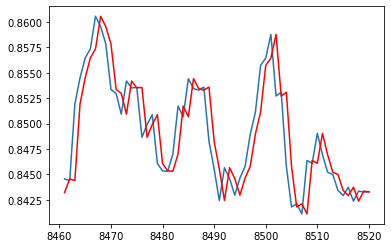

In [110]:
#we need to add label with testing data of 0.50% splited data they show clear vizualization toward actual and predicted value

#labeling needed

from matplotlib import pyplot
pyplot.plot(test_y.tail(60))
pyplot.plot(predictions.tail(60), color='red')

# Autoregression Model

In [111]:
from statsmodels.tsa.ar_model import AR
model = AR(train['rate'])
model_fit = model.fit()
model


In [112]:
model_fit.k_ar

34

In [113]:
model_fit.params

const       0.000684
L1.rate     0.869426
L2.rate     0.125080
L3.rate    -0.007495
L4.rate     0.003027
L5.rate     0.005923
L6.rate     0.013001
L7.rate    -0.000525
L8.rate     0.002477
L9.rate    -0.013899
L10.rate   -0.002566
L11.rate    0.009422
L12.rate    0.013740
L13.rate   -0.003846
L14.rate   -0.013472
L15.rate    0.003685
L16.rate   -0.020378
L17.rate    0.029395
L18.rate   -0.023407
L19.rate   -0.005224
L20.rate    0.024314
L21.rate   -0.003926
L22.rate   -0.006051
L23.rate    0.009552
L24.rate   -0.012415
L25.rate   -0.002094
L26.rate    0.011697
L27.rate    0.022129
L28.rate   -0.014443
L29.rate   -0.014472
L30.rate    0.023017
L31.rate   -0.024331
L32.rate    0.005046
L33.rate    0.005801
L34.rate   -0.008977
dtype: float64

In [114]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)


In [115]:
predictions.iloc[0]

0.9222263975077265

In [116]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

0.0012647818097953952

In [117]:
ar_accuracy_measure=forecast_accuracy(test_y,predictions)

- tested with autoregression model but mse of autoregression model is more than naive model so they follow random walk pattern into the data. 

* - Prediction of start 2 months

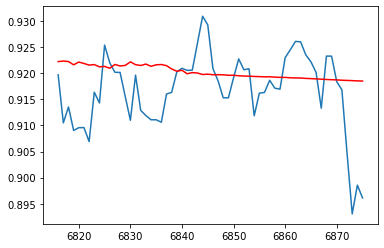

In [118]:
pyplot.plot(test_y.head(60))
pyplot.plot(predictions.head(60), color='red')

### moving average model

In [119]:
mavg_df=euro_df
#create 1 day lag series 
mavg_df['lag_rate'] =euro_df['rate'].shift(1)

In [120]:
mavg_df['Resid'] = mavg_df['rate'] - mavg_df['lag_rate']

In [121]:
mavg_df

,date,rate,lag_rate,Resid
0,1995-11-16,0.767450,NaN,NaN
1,1995-11-17,0.767880,0.767450,0.000431
2,1995-11-20,0.769708,0.767880,0.001828
3,1995-11-21,0.769235,0.769708,-0.000473
4,1995-11-22,0.768388,0.769235,-0.000848
...,...,...,...,...
8516,2020-11-18,0.843744,0.842924,0.000820
8517,2020-11-19,0.842382,0.843744,-0.001362
8518,2020-11-20,0.843367,0.842382,0.000984
8519,2020-11-21,0.843269,0.843367,-0.000098


In [122]:
train, test = mavg_df.Resid[1:mavg_df.shape[0]-7], mavg_df.Resid[mavg_df.shape[0]-7:]

In [123]:
test.head()

8514   -0.001561
8515   -0.000516
8516    0.000820
8517   -0.001362
8518    0.000984
Name: Resid, dtype: float64

In [124]:
from statsmodels.tsa.ar_model import AR


In [125]:
model = AR(train)
model_fit = model.fit()

In [126]:
model_fit.k_ar

36

In [127]:
model_fit.params

const        0.000008
L1.Resid    -0.116770
L2.Resid    -0.001101
L3.Resid    -0.011878
L4.Resid    -0.011162
L5.Resid    -0.004098
L6.Resid     0.006978
L7.Resid     0.004470
L8.Resid     0.007634
L9.Resid    -0.009833
L10.Resid   -0.007976
L11.Resid    0.001984
L12.Resid    0.016002
L13.Resid    0.009984
L14.Resid   -0.003023
L15.Resid    0.000181
L16.Resid   -0.022156
L17.Resid    0.011265
L18.Resid   -0.003187
L19.Resid   -0.008257
L20.Resid    0.004315
L21.Resid    0.004423
L22.Resid   -0.004363
L23.Resid    0.007220
L24.Resid   -0.005523
L25.Resid   -0.003715
L26.Resid    0.014540
L27.Resid    0.027735
L28.Resid    0.018718
L29.Resid    0.000241
L30.Resid    0.019874
L31.Resid   -0.000195
L32.Resid    0.001081
L33.Resid    0.010545
L34.Resid    0.003910
L35.Resid   -0.009418
L36.Resid    0.002522
dtype: float64

In [128]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [129]:
pred_resid

8514    0.000051
8515   -0.000021
8516   -0.000135
8517   -0.000462
8518    0.000082
8519   -0.000178
8520    0.000192
dtype: float64

In [130]:
mavg_df.lag_rate[mavg_df.shape[0]-7:]

8514    0.845001
8515    0.843440
8516    0.842924
8517    0.843744
8518    0.842382
8519    0.843367
8520    0.843269
Name: lag_rate, dtype: float64

In [131]:
predictions =  mavg_df.lag_rate[mavg_df.shape[0]-7:]+ pred_resid

In [132]:
predictions

8514    0.845052
8515    0.843419
8516    0.842789
8517    0.843282
8518    0.842465
8519    0.843189
8520    0.843461
dtype: float64

In [133]:
test

8514   -0.001561
8515   -0.000516
8516    0.000820
8517   -0.001362
8518    0.000984
8519   -0.000098
8520    0.000053
Name: Resid, dtype: float64

In [134]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
mse

0.7116961608961077

In [135]:
mov_accuracy_measure=forecast_accuracy(test,predictions)

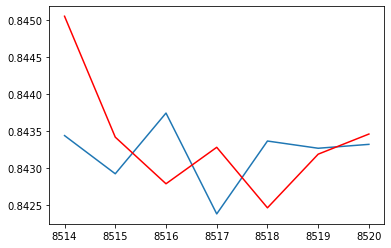

In [136]:
pyplot.plot(test_y.tail(7))
pyplot.plot(predictions,color='red')

### ARIMA model

In [137]:
arima_df=euro_df

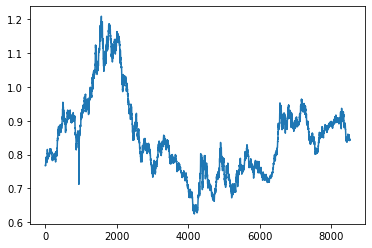

In [138]:
arima_df['rate'].plot()

>Trend is Polynomial.  
D =2

## Autocorrelation plot

- the autocorrelation plot provide the value of Q

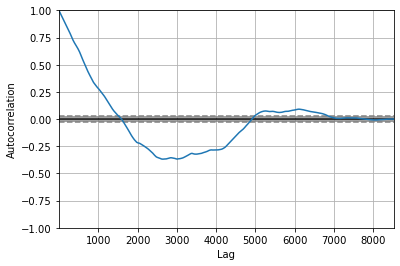

In [139]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(arima_df['rate'])

> the value of around 1500 goes into critical region
- Q=1500

### Partial Autocorrelation Graph

In [140]:
from statsmodels.graphics.tsaplots import plot_pacf

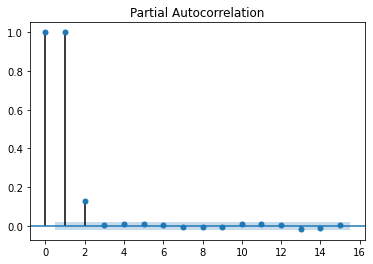

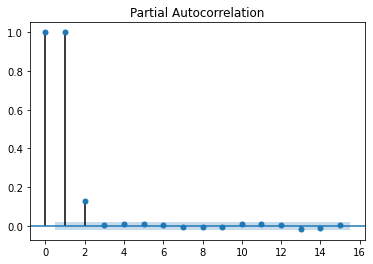

In [141]:
plot_pacf(arima_df['rate'], lags=15)

> After value 2 they partial autocorrelation plot goes into 95% confidance interval that point decide value of p
- P=2

In [142]:
from statsmodels.tsa.arima_model import ARIMA

In [143]:
model = ARIMA(arima_df['rate'], order=(15,2,2))
print("done")

done


In [144]:
model_fit = model.fit()
print("done")

done


In [145]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.rate   No. Observations:                 8519
Model:                ARIMA(15, 2, 2)   Log Likelihood               33094.296
Method:                       css-mle   S.D. of innovations              0.005
Date:                Tue, 19 Jan 2021   AIC                         -66150.592
Time:                        10:03:22   BIC                         -66016.641
Sample:                             2   HQIC                        -66104.886
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.266e-08   1.49e-06     -0.055      0.956   -3.01e-06    2.84e-06
ar.L1.D2.rate     -0.6112      0.133     -4.593      0.000      -0.872      -0.350
ar.L2.D2.rate     -0.0690      0.014     -5.044      0.000      -0.096      -0.042
ar.L3.D2.rate     -0.0209      0.013     -1.551      0.121      -0.047       0.006
ar.L4.D2.rate     -0.0231      0.013     -1.779      0.075      -0.049       0.002
ar.L5.D2.rate     -0.0135      0.013     -1.027      0.304      -0.039       0.012
ar.L6.D2.rate      0.0041      0.014      0.293      0.769      -0.023       0.031
ar.L7.D2.rate      0.0093      0.015      0.617      0.537      -0.020       0.039
ar.L8.D2.rate      0.0132      0.015      0.881      0.379      -0.016       0.042
ar.L9.D2.rate      0.0002      0.015      0.011      0.991      -0.030       0.030
ar.L10.D2.rate    -0.0033      0.014     -0.237      0.813      -0.031       0.024
ar.L11.D2.rate     0.0095      0.014      0.655      0.513      -0.019       0.038
ar.L12.D2.rate     0.0303      0.015      1.984      0.047       0.000       0.060
ar.L13.D2.rate     0.0345      0.017      2.063      0.039       0.002       0.067
ar.L14.D2.rate     0.0209      0.016      1.316      0.188      -0.010       0.052
ar.L15.D2.rate     0.0209      0.012      1.765      0.077      -0.002       0.044
ma.L1.D2.rate     -0.4829      0.130     -3.715      0.000      -0.738      -0.228
ma.L2.D2.rate     -0.4730      0.138     -3.423      0.001      -0.744      -0.202
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.2340           -0.0000j            1.2340           -0.0000
AR.2             1.1037           -0.5898j            1.2515           -0.0781
AR.3             1.1037           +0.5898j            1.2515            0.0781
AR.4             0.7308           -1.0431j            1.2736           -0.1527
AR.5             0.7308           +1.0431j            1.2736            0.1527
AR.6            -1.2155           -0.2227j            1.2358           -0.4712
AR.7            -1.2155           +0.2227j            1.2358            0.4712
AR.8            -1.0546           -0.6948j            1.2629           -0.4073
AR.9            -1.0546           +0.6948j            1.2629            0.4073
AR.10           -0.7178           -1.0882j            1.3036           -0.3428
AR.11           -0.7178           +1.0882j            1.3036            0.3428
AR.12            0.2540           -1.3788j            1.4020           -0.2210
AR.13            0.2540           +1.3788j            1.4020            0.2210
AR.14           -0.2167           -1.3507j            1.3680           -0.2753
AR.15           -0.2167           +1.3507j            1.3680            0.27

In [146]:
residuals = model_fit.resid


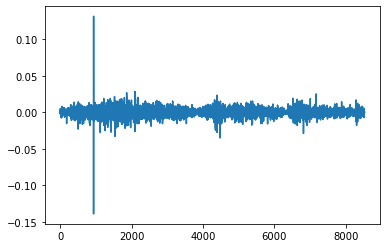

In [147]:
residuals.plot()

In [148]:
residuals.describe()

count    8.519000e+03
mean    -6.088015e-07
std      4.972702e-03
min     -1.393369e-01
25%     -1.848549e-03
50%      2.807277e-06
75%      1.865600e-03
max      1.317410e-01
dtype: float64

#### variation

In [149]:
output = model_fit.forecast()

In [150]:
output

(array([0.84326622]), array([0.00497226]), array([[0.83352077, 0.85301167]]))

In [151]:
model_fit.forecast(5)[0]

array([0.84326622, 0.843169  , 0.84308388, 0.8428225 , 0.84266244])

### walk forward arima

In [152]:
train_size = int(arima_df.shape[0]*0.80)


In [153]:
train, test = arima_df.rate[1:train_size], arima_df.rate[train_size:]

In [154]:
test.shape

(1705,)

In [155]:
import numpy as np
data = train
predict =[]
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, t)
    data = pd.Series(data)
    
print("loop has been ended")

0.9222499446706732
0.9200594254930818
0.9116868833259333
0.9132149832583737
0.9097466724867184
0.909609595472635
0.9096648974961065
0.907298130980057
0.915185148066035
0.9145779665626942
0.9238961450021662
0.922351362692951
0.9203075632675924
0.9201246208526259
0.9161789338697921
0.9116576508552935
0.9186183768731311
0.9138526396607352
0.9120477790498618
0.9112251574365947
0.9111513174437995
0.9107379137935961
0.9153460179280234
0.9163011043854856
0.9197109261232247
0.9208050223877478
0.9205495919040091
0.9205634288807276
0.9250932199015341
0.9302525469371484
0.9294280087659801
0.9219038859367609
0.9188520908913549
0.9158425557124682
0.9154542583567304
0.9187705630003569
0.9223234057609373
0.9209173969802736
0.9207821060607492
0.9130140016325571
0.915687373927753
0.9164285393508093
0.9184168246313548
0.9173437569947475
0.9169533480114298
0.9222092027649613
0.9243091867510844
0.925845685138701
0.9259594768864514
0.9238106498543865
0.922374633143908
0.9204658786617141
0.9142659649610739


0.9370251480952062
0.9370451667977088
0.9373154565324383
0.9391499903717013
0.9322053286755231
0.9303729487477326
0.9306475739392503
0.9299925183327745
0.9258121171578831
0.9257387011985847
0.926034309295833
0.9257501570507646
0.9197992177170653
0.9213373182335166
0.9289529826210094
0.9321055791848247
0.9343746984148155
0.938006876380633
0.9385220497221688
0.9380208969582798
0.9386830771486222
0.9416459353677196
0.943956640408881
0.9442061372233879
0.9430536256206875
0.9422064936016684
0.9423580240308583
0.9410610371142705
0.9413498286249485
0.9421940195348095
0.942327218375706
0.9386468556037745
0.9346654280952885
0.9341077006600554
0.9302934457118165
0.9343930926556959
0.9327351681573876
0.9323023761389903
0.9228445484215201
0.9152611923453602
0.9194788370815871
0.9205235697258509
0.9181988117113767
0.9178227463869387
0.9178043015687428
0.9166711153817414
0.9164133960343086
0.9159386118492211
0.9122690132981778
0.9098654365810872
0.9092521361217998
0.9092056925942866
0.91450560905401

0.8581363310454609
0.8605988663179307
0.8613657380762576
0.8617755581637284
0.8615109440517775
0.8635460224317986
0.8629365605775916
0.8621797696024239
0.8601060803376209
0.8582417929494204
0.8580172012578688
0.8555786159037637
0.8565004534192613
0.8623766626707947
0.8635701504490471
0.8572658872787187
0.8554901382620713
0.8554638599241814
0.8610462421158165
0.8585892207175055
0.8588255055011076
0.8555627333656984
0.8522504005269121
0.850965714083373
0.851595618403819
0.8523453488582434
0.8530411189194507
0.8549780917695845
0.8566710969382396
0.8557723766976914
0.854167338642479
0.8560393868973323
0.858603074476541
0.8617284472758775
0.8549058447363358
0.8526906717123093
0.8528450064277481
0.8544965588961974
0.8555304769106361
0.8562235242688382
0.8576974226985052
0.8576331842330898
0.8579157231333322
0.8578577014328959
0.8539811192910693
0.8542461014730467
0.8567787885499868
0.8605669403990164
0.861997841811722
0.8640291686488346
0.864202421517225
0.8647436132391916
0.8625364210730001

0.9071110653085468
0.9044162523521736
0.9039742764705745
0.9049893165623452
0.9070941933815716
0.9074508554790244
0.9094834971722993
0.9091751661578551
0.9135712836414122
0.9137033667029508
0.913993094600598
0.9140255883885202
0.916513754730073
0.9149099322748735
0.9132585091333404
0.9101754657084564
0.9111149087687265
0.9108799888899087
0.9108098698017233
0.913009905679151
0.9111277835221087
0.9082700757464203
0.9062397127802286
0.9057677555045273
0.9068536834402925
0.9061375262999937
0.9033533044081842
0.899216789665168
0.8966921651080481
0.8952100270813641
0.8952511093067271
0.8970936455439211
0.8976788743686435
0.8990992626993712
0.900972066657881
0.9021760803999991
0.9024792681643591
0.9024786126260609
0.9016578431261688
0.9001546000132583
0.8993280698543065
0.8966802782270104
0.8955055871948044
0.8952940936803888
0.8956808528645553
0.897120435527812
0.902559527739431
0.9027478001800627
0.9069106319790593
0.9073368298858433
0.907438423761752
0.9061444036236385
0.9084683468596106
0

In [156]:
predict

[0.9222499446706732,
 0.9200594254930818,
 0.9116868833259333,
 0.9132149832583737,
 0.9097466724867184,
 0.909609595472635,
 0.9096648974961065,
 0.907298130980057,
 0.915185148066035,
 0.9145779665626942,
 0.9238961450021662,
 0.922351362692951,
 0.9203075632675924,
 0.9201246208526259,
 0.9161789338697921,
 0.9116576508552935,
 0.9186183768731311,
 0.9138526396607352,
 0.9120477790498618,
 0.9112251574365947,
 0.9111513174437995,
 0.9107379137935961,
 0.9153460179280234,
 0.9163011043854856,
 0.9197109261232247,
 0.9208050223877478,
 0.9205495919040091,
 0.9205634288807276,
 0.9250932199015341,
 0.9302525469371484,
 0.9294280087659801,
 0.9219038859367609,
 0.9188520908913549,
 0.9158425557124682,
 0.9154542583567304,
 0.9187705630003569,
 0.9223234057609373,
 0.9209173969802736,
 0.9207821060607492,
 0.9130140016325571,
 0.915687373927753,
 0.9164285393508093,
 0.9184168246313548,
 0.9173437569947475,
 0.9169533480114298,
 0.9222092027649613,
 0.9243091867510844,
 0.925845685138701

In [157]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.2624510157115225e-05

In [164]:
arima_accuracy_measure=forecast_accuracy(test.values,predict)

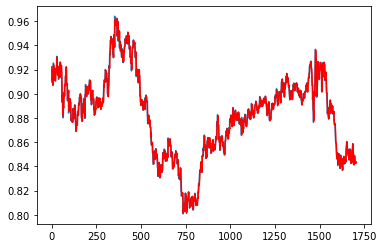

In [165]:
pyplot.plot(test.values)
pyplot.plot(predict,color='red')

## SARIMA Model

In [166]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [167]:
sarima_df=euro_df

In [168]:
sarima_df.index = sarima_df['date'] 

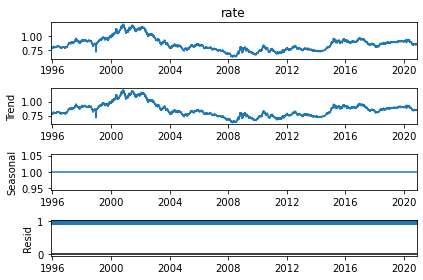

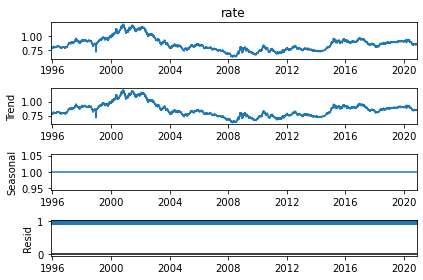

In [169]:
result_a = seasonal_decompose(sarima_df['rate'], model='multiplicative',period = 1)
result_a.plot()

In [171]:
#same value for pq from arima model as same
model = SARIMAX(sarima_df['rate'], order=(6,2,2), seasonal_order=(1,1,1,7))

In [172]:
model_fit = model.fit()

In [173]:
residuals = model_fit.resid

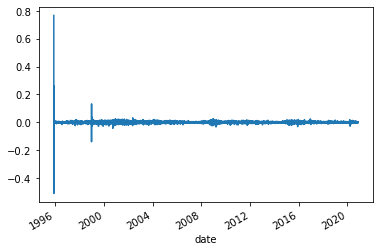

In [174]:
residuals.plot()

In [175]:
output = model_fit.forecast()

In [176]:
output

8521    0.841878
dtype: float64

In [177]:
model_fit.forecast(60)

8521    0.841878
8522    0.842873
8523    0.841743
8524    0.841875
8525    0.840482
8526    0.839367
8527    0.840567
8528    0.839359
8529    0.840144
8530    0.839406
8531    0.839138
8532    0.837948
8533    0.836867
8534    0.837781
8535    0.836512
8536    0.837409
8537    0.836563
8538    0.836411
8539    0.835047
8540    0.833856
8541    0.834775
8542    0.833463
8543    0.834291
8544    0.833443
8545    0.833230
8546    0.831862
8547    0.830645
8548    0.831503
8549    0.830144
8550    0.830938
8551    0.830042
8552    0.829800
8553    0.828384
8554    0.827125
8555    0.827947
8556    0.826549
8557    0.827300
8558    0.826365
8559    0.826081
8560    0.824628
8561    0.823330
8562    0.824112
8563    0.822673
8564    0.823384
8565    0.822409
8566    0.822085
8567    0.820592
8568    0.819254
8569    0.819995
8570    0.818517
8571    0.819188
8572    0.818173
8573    0.817809
8574    0.816276
8575    0.814898
8576    0.815600
8577    0.814081
8578    0.814712
8579    0.8136

In [178]:
yhat = model_fit.predict()

In [179]:
y_hat_last_50=yhat.tail(50)
y_actual_last_50=sarima_df['rate'].tail(50)


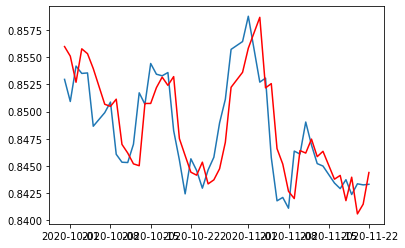

In [180]:
from matplotlib import pyplot
pyplot.plot(y_actual_last_50)
pyplot.plot(y_hat_last_50, color='red')

### walk forward sarima 

In [181]:
train_size = int(sarima_df.shape[0]*0.995)


In [182]:
train, test = sarima_df.rate[1:train_size], sarima_df.rate[train_size:]

In [183]:
test.shape

(43,)

In [184]:
import numpy as np
import warnings
#used to supress warning of deprication
warnings.filterwarnings("ignore")
data = train
predict =[]
for t in test:
    model =SARIMAX(sarima_df['rate'], order=(6,2,2), seasonal_order=(1,1,1,7))
    model_fit = model.fit()
    y = model_fit.forecast(1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    
print("loop has been ended")

0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
0.8418776245594033
loop has been ended


In [185]:
predict

[0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033,
 0.8418776245594033]

In [186]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

5.15581409967813e-05

In [188]:
sarima_accuracy_measure=forecast_accuracy(test.values,predict)

## final model evaluation


In [189]:
print('==' * 60)
print("naive persistance model accuracy measure")
print('--' * 60)
for i,j in nav_accuracy_measure.items():
    print(f"{i}={j}" )
print('==' * 60)


print('==' * 60)
print("auto regression model accuracy measure")
print('--' * 60)
for i,j in ar_accuracy_measure.items():
    print(f"{i}={j}" )
print('==' * 60)

print('==' * 60)
print("moving avg model accuracy measure")
print('--' * 60)
for i,j in mov_accuracy_measure.items():
    print(f"{i}={j}" )
print('==' * 60)


print('==' * 60)
print("ARIMA model accuracy measure")
print('--' * 60)
for i,j in arima_accuracy_measure.items():
    print(f"{i}={j}" )
print('==' * 60)


print('==' * 60)
print("SARIMA persistance model accuracy measure")
print('--' * 60)
for i,j in sarima_accuracy_measure.items():
    print(f"{i}={j}" )
print('==' * 60)




naive persistance model accuracy measure
------------------------------------------------------------------------------------------------------------------------
mape=0.0026621473925587833
me=-4.645982991202343e-05
mae=0.0023555776246334294
mpe=-4.481072177094618e-05
rmse=0.0035257701425528798
corr=0.9944933594400922
minmax=0.002654332235502266
auto regression model accuracy measure
------------------------------------------------------------------------------------------------------------------------
mape=0.031509124639991275
me=-0.014031172711939228
mae=0.02827369007578921
mpe=-0.015599619381225695
rmse=0.035563771028891134
corr=0.2467351064886135
minmax=0.031259062039052155
moving avg model accuracy measure
------------------------------------------------------------------------------------------------------------------------
mape=1.0002836865547002
me=-0.8436193759874283
mae=0.8436193759874283
mpe=-1.0002836865547002
rmse=0.8436208632413661
corr=-0.7970966476661303
minmax=1.0002836